<div style="text-align: center; font-size: 24px; margin-bottom: 50px;">  
    <strong>4G ML Network Analysis Notebook </strong> 
</div>



<div style="text-align: center; font-size: 18px; margin-bottom: 50px;">
    Prepared by:  Onur Tuncay   
</div>


<a id="contents_table"></a>
<h1 style="page-break-before: always;"></h1>
<h3 align="left"><font color="#000000">Table of Contents:</font></h3>

1. <a href='#1-introduction'>Dataset Selection</a>
2. <a href='#2-dataset-overview'>Selected Dataset Overview</a>

3. <a href='#3-data-preprocessing--exploration'>Data Preprocessing & Exploration (Task 1)</a>
   - 3.1 <a href='#31-handling-categorical-date-columns'> Basic Dataset Summary & Handling Non-numeric Columns</a>
   - 3.2 <a href='#32-missing-values'>Missing Values</a>
   - 3.3 <a href='#33-outlier-detection'>Outlier Detection</a>
   - 3.4 <a href='#34-encoding--normalization'>Encoding & Normalization</a>
   - 3.5 <a href='#35-data-visualizations'>Data Visualizations</a>

4. <a href='#4-clustering-analysis-task-2'>Clustering Analysis (Task 2)</a>
   - 4.1 <a href='#41-k-means-clustering'>K-Means Clustering</a>
   - 4.2 <a href='#42-agglomerative-clustering'>Agglomerative Clustering</a>
   - 4.3 <a href='#43-clustering-comparison'>Clustering Models' Comparison</a>

5. <a href='#5-classification-task-3'>Classification (Task 3)</a>
   - 5.1 <a href='#51-binary-classification'>Binary Classification</a>
   - 5.2 <a href='#52-multi-class-classification'>Multi-Class Classification</a>
   
6. <a href='#6-optimization-using-genetic-algorithms-task-4'>Optimization using Genetic Algorithms (Task 4)</a>

7. <a href='#7-references'>References</a>



### Nobebook Structure
This notebook is organized to provide a step-by-step exploration of a 4G mobile network dataset, applying data science and machine learning methodologies across multiple tasks. The structure is aligned with the designated tasks and aims to ensure clarity and coherence throughout the analysis:

- Section 1 introduces the motivation and rationale for selecting the dataset, with a focus on its relevance and suitability for real-world network analysis.

- Section 2 offers an overview of the selected dataset, highlighting its features, structure, and variables that will be used throughout the analysis.

- Section 3 covers data preprocessing and exploration, including initial data summaries, handling of categorical and temporal columns, treatment of missing values, outlier detection, and data normalization. This section also presents various visualizations to uncover patterns within the dataset.

 - Section 4 is dedicated to clustering analysis, where both K-Means and Agglomerative clustering techniques are applied. The performance of clustering algorithms is compared, and clusters are interpreted using domain-relevant variables.

 - Section 5  addresses classification tasks, involving both binary and multi-class classification. Several models are trained and evaluated using metrics such as accuracy and F1-score, supported by feature importance and SHAP analysis for interpretability.

 - Section 6  demonstrates the use of Genetic Algorithms for hyperparameter optimization, focusing on improving the performance of a Random Forest classifier through evolutionary computation principles.

 - Section 7 provides references for this notebook.

This structure ensures a comprehensive analysis framework that integrates exploratory data analysis, unsupervised learning, supervised classification, and model optimization. It provides a data-driven perspective on mobile network behavior and supports data-informed decision-making for performance enhancement.


<a id="1-introduction"></a> 
# 1. Dataset Selection

In [5]:
# Import essential libraries
import pandas as pd  # Data manipulation and analysis using DataFrames
import glob  # File handling and retrieval using patterns
import numpy as np  # Numerical computing, including arrays and mathematical operations
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Fundamental plotting library

# Import preprocessing utilities
from sklearn.preprocessing import StandardScaler  # Standardizing features (zero mean, unit variance)
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables into numerical format

# Import statistical functions
from scipy.stats import zscore  # Compute Z-score for outlier detection
from scipy.stats import chi2_contingency  # Perform Chi-square test for categorical independence

# 3D visualization tools
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Clustering algorithms
from sklearn.cluster import KMeans  # K-Means clustering for unsupervised learning
from sklearn.metrics import silhouette_score  # Evaluate clustering quality with silhouette score
from sklearn.decomposition import PCA  # Dimensionality reduction via Principal Component Analysis
from sklearn.cluster import AgglomerativeClustering  # Hierarchical clustering

# Hierarchical clustering visualization
from scipy.cluster.hierarchy import dendrogram, linkage  # Create dendrograms for hierarchical clustering

# Explainability tools
import shap  # SHAP values for feature importance explanation in machine learning models

# Train-test split utility
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.model_selection import cross_val_score  # Cross-validation 

# Classification models
from sklearn.ensemble import RandomForestClassifier  # Ensemble tree-based classifier
from sklearn.linear_model import LogisticRegression  # Logistic regression for binary classification

# Evaluation metrics
from sklearn.metrics import accuracy_score  # Compute classification accuracy
from sklearn.metrics import confusion_matrix  # Generate confusion matrix for model evaluation
from sklearn.metrics import classification_report  # Summarize precision, recall, F1-score
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer  # Individual classification metrics

import random  # Random number generation for parameter selection
import scipy.stats as stats  # Statistical functions like z-score


# Suppress warnings for readability
import warnings
warnings.filterwarnings("ignore")  # Ignore unnecessary warnings

# Configure Pandas display settings
pd.set_option('display.max_rows', 2000)  # Show up to 2000 rows in DataFrame outputs
pd.set_option('display.max_columns', 500)  # Show up to 500 columns in DataFrame outputs

In [7]:
pwd  #Check current directory

'C:\\Users\\onurt\\OneDrive\\Desktop\\UoG Msc Data Science\\CT7205 - Machine Learning and Optimisation\\Assessment\\Final'

In [8]:
# File path of the datasets
file_path = "C:\\Users\\onurt\\OneDrive\\Desktop\\UoG Msc Data Science\\CT7205 - Machine Learning and Optimisation\\Assessment\\dataset/*.csv"

# An empty dictionary to store DataFrames
dataframes = {}

# Loop through all CSV files
for file in glob.glob(file_path):
    # Extract the file name and use it as a key
    file_name = file.split("\\")[-1].split(".")[0]
    # Read the CSV file into a DataFrame and replace "?" values with NaN
    df = pd.read_csv(file, index_col=0, na_values="?")
    # Save the DataFrame in the dictionary
    dataframes[file_name] = df
    
    # File name
    print(f"File: {file_name}")
    # Shape and missing value analysis
    print(f"Shape: {df.shape}")
    print("Missing Values:\n", df.isnull().sum())
    print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df) * 100).round(2))
    
    # General information about the DataFrame
    print("\n--- DataFrame Info ---")
    df.info()
    
    # Summary statistics of the DataFrame
    print("\n--- Summary Statistics ---")
    print(df.describe())
    
    print("\n" + "-" * 40 + "\n")


File: 4G - Passive measurements
Shape: (527540, 26)
Missing Values:
 Date                       0
Time                       0
UTC                    70339
Latitude                   0
Longitude                  0
Altitude               70339
Speed                  70339
EARFCN                     0
Frequency                  0
PCI                        0
MNC                        0
CellIdentity               0
eNodeB.ID                  0
Power                  21714
SINR                   21714
RSRP                       0
RSRQ                       0
scenario                   0
cellLongitude              0
cellLatitude               0
cellPosErrorLambda1     7908
cellPosErrorLambda2        0
n_CellIdentities           0
distance                   0
Band                       0
campaign                   0
dtype: int64

Percentage of Missing Values:
 Date                    0.00
Time                    0.00
UTC                    13.33
Latitude                0.00
Longitude       

<div style="text-align: justify;">
The selection of a correct dataset is critical to ensure correct analysis and relevant insights. Among the provided datasets, the 4G - Passive Measurements dataset was chosen for this study since it offers a less missing values and less records which can be useful for efficient analysis and modelling process. Another reason for selecting this dataset is that it is relatively small in comparison with the 5G dataset and thus more manageable in terms of processing through the current computational resources. The selected 4G dataset consists of 527,540 records and it includes both numerical and categorical 26 variables. This combination offers a comprehensive representation of various network conditions. Notably, the missing data values are lower than the other datasets, especially for critical features like signal strength indicators and mobility metrics. On the other hand, this ensures that preprocessing can be conducted efficiently with minimal loss of information (Hossain and Inoue, 2019). </div>   
<br >
<div style="text-align: justify;">
However, the 5G - Passive Measurements dataset contains over 8 million records, which would require a significant amount of computational resources and memory allocation. In additon to this, over 60 variables in the 5G dataset have more than 90% missing values. On the other hand, Latency Tests - Online Gaming and Throughput Tests - Speedtest datasets contain an excessive amount of missing values, which makes them less suitable to perform detailed and reliable analyses. Additionally, the problem of missing values is common in data-driven fields and can often result in decreased model performance, compromising statistical inference. It also leads to biased estimates due to fundamental discrepancies between observed and missing data distributions (Ayilara et al., 2019). Moreover, the NB-IoT - Passive Measurements dataset, though suitable, is less in size and more low-power wide-area network-centric, hence it is less suitable for the objectives of this study.
By focusing on the 4G dataset, this study aims to explore the network performance for various scenarios in terms of varying signal power, mobility scenarios, and atmospheric conditions with ensuring efficiency in the computational area.

</div>


<a id="2-dataset-overview"></a> 
# 2. Selected Dataset Overview

In [16]:
df = pd.read_csv("4G - Passive measurements.csv", index_col=0)  # Read the selected dataset with considering unnamed and irrelevant column with adding index_col parameter

In [18]:
df.head()

Date          Time           UTC   Latitude  Longitude  \
231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302   
241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302   
291097  14.01.2021  09:19:28.840  1.613291e+09  41.896721  12.507287   
741040  14.01.2021  09:19:36.195  1.613291e+09  41.896759  12.507209   
781036  14.01.2021  09:19:36.549  1.613291e+09  41.896759  12.507209   

        Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  \
231098     53.66   4.03    6300      806.0  412  "Op"[1]      76860425   
241306     53.66   4.03    6300      806.0  411  "Op"[1]      76860427   
291097     54.85   4.07    1350     1820.0  272  "Op"[1]      76860417   
741040     54.82   4.03    3025     2647.5  266  "Op"[2]      17695029   
781036     54.82   4.03    6300      806.0  412  "Op"[1]      76860425   

        eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  \
231098     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280   
241306     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280   
291097     300236 -42.65  23.45 -63.91 -13.48       OW      12.504280   
741040      69121 -61.27  12.11 -86.11 -14.56       OW      12.507148   
781036     300236 -48.81   1.44 -71.21 -17.41       OW      12.504280   

        cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  \
231098     41.890300            10.610001            10.610001   
241306     41.890300            10.610001            10.610001   
291097     41.890300             2.392951             0.838046   
741040     41.896951            12.490001            12.490001   
781036     41.890300            10.610001            10.610001   

        n_CellIdentities    distance  Band                 campaign  
231098                 6  757.483987    20  campaign_6_OW_4G_gaming  
241306                 6  757.483987    20  campaign_6_OW_4G_gaming  
291097                 6  756.968865     3  campaign_6_OW_4G_gaming  
741040                 6   21.962869     7  campaign_6_OW_4G_gaming  
781036                 6  758.872653    20  campaign_6_OW_4G_gaming

<div style="text-align: justify;">
The dataset consists of 527,540 records and 26 features covering a wide range of network parameters. This dataset shared by  Kousias et al. (2024). They provide a comprehensive dataset of network measurements, covering 4G. Besides, the data was collected over a seven-week period in Rome, Italy, covering a diverse range of urban environments and mobility scenarios. Measurement campaigns were conducted on the infrastructures of two major mobile network operators (MNOs), allowing for the inclusion of heterogeneity in network deployment and end-user experience. Moreover, the table given below indicates  features and their descriptions.
</div>

| Feature Name               | Description                                                                 | Data Type   |
|---------------------------|-----------------------------------------------------------------------------|-------------|
| Date, Time                | Timestamp of the measurement                                                | Temporal    |
| UTC                       | Coordinated Universal Time in Unix format                                   | Numerical   |
| Latitude, Longitude, Altitude | UE (User Equipment) GPS coordinates [in °]                              | Numerical   |
| cellLatitude, cellLongitude | Cell tower GPS coordinates [in °]                                        | Numerical   |
| cellPosErrorLambda1, cellPosErrorLambda2 | Estimated error in cell positioning [in meters]                   | Numerical   |
| Speed                     | Movement speed of the UE [km/h]                                             | Numerical   |
| Frequency, EARFCN         | Carrier frequency and E-UTRA Absolute RF Channel Number                     | Numerical   |
| MNC                       | Mobile Network Code (operator identifier)                                   | Categorical |
| PCI                       | Physical Cell Identifier                                                   | Numerical   |
| CellIdentity              | Cell ID                                                                    | Numerical   |
| eNodeB.ID                 | Evolved Node B Identifier (base station ID)                                | Numerical   |
| RSRP                      | Reference Signal Received Power [dBm]                                      | Numerical   |
| RSRQ                      | Reference Signal Received Quality [dB]                                     | Numerical   |
| SINR                      | Signal to Interference and Noise Ratio [dB]                                | Numerical   |
| Power                     | Received power level [dBm]                                                 | Numerical   |
| n_CellIdentities          | Number of detected Cell IDs per eNodeB                                     | Numerical   |
| distance                  | Line-of-sight distance from the cell [m]                                   | Numerical   |
| Band                      | Radio frequency band identifier                                           | Numerical   |
| scenario                  | Environment classification: Indoor, Outdoor, Vehicle                       | Categorical |
| campaign                  | Campaign ID associated with the measurement                                | Categorical |

<a id="3-data-preprocessing--exploration"></a> 
# 3. Data Preprocessing & Exploration (Task 1)

#### Duplicate Records Check

Initially, a duplicate record check was performed on the dataset, and no duplicate records were found.

In [25]:
duplicates = df[df.duplicated(keep=False)]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


<a id="31-handling-categorical-date-columns"></a> 
### 3.1.  Basic Dataset Summary & Handling Non-numeric Columns

In [28]:
# Basic info about 4G Dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Dataset Shape: (527540, 26)
<class 'pandas.core.frame.DataFrame'>
Index: 527540 entries, 231098 to 43631
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 527540 non-null  object 
 1   Time                 527540 non-null  object 
 2   UTC                  457201 non-null  float64
 3   Latitude             527540 non-null  float64
 4   Longitude            527540 non-null  float64
 5   Altitude             457201 non-null  float64
 6   Speed                457201 non-null  float64
 7   EARFCN               527540 non-null  int64  
 8   Frequency            527540 non-null  float64
 9   PCI                  527540 non-null  int64  
 10  MNC                  527540 non-null  object 
 11  CellIdentity         527540 non-null  int64  
 12  eNodeB.ID            527540 non-null  int64  
 13  Power                505826 non-null  float64
 14  SINR                 505826 non-null  flo

<div style="text-align: justify;">
Key signal quality metrics such as RSRP, RSRQ, SINR, and Power are included, alongside spatial indicators like Latitude, Longitude, and Altitude. Network-specific features such as EARFCN, PCI, and CellIdentity are also present. Some variables such as UTC, Altitude, Speed, Power, SINR, and cellPosErrorLambda1 contain missing values, but the majority of features are complete. Summary statistics show that signal strength values (e.g., RSRP and Power) vary significantly across the dataset. The Speed ranges from stationary to over 79 km/h, indicating varying user mobility. Additionally, the values for Frequency and Band suggest that the dataset captures measurements across multiple radio frequencies and cellular bands. These diverse features make the dataset well-suited for both classification and clustering tasks. 
</divs.

### Handling Categorical Columns

In [32]:
#columns could be considered as a categorical
cols_to_check = ["EARFCN","MNC", "scenario", "campaign","PCI", "eNodeB.ID", "CellIdentity"]  

for col in cols_to_check:
    print(f"Number of Unique values for {col}:")
    print(df[col].nunique())
    print(f"Top 20 most frequent values for {col}:")
    print(df[col].value_counts(normalize=True).cumsum().head(20).to_frame().reset_index())
    print("\n")


Number of Unique values for EARFCN:
8
Top 20 most frequent values for EARFCN:
   EARFCN  proportion
0     501    0.152229
1    3025    0.292177
2    1850    0.420072
3    1225    0.542435
4    6400    0.662113
5    6300    0.775416
6    3175    0.888183
7    1350    1.000000


Number of Unique values for MNC:
2
Top 20 most frequent values for MNC:
       MNC  proportion
0  "Op"[2]    0.539751
1  "Op"[1]    1.000000


Number of Unique values for scenario:
3
Top 20 most frequent values for scenario:
  scenario  proportion
0       OW    0.430045
1       IS    0.840727
2       OD    1.000000


Number of Unique values for campaign:
193
Top 20 most frequent values for campaign:
                       campaign  proportion
0             campaign_25_OW_4G    0.024872
1       campaign_6_OW_4G_gaming    0.043125
2   campaign_39_OW_4G_speedtest    0.061347
3             campaign_93_OW_4G    0.077340
4             campaign_94_OW_4G    0.092947
5             campaign_38_OW_4G    0.107685
6          

In [34]:
# Categorical columns datatype conversion
categorical_cols = ["EARFCN","MNC", "scenario", "campaign","PCI", "eNodeB.ID", "CellIdentity"]
df[categorical_cols] = df[categorical_cols].astype('category')


<div style="text-align: justify;">
In this step, several columns were analyzed to determine whether they should be treated as categorical variables. The columns selected for inspection included EARFCN, MNC, scenario, campaign, PCI, eNodeB.ID, and CellIdentity. They represent discrete identifiers or classifications. For each column, the number of unique values and the cumulative frequency of the most common values were examined. Based on this analysis, all listed columns were converted to the categorical data type. This conversion is crucial for improving memory efficiency and ensuring appropriate treatment of these variables in subsequent modeling tasks.

</div>


#### Handling Time Columns


To streamline temporal processing and enhance interpretability, Date and Time columns were merged into a single DateTime column. This transformation ensured that all timestamp-related information was consolidated in one place, simplifying time-based operations and enabling easier extraction of temporal patterns for subsequent analysis.  
    
Tolidate consistency across time representations, the newly created DateTime column was compared with the existing UTC (Unix Time) column. The difference between the two columns was consistently 30 days for all records. Since both columns effectively carried the same information, the UTC column was dropped to avoid redundancy and potential multicollinearity issues during modeling.
odeling.

To further enrich the dataset, a series of new time-related features were engineered from the DateTime column:

- minute

- hour

- day

- month

- day_of_week

- is_weeken


- year

These features were created to capture temporal dynamics that may influence network behavior, such as diurnal usage patterns or weekday/weekend effects. According to Forke and Tropmann-Frick (2021), deriving such features is a crucial aspect of the feature engineering process, especially when raw data lacks semantic  clarity.

In [39]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce') # creating a new DateTime columns in datetime format
df.drop(['Date', 'Time'], axis=1, inplace=True) ## Since Date and Time information stored in new DateTime columns there no need to keep the old columns

In [40]:
df["UTC"] = pd.to_datetime(df['UTC'], unit='s') ## converting UTC to datetime format

In [41]:
df[["UTC","DateTime"]].head(10) ##investigatiing UTC and DateTime Columns

UTC                DateTime
231098 2021-02-14 08:19:27 2021-01-14 09:19:28.214
241306 2021-02-14 08:19:27 2021-01-14 09:19:28.214
291097 2021-02-14 08:19:28 2021-01-14 09:19:28.840
741040 2021-02-14 08:19:35 2021-01-14 09:19:36.195
781036 2021-02-14 08:19:35 2021-01-14 09:19:36.549
791009 2021-02-14 08:19:35 2021-01-14 09:19:36.549
861008 2021-02-14 08:19:39 2021-01-14 09:19:39.661
911025 2021-02-14 08:19:41 2021-01-14 09:19:41.740
921033 2021-02-14 08:19:41 2021-01-14 09:19:41.740
951004 2021-02-14 08:19:43 2021-01-14 09:19:43.574

In [45]:
df["DateDiff"]= df["UTC"]-df["DateTime"] ##creating a new columns which stores time diff between UTC and DateTime columns

In [47]:
df["DateDiff"].dt.days.value_counts().to_frame().reset_index()  ## investigating the unique day diffs and counts

DateDiff   count
0      30.0  457201

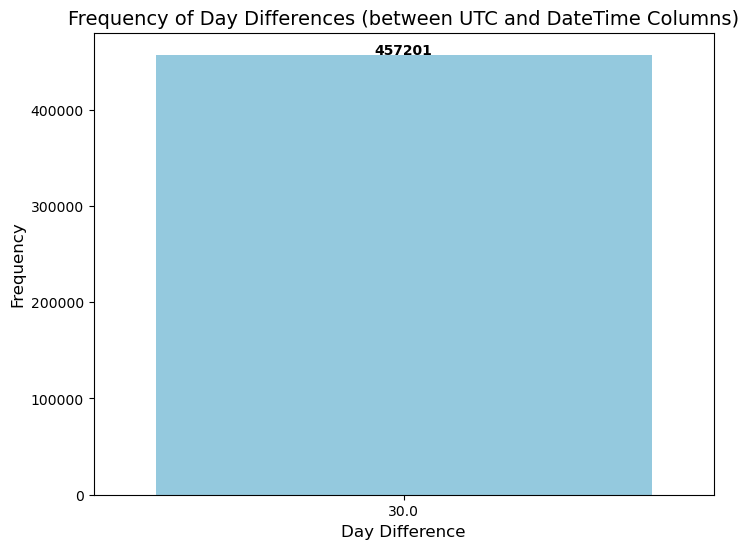

In [49]:
# Grouping by unique day differences and counting occurrences
day_counts = df["DateDiff"].dt.days.value_counts().sort_index()

# Creating Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, color="skyblue")

# Adding text annotations on bars
for index, value in enumerate(day_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10, fontweight='bold')

# Adjusting titles and labels
plt.title("Frequency of Day Differences (between UTC and DateTime Columns)", fontsize=14)
plt.xlabel("Day Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Displaying the plot
plt.show()

In [51]:
# Creating new time columns
df["minute"] = df["DateTime"].dt.minute
df["hour"] = df["DateTime"].dt.hour                
df["day"] = df["DateTime"].dt.day                  
df["month"] = df["DateTime"].dt.month              
df["day_of_week"] = df["DateTime"].dt.dayofweek    
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)
df["year"] = df["DateTime"].dt.year
df["is_weekend"] = df["is_weekend"].astype('category') #converting is_weekend to categorical

In [53]:
df.drop(columns=["DateDiff", "UTC"], inplace = True) ## Since there is a constant time diff between UTC and DateTime there is no need to keep both of them

In [55]:
df[["DateTime","minute","hour","day","month","day_of_week","is_weekend","year"]]

DateTime  minute  hour  day  month  day_of_week  \
231098 2021-01-14 09:19:28.214      19     9   14      1            3   
241306 2021-01-14 09:19:28.214      19     9   14      1            3   
291097 2021-01-14 09:19:28.840      19     9   14      1            3   
741040 2021-01-14 09:19:36.195      19     9   14      1            3   
781036 2021-01-14 09:19:36.549      19     9   14      1            3   
...                        ...     ...   ...  ...    ...          ...   
43501  2020-12-13 11:54:37.247      54    11   13     12            6   
43521  2020-12-13 11:54:37.247      54    11   13     12            6   
43611  2020-12-13 11:54:37.439      54    11   13     12            6   
43621  2020-12-13 11:54:37.439      54    11   13     12            6   
43631  2020-12-13 11:54:37.439      54    11   13     12            6   

       is_weekend  year  
231098          0  2021  
241306          0  2021  
291097          0  2021  
741040          0  2021  
781036          0  2021  
...           ...   ...  
43501           1  2020  
43521           1  2020  
43611           1  2020  
43621           1  2020  
43631           1  2020  

[527540 rows x 8 columns]

<a id="32-missing-values"></a> 
### 3.2. Missing Values

In the preprocessing phase of this notebook, special attention was paid to handling missing data in a dataset containing 4G passive measurements and a group-based handling missing values approach was implemented based on domain knowledge and exploratory data analysis.

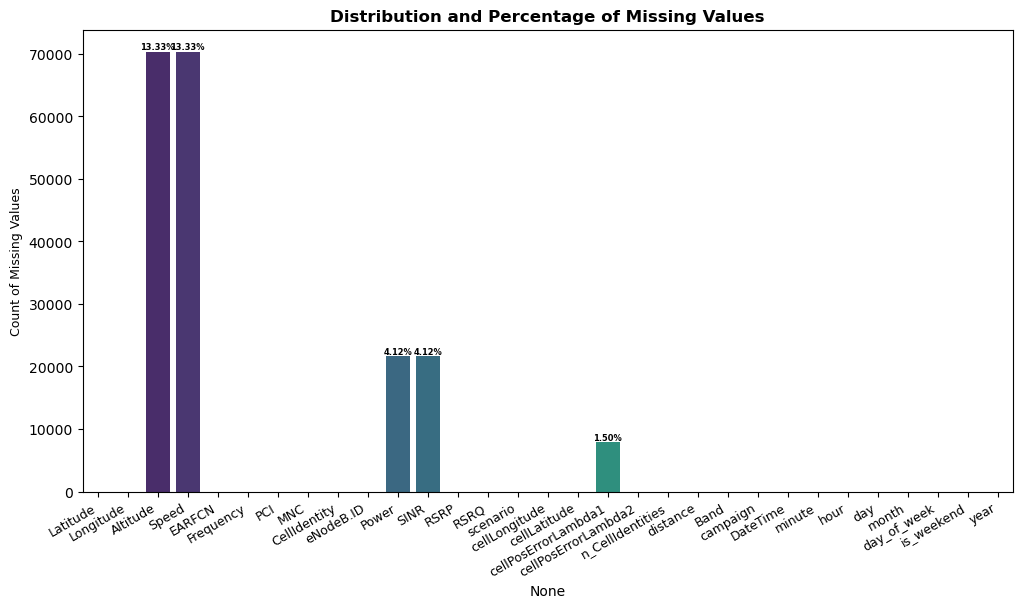

In [59]:
# Calculate missing values
missing_counts = df.isnull().sum()
total_rows = len(df)
missing_percent = (missing_counts / total_rows) * 100

# Visualization
plt.figure(figsize=(12,6))  
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")

# Add percentages above the bars a
for i, p in enumerate(ax.patches):
    if missing_counts[i] > 0:  # Only add labels for columns with missing values
        ax.annotate(f'{missing_percent[i]:.2f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=6, color='black', fontweight='bold')  

# Adjust axis
plt.xticks(rotation=30, ha='right', fontsize=9)  # Rotate and enlarge x-axis labels
plt.ylabel("Count of Missing Values", fontsize=9)
plt.title("Distribution and Percentage of Missing Values", fontsize=12, fontweight='bold')

plt.show()


<div style="text-align: justify;">
As seen in figure above, missing data are included in the columns Speed, Altitude, Power, SINR, and cellPosErrorLambda1. Speed and Altitude had about 13.3% missing value rates, while Power and SINR showed about 4.12% and cellPosErrorLambda1 showed about 1.5% missing records. In addition, the heat map of missing values in figure below reveals patterns that indicate that missing values are not completely random. Therefore, it can be argued that a context-aware strategy would be more appropriate
</div>.

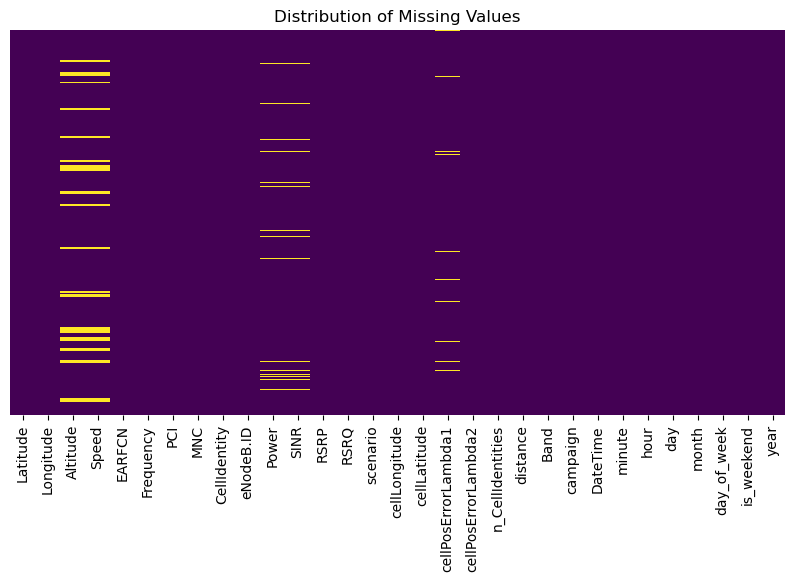

In [62]:
# Heatmap for the distribution of missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Distribution of Missing Values")
plt.show()

In [63]:
print(df.isnull().sum())  

Latitude                   0
Longitude                  0
Altitude               70339
Speed                  70339
EARFCN                     0
Frequency                  0
PCI                        0
MNC                        0
CellIdentity               0
eNodeB.ID                  0
Power                  21714
SINR                   21714
RSRP                       0
RSRQ                       0
scenario                   0
cellLongitude              0
cellLatitude               0
cellPosErrorLambda1     7908
cellPosErrorLambda2        0
n_CellIdentities           0
distance                   0
Band                       0
campaign                   0
DateTime                   0
minute                     0
hour                       0
day                        0
month                      0
day_of_week                0
is_weekend                 0
year                       0
dtype: int64


<div style="text-align: justify;">
In terms of filling missing values, grouped median imputation was applied to preserve the spatial and signal integrity of the data. In detail, Altitude and Speed were filled using the median value in each scenario category. The scenarios represent different collection contexts that may affect the expected range of values of these measurements. Group-based imputation ensures that the filled values reflect the environmental conditions of the original data collection. Power and SINR were filled according to the groupings made by CellIdentity and EARFCN (frequency channel). These features are tightly linked to signal transmission characteristics and cell tower configurations. Estimation within these groups helps maintain network consistency and more accurately reflect real-world radio conditions. Furthermore, cellPosErrorLambda1 was filled using the global median due to its relatively low missing rate and lack of strong grouping relationships. 
</div>

In [65]:
# Filling missing values for Altitude and Speed with the overall median
df['Altitude'] = df.groupby('scenario')['Altitude'].transform(lambda x: x.fillna(x.dropna().median()) if not x.dropna().empty else df['Altitude'].median())
df['Speed'] = df.groupby('scenario')['Speed'].transform(lambda x: x.fillna(x.dropna().median()) if not x.dropna().empty else df['Speed'].median())


# Filling missing values for Power and SINR based on Cell Identity and Frequency grouping
df['Power'] = df.groupby(['CellIdentity', 'EARFCN'])['Power'].transform(lambda x: x.fillna(x.dropna().median()) if not x.dropna().empty else df['Power'].median())
df['SINR'] = df.groupby(['CellIdentity', 'EARFCN'])['SINR'].transform(lambda x: x.fillna(x.dropna().median()) if not x.dropna().empty else df['SINR'].median())

# Filling missing values for cellPosErrorLambda1 based on median
df['cellPosErrorLambda1'].fillna(df['cellPosErrorLambda1'].median(), inplace=True)

# Final checks  if any missing values remain
print(df.isnull().sum())  


Latitude               0
Longitude              0
Altitude               0
Speed                  0
EARFCN                 0
Frequency              0
PCI                    0
MNC                    0
CellIdentity           0
eNodeB.ID              0
Power                  0
SINR                   0
RSRP                   0
RSRQ                   0
scenario               0
cellLongitude          0
cellLatitude           0
cellPosErrorLambda1    0
cellPosErrorLambda2    0
n_CellIdentities       0
distance               0
Band                   0
campaign               0
DateTime               0
minute                 0
hour                   0
day                    0
month                  0
day_of_week            0
is_weekend             0
year                   0
dtype: int64


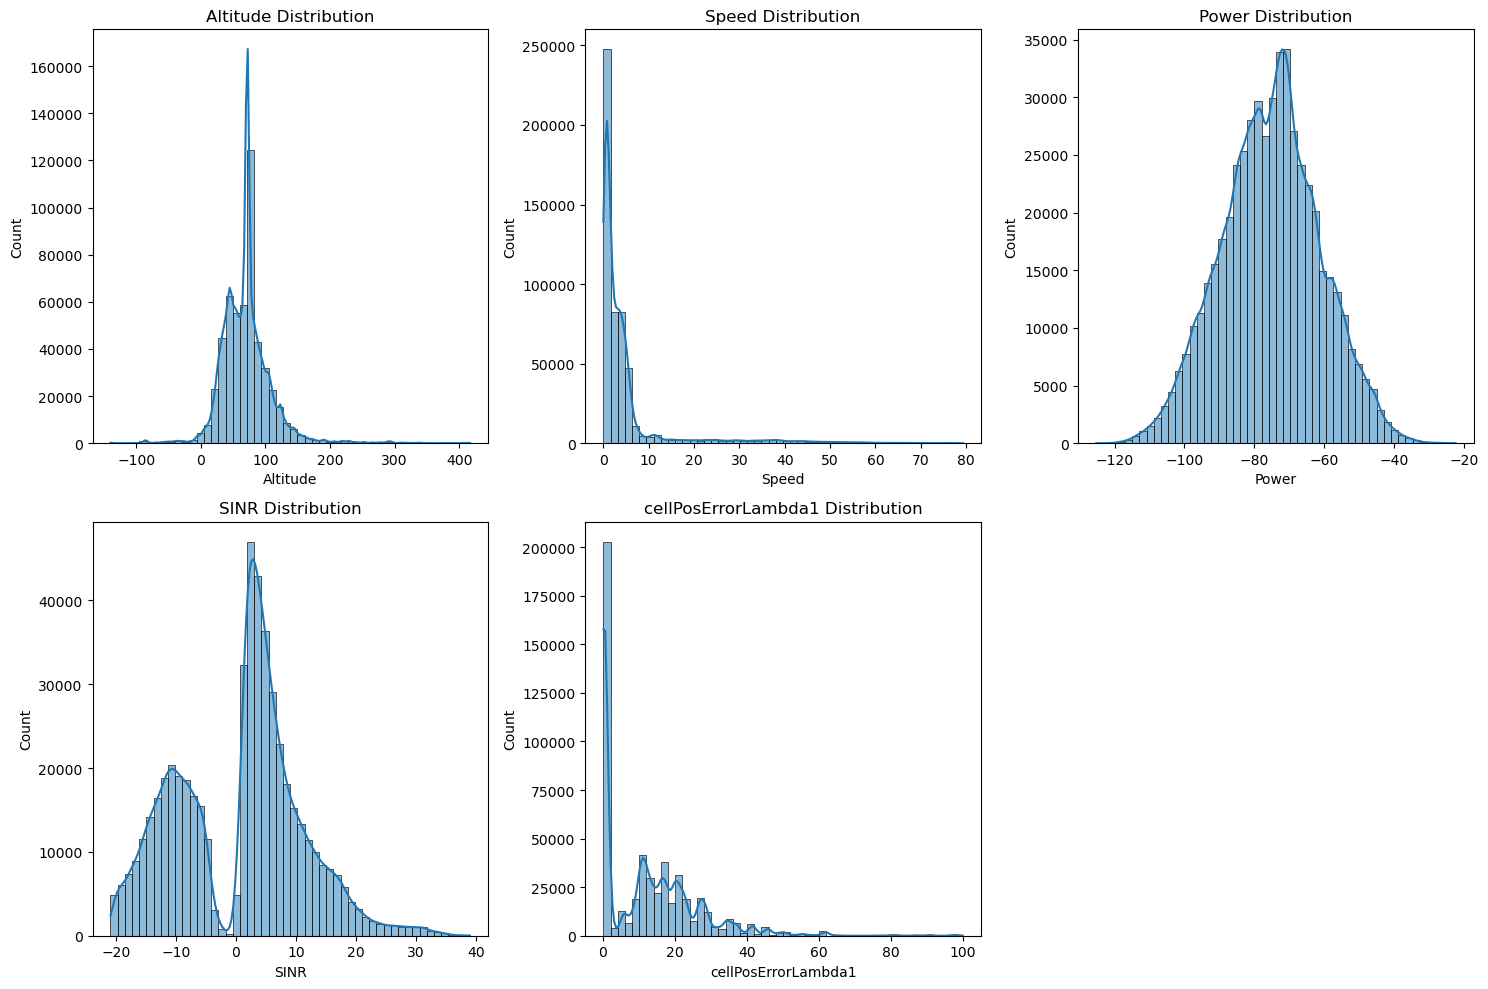

In [66]:
# Histograms for columns with missing values
missing_cols = ['Altitude', 'Speed', 'Power', 'SINR', 'cellPosErrorLambda1']

plt.figure(figsize=(15, 10))
for i, col in enumerate(missing_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


<div style="text-align: justify;">

The figureabovew shows that the central tendencies and spread of the imputed features remain consistent with realistic network behaviour. For example, Altitude and Speed maintain reasonable distributions consistent with expected physical motion in real-world scenarios. Furthermore, Power and SINR exhibit typical bell-shaped and multimodal distributions, respectively, consistent with known signal quality profiles in cellular networks. All in all, this strategy not only ensures the completeness of the dataset but also increases its representativeness for subsequent clustering and classification tasks
</div>
.

<a id="33-outlier-detection"></a> 
### 3.3. Outlier Detection

<div style="text-align: justify;">
In the context of 4G network analysis, the presence of outliers in passive measurement datasets can significantly degrade model training and lead to misleading results (Gil et al., 2019). This section discusses the detection, visualization and handling of outliers in a real-world 4G dataset obtained through the Rohde & Schwarz (R&S) TSMA6 network scanner. In this section two statistical techniques which Interquartile Range (IQR) method and the Z-Score method are examined. To rationalize the application of these two methods, it is important to consider the distributional properties of the dataset. The Z-Score method assumes that the underlying data follow an approximately normal distribution and flags observations as outliers if their standardized values exceed the threshold of |z| > 3 (Rousseeuw and Hubert, 2018). However, real-world network data often exhibit skewness, making the Z-Score less effective in such cases. Besides, the IQR method is nonparametric and more robust to skewed distributions. It detects outliers by identifying values in the first quartile (Q1) minus 1.5 times the interquartile range (IQR) or the third quartile (Q3) plus 1.5 times the IQR (Hubert and Van der Veeken, 2008)
</div>.

In [70]:
# Define numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Define log scale columns (dBm type columns)
log_scale_cols = ['Power', 'SINR', 'RSRP', 'RSRQ']

# Convert dB and dBm values to linear scale before applying outlier detection
df_log_scaled = df.copy()
df_log_scaled[log_scale_cols] = 10 ** (df_log_scaled[log_scale_cols] / 10)  # Convert dB to linear

In [71]:
def detect_outliers(df):
    outlier_counts = pd.DataFrame(index=numeric_cols)
    
    # IQR Method
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
    outlier_counts['IQR'] = iqr_outliers
    
    # Z-Score Method
    z_scores = np.abs(zscore(df[numeric_cols]))
    z_outliers = (z_scores > 3).sum(axis=0)
    outlier_counts['Z-Score'] = z_outliers
    
    return outlier_counts

In [72]:
# Apply outlier detection on log-transformed dataset
outlier_results = detect_outliers(df_log_scaled)
outlier_results

IQR  Z-Score
Latitude              10228    10653
Longitude               258      206
Altitude              22505     9304
Speed                 52364    19629
Frequency                 0        0
Power                 90134     2340
SINR                  76230     5379
RSRP                  92000     1979
RSRQ                   4066     3331
cellLongitude           236      236
cellLatitude           8960    16358
cellPosErrorLambda1    8308     6259
cellPosErrorLambda2    8308     6246
n_CellIdentities          0        0
distance              44952    11941
Band                 122907        0
minute                    0        0
hour                      0        0
day                       0        0
month                     0        0
day_of_week               0        0
year                      0        0

In [73]:
def plot_outliers(outlier_counts):
    plt.figure(figsize=(15, 8))
    
    # Visualize the outlier detection results using a bar plot
    outlier_counts.plot(kind='bar', figsize=(15, 6), width=0.8, colormap='viridis')
    
    # Set plot title and axis labels
    plt.title('Outlier Count by Detection Method', fontsize=14)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Number of Outliers', fontsize=12)
    
    # Rotate column names on the X-axis for better readability
    plt.xticks(rotation=75, ha='right', fontsize=10)
    
    # Add grid lines to improve readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.legend(title='Detection Method')
    plt.show()

<Figure size 1500x800 with 0 Axes>

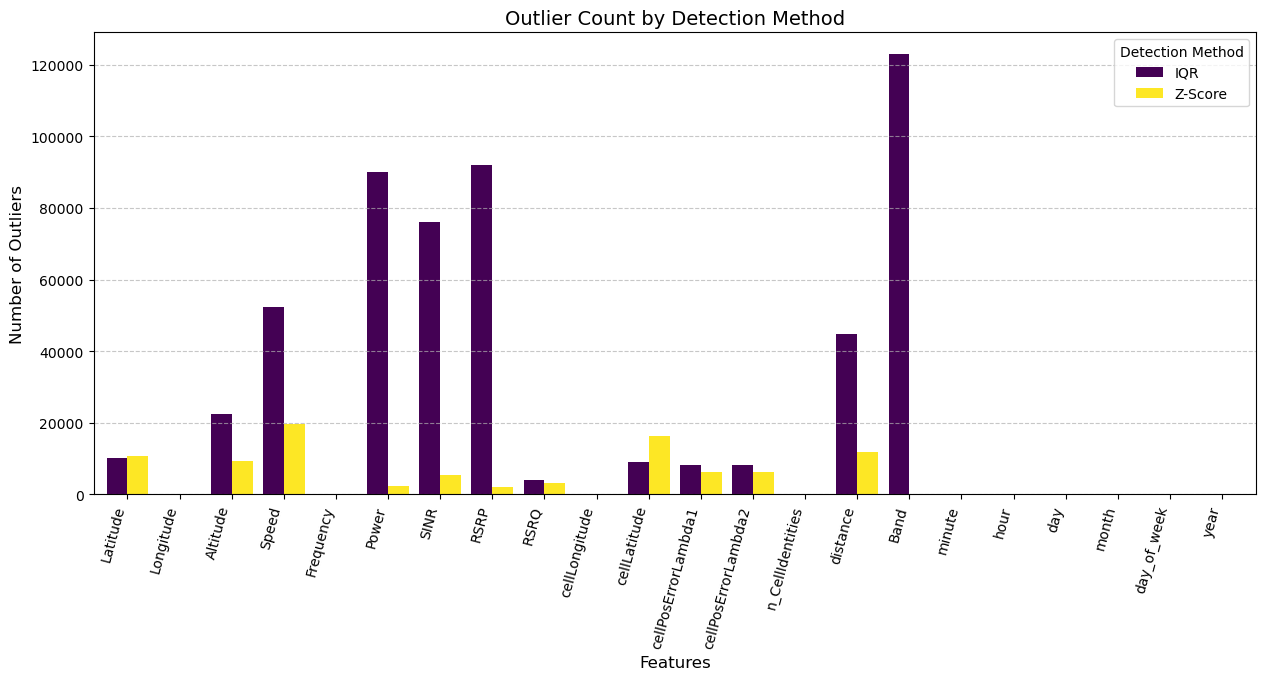

In [74]:
plot_outliers(outlier_results)

<div style="text-align: justify;">
The figure above illustrates the outlier count by applied two detection methods. Before the outlier detection, Power, SINR, RSRP, RSRQ columns were examined by log transformation since they were in dB and dBm types. This stage was a necessary step for detection on a linear basis. The results show that the IQR method identifies significantly more outliers than the Z-Score method for most attributes. For example, attributes such as Band, RSRP, Power, and SINR exhibit exceptionally high outlier frequencies under the IQR method, exceeding 90,000 for the Power column, for example. In contrast, the Z-Score method is more conservative and detects fewer outliers overall. The discrepancy between the two methods is particularly evident for the Band feature, where the IQR method flags more than 120,000 outliers, while Z-Score does not detect any. This suggests that Band has a non-Gaussian distribution, which limits the effectiveness of Z-Score in capturing outliers.
</div>

In [76]:
def plot_outliers(df, outlier_counts, method="IQR"):
    """
    Plots outliers using IQR or Z-Score method.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing numerical features.
    outlier_counts (pd.DataFrame): A DataFrame with outlier counts from IQR/Z-Score.
    method (str): "IQR" or "Z-Score" to determine which method's outliers to plot.
    """
    if method not in ["IQR", "Z-Score"]:
        raise ValueError("Invalid method! Choose 'IQR' or 'Z-Score'.")
    
    outliers = outlier_counts[method].sort_values(ascending=False)  # Sort outliers
    top_features = outliers[outliers > 0].index  # Only features with outliers
    
    if len(top_features) == 0:
        print(f"No outliers detected using {method} method!")
        return
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), gridspec_kw={'height_ratios': [2, 1]})
    
    # 1️ Boxplot + Stripplot (Highlight outliers in red)
    plt.sca(axes[0])
    sns.boxplot(data=df[top_features], orient='h', showfliers=False, palette="coolwarm")
    sns.stripplot(data=df[top_features], orient='h', color='red', alpha=0.5, jitter=True, size=3)
    plt.title(f"Feature Distributions & Outliers ({method} Method)", fontsize=14)
    plt.xlabel("Feature Values")
    
    # 2️ Bar Plot (Outlier Count per Feature)
    plt.sca(axes[1])
    sns.barplot(x=outliers.index, y=outliers.values, palette="viridis")
    plt.xticks(rotation=75)
    plt.ylabel("Number of Outliers")
    plt.title(f"Outlier Count per Feature ({method} Method)", fontsize=14)
    
    plt.tight_layout()
    plt.show()



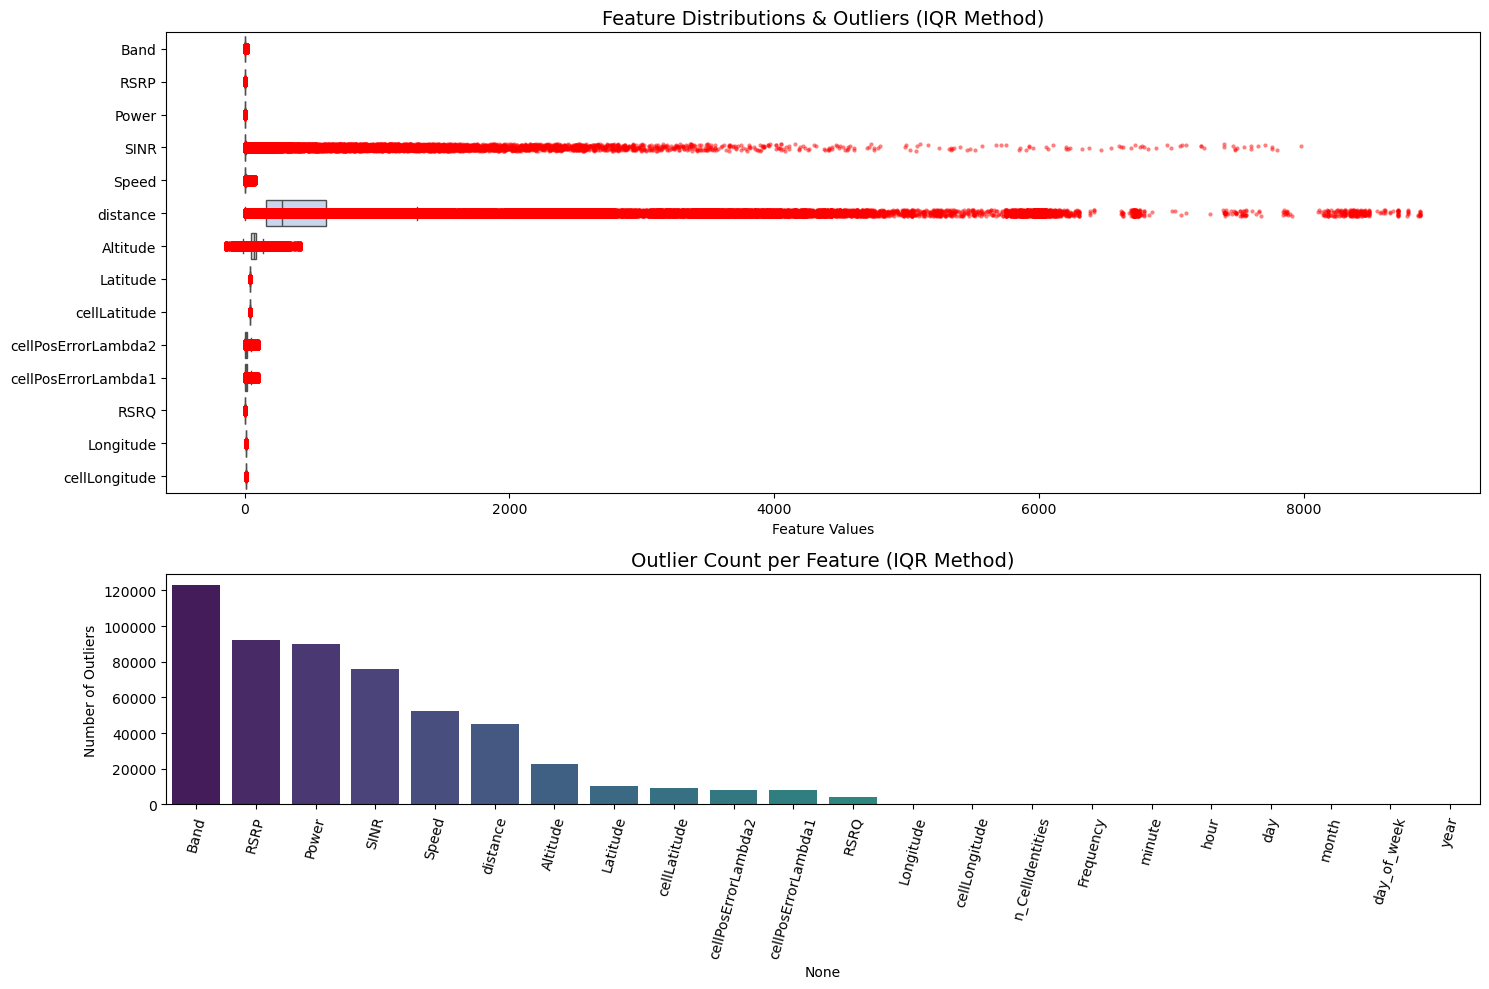

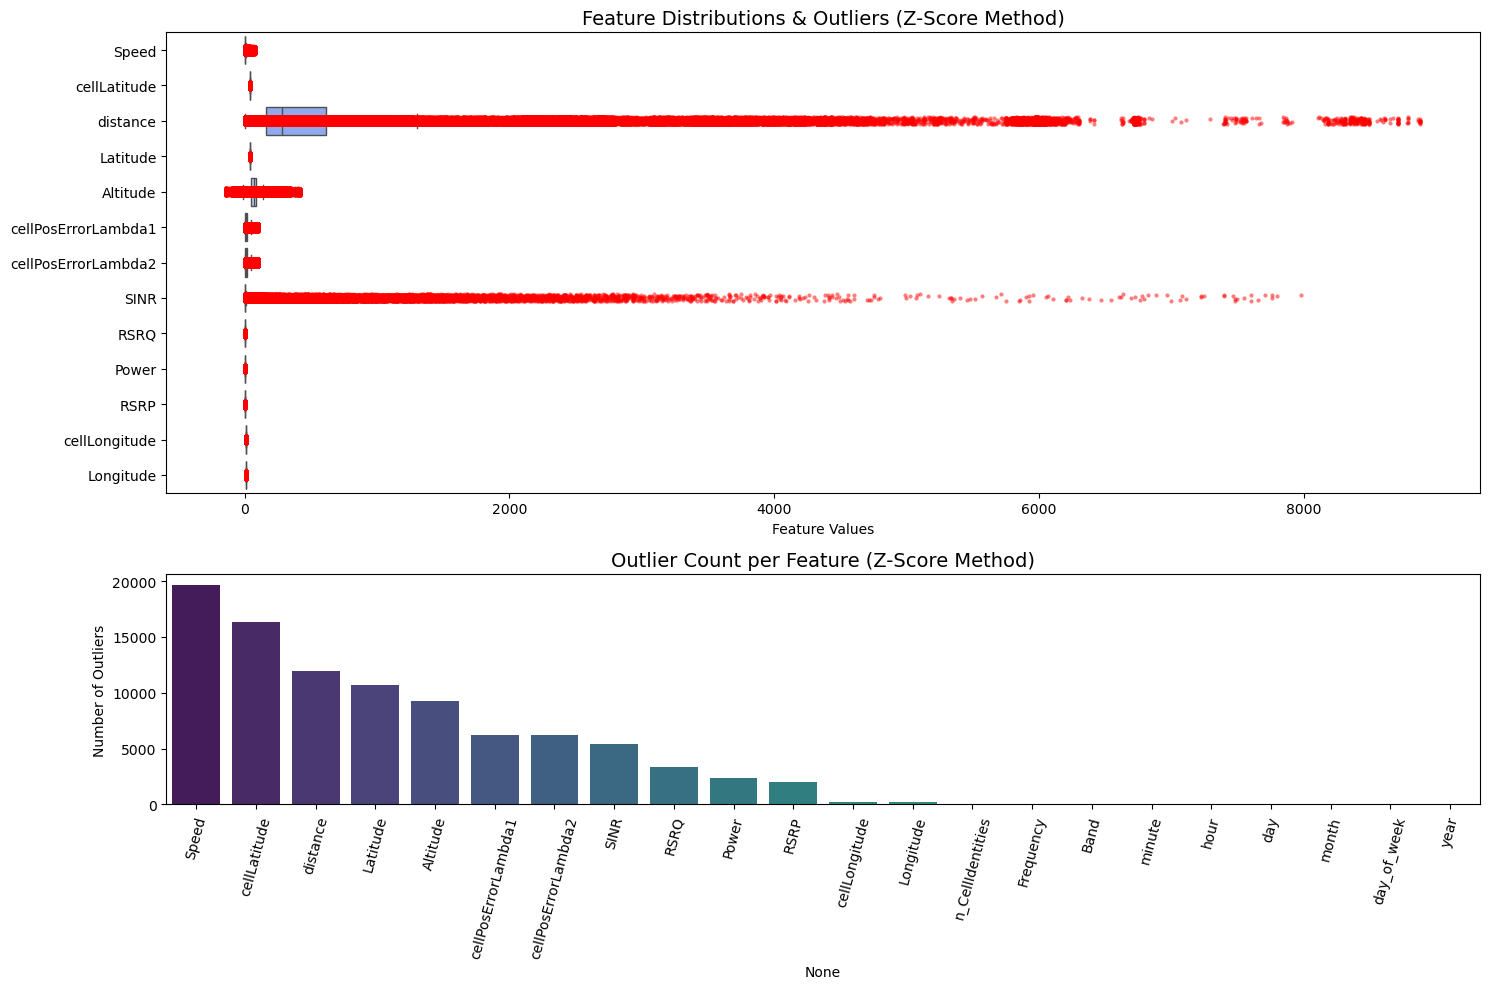

In [77]:
# IQR Outliers
plot_outliers(df_log_scaled, outlier_results, method="IQR")
# Z-Score Outliers
plot_outliers(df_log_scaled, outlier_results, method="Z-Score")

<div style="text-align: justify;">As seen in figures above, features such as Speed, Distance, and Altitude contain significant high-level outliers, indicating irregularities in user mobility or measurements. Signal-related features such as RSRP and SINR also show significant variability, especially in the lower tail, which may correspond to weak signal conditions or hardware measurement errors. The fact that Z-Score fails to capture most of these anomalies highlights its limitations for skewed or heavy-tailed variables. Meanwhile, the IQR method successfully identifies these irregular data points, making it a more suitable choice for this context. 

</di>


In [79]:
df[numeric_cols].describe()

Latitude      Longitude       Altitude          Speed  \
count  527540.000000  527540.000000  527540.000000  527540.000000   
mean       41.883335      12.485928      69.821677       4.906786   
std         0.014385       0.022367      38.320453       9.491854   
min        41.823736      12.418497    -139.740000       0.000000   
25%        41.871599      12.464796      46.290000       0.900000   
50%        41.890723      12.494066      72.010000       1.910000   
75%        41.893862      12.495141      84.990000       4.430000   
max        41.903102      12.533860     416.550000      79.270000   

           Frequency          Power           SINR           RSRP  \
count  527540.000000  527540.000000  527540.000000  527540.000000   
mean     1852.404799     -75.230305       0.698689     -99.071670   
std       655.671952      14.081707      10.572373      14.119162   
min       806.000000    -125.230000     -20.930000    -145.520000   
25%      1807.500000     -84.720000      -8.652500    -108.570000   
50%      1870.000000     -74.880000       2.680000     -99.100000   
75%      2647.500000     -65.860000       7.100000     -89.650000   
max      2662.500000     -22.400000      39.020000     -43.170000   

                RSRQ  cellLongitude   cellLatitude  cellPosErrorLambda1  \
count  527540.000000  527540.000000  527540.000000        527540.000000   
mean      -20.398189      12.486287      41.883051            12.566750   
std         5.396874       0.022390       0.015900            13.395932   
min       -49.890000      12.418621      41.824584             0.139538   
25%       -24.360000      12.467131      41.871271             0.381207   
50%       -19.550000      12.493153      41.890689            10.810001   
75%       -15.870000      12.497913      41.896503            20.130005   
max        -7.990000      12.543056      41.902997           100.000000   

       cellPosErrorLambda2  n_CellIdentities       distance           Band  \
count        527540.000000     527540.000000  527540.000000  527540.000000   
mean             12.335065          7.676123     555.458030       7.667083   
std              13.537118          2.966718     796.369764       7.085365   
min               0.000000          1.000000       0.000000       1.000000   
25%               0.246736          5.000000     158.577997       3.000000   
50%              10.810001          8.000000     286.565321       3.000000   
75%              20.130005         10.000000     616.922601       7.000000   
max             100.000000         13.000000    8881.635590      20.000000   

              minute           hour            day          month  \
count  527540.000000  527540.000000  527540.000000  527540.000000   
mean       29.121513      12.827513      16.534445       8.091929   
std        17.210191       3.297321       7.076857       5.264581   
min         0.000000       7.000000       2.000000       1.000000   
25%        15.000000      10.000000      13.000000       1.000000   
50%        29.000000      12.000000      16.000000      12.000000   
75%        43.000000      15.000000      22.000000      12.000000   
max        59.000000      20.000000      31.000000      12.000000   

         day_of_week           year  
count  527540.000000  527540.000000  
mean        2.051549    2020.355279  
std         1.859105       0.478598  
min         0.000000    2020.000000  
25%         0.000000    2020.000000  
50%         2.000000    2020.000000  
75%         3.000000    2021.000000  
max         6.000000    2021.000000

<div style="text-align: justify;">
Based on the IQR and Z-Score methods, the features Altitude, RSRP, RSRQ, and distance were flagged as suspicious due to the presence of extreme values. As shown in figure below, their histograms and boxplots were analysed to better understand these distributions. This visual inspection guided the outlier handling process. 
</div>


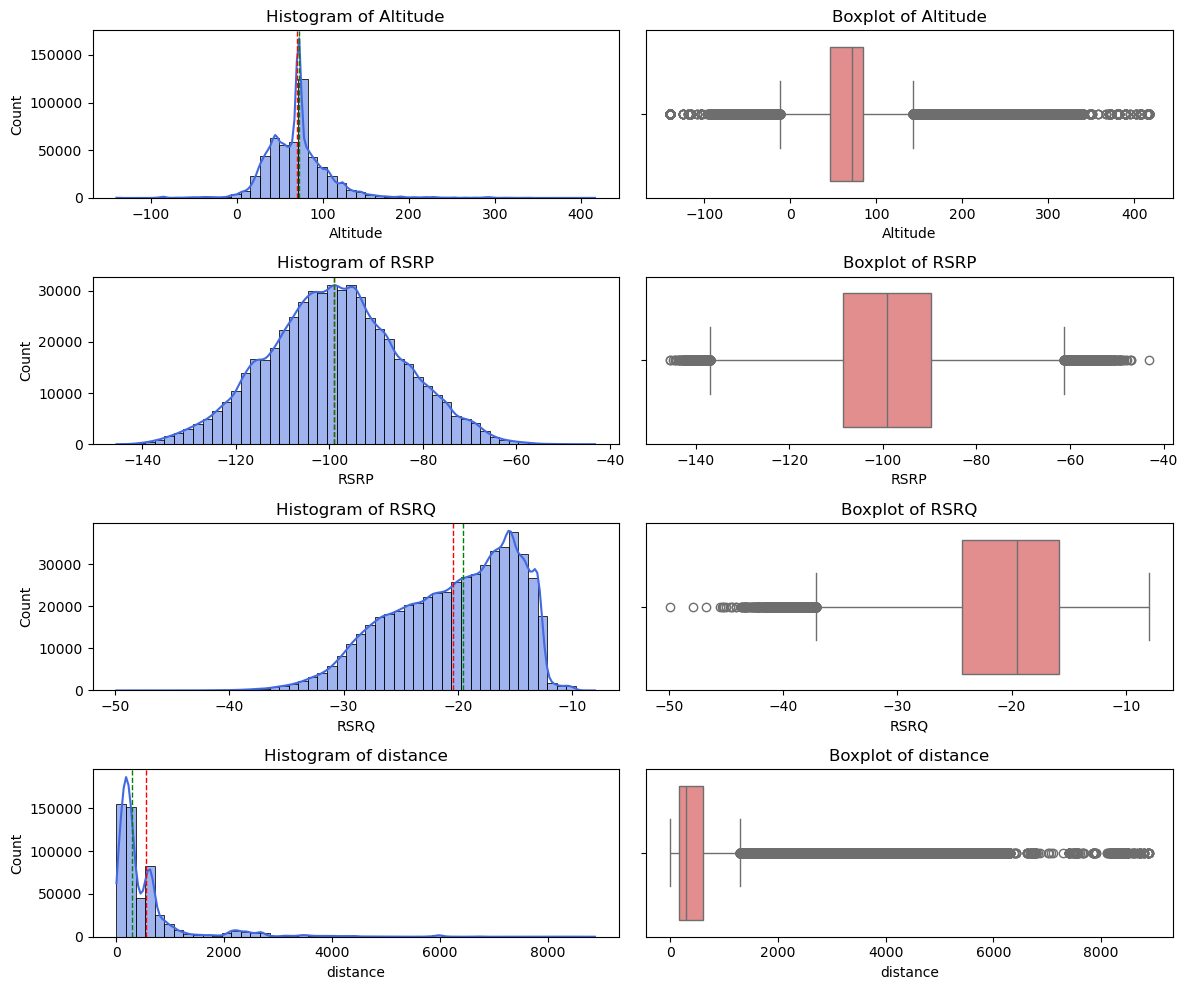

In [81]:
suspicious_cols = ['Altitude', 'RSRP', 'RSRQ', 'distance']

# visualization
plt.figure(figsize=(12, 10))

# Loop through each column and create a subplot for histograms and boxplots
for i, col in enumerate(suspicious_cols):
    plt.subplot(len(suspicious_cols), 2, 2 * i + 1)
    sns.histplot(df[col], bins=50, kde=True, color='royalblue')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean line
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1)  # Median line
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(len(suspicious_cols), 2, 2 * i + 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


<div style="text-align: justify;">In outlier handling part, two domain-informed transformations were applied to the features RSRQ and Altitude to address specific types of invalid or physically impossible values. 
First, RSRQ feature was examined. Any value falling below -30 dB was capped at -30 dB. This decision is grounded in telecommunication engineering principles. In practical LTE and 4G deployments, RSRQ values typically range between -3 dB (excellent signal quality) and -20 dB (poor signal quality) (CableFree, 2025). Values below -30 dB are not only extremely rare but also indicative of measurement errors or sensor noise. Thus, replacing such values with a lower bound of -30 dB serves as a form of value clipping, which helps retain the record while mitigating the influence of spurious signal readings on downstream models. To sum up, this approach preserves the sample distribution while ensuring the integrity of signal quality metrics remains within technically plausible boundaries. After that, Altitude feature was examined. All values below 0 were set to 0. Altitude, representing elevation above sea level, should theoretically be a non-negative quantity. While negative altitudes are possible in specific geological contexts, such cases are unlikely in geographical conditions of Rome (Topographic Map, 2025). Therefore, assigning a minimum of zero ensures physical plausibility and helps prevent the propagation of erroneous geographic data into models that might rely on spatial context.


</div>


In [83]:
#  Limit RSRQ to -30 dB if it is below -30
df['RSRQ'] = df['RSRQ'].apply(lambda x: -30 if x < -30 else x)

#  Set Altitude to 0 if it is below 0
df['Altitude'] = df['Altitude'].apply(lambda x: 0 if x < 0 else x)

<a id="34-encoding--normalization"></a> 
### 3.4. Encoding & Normalization

In this step label encoding has performed for categorical variables and standart scaler has used for numerical variables.


In [86]:
df_eda = df.copy() # dataframe for Explanatory Data Analysis
df_cla= df.copy()  # dataframe for Classification Task

In [87]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = df.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()

In [88]:
# create label encoder object 
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    df_cla[col] = le.fit_transform(df_cla[col])

In [89]:
# StandardScaler object
scaler = StandardScaler()

for col in numeric_cols:
    df_cla[col] = scaler.fit_transform(df_cla[col].values.reshape(-1, 1))

In [90]:
total_columns = len(categorical_cols) + len(numeric_cols)
print(f"Categorical Columns: {len(categorical_cols)}, Numerical Columns: {len(numeric_cols)}, Total Columns: {total_columns}")

Categorical Columns: 8, Numerical Columns: 22, Total Columns: 30


In [91]:
print("Encoded & Scaled DataFrame:")
df_cla.head()

Encoded & Scaled DataFrame:


Latitude  Longitude  Altitude     Speed  EARFCN  Frequency  PCI  MNC  \
231098  0.930621   0.955628 -0.452221 -0.092373       6  -1.595929  381    0   
241306  0.930621   0.955628 -0.452221 -0.092373       6  -1.595929  380    0   
291097  0.930552   0.954957 -0.419966 -0.088158       2  -0.049422  254    0   
741040  0.933193   0.951470 -0.420779 -0.092373       4   1.212643  248    1   
781036  0.933193   0.951470 -0.420779 -0.092373       6  -1.595929  381    0   

        CellIdentity  eNodeB.ID     Power      SINR      RSRP      RSRQ  \
231098           914        165  1.480667  0.567641  1.444256  0.170094   
241306           916        165  1.604942  0.423870  1.666649  0.782559   
291097           911        165  2.313664  2.151961  2.490354  1.323084   
741040           378         59  0.991380  1.079353  0.918021  1.113096   
781036           914        165  1.876216  0.070118  1.973325  0.558961   

        scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  \
231098         2       0.803609      0.455923            -0.146071   
241306         2       0.803609      0.455923            -0.146071   
291097         2       0.803609      0.455923            -0.759470   
741040         2       0.931703      0.874233            -0.005729   
781036         2       0.803609      0.455923            -0.146071   

        cellPosErrorLambda2  n_CellIdentities  distance      Band  campaign  \
231098            -0.127432         -0.564976  0.253684  1.740620       153   
241306            -0.127432         -0.564976  0.253684  1.740620       153   
291097            -0.849297         -0.564976  0.253037 -0.658694       153   
741040             0.011445         -0.564976 -0.669909 -0.094150       153   
781036            -0.127432         -0.564976  0.255428  1.740620       153   

                      DateTime    minute      hour       day     month  \
231098 2021-01-14 09:19:28.214 -0.588112 -1.160796 -0.358132 -1.347103   
241306 2021-01-14 09:19:28.214 -0.588112 -1.160796 -0.358132 -1.347103   
291097 2021-01-14 09:19:28.840 -0.588112 -1.160796 -0.358132 -1.347103   
741040 2021-01-14 09:19:36.195 -0.588112 -1.160796 -0.358132 -1.347103   
781036 2021-01-14 09:19:36.549 -0.588112 -1.160796 -0.358132 -1.347103   

        day_of_week  is_weekend      year  
231098     0.510166           0  1.347103  
241306     0.510166           0  1.347103  
291097     0.510166           0  1.347103  
741040     0.510166           0  1.347103  
781036     0.510166           0  1.347103

<a id="35-data-visualizations"></a> 
### 3.5. Data Visualizations

<div style="text-align: justify;">
In this study, Pearson's Correlation was used to analyse the numerical columns. In this case, the correlation matrix systematically quantifies linear relationships between multiple numeric variables by evaluating their relationships on a standard scale and this process ranging from -1 to 1 (Alshammari, 2024). Furthermore, this step facilitates informed decision making in statistical modelling and feature selection by allowing them to detect dependencies and identify patterns in the data. The results of the applied correlation matrix provided a comprehensive overview of the linear relationships between numerical features in the dataset. Figure 2.10 illustrates the correlation matrix of numerical features. For instance, power shows strong positive correlations with RSRP (0.97) and RSRQ (0.77). This indicates that signal strength measurements are closely linked and may affect each other. In addition, SINR also shows a moderate correlation with Power (0.77), indicating its dependence on signal strength quality.
</div>


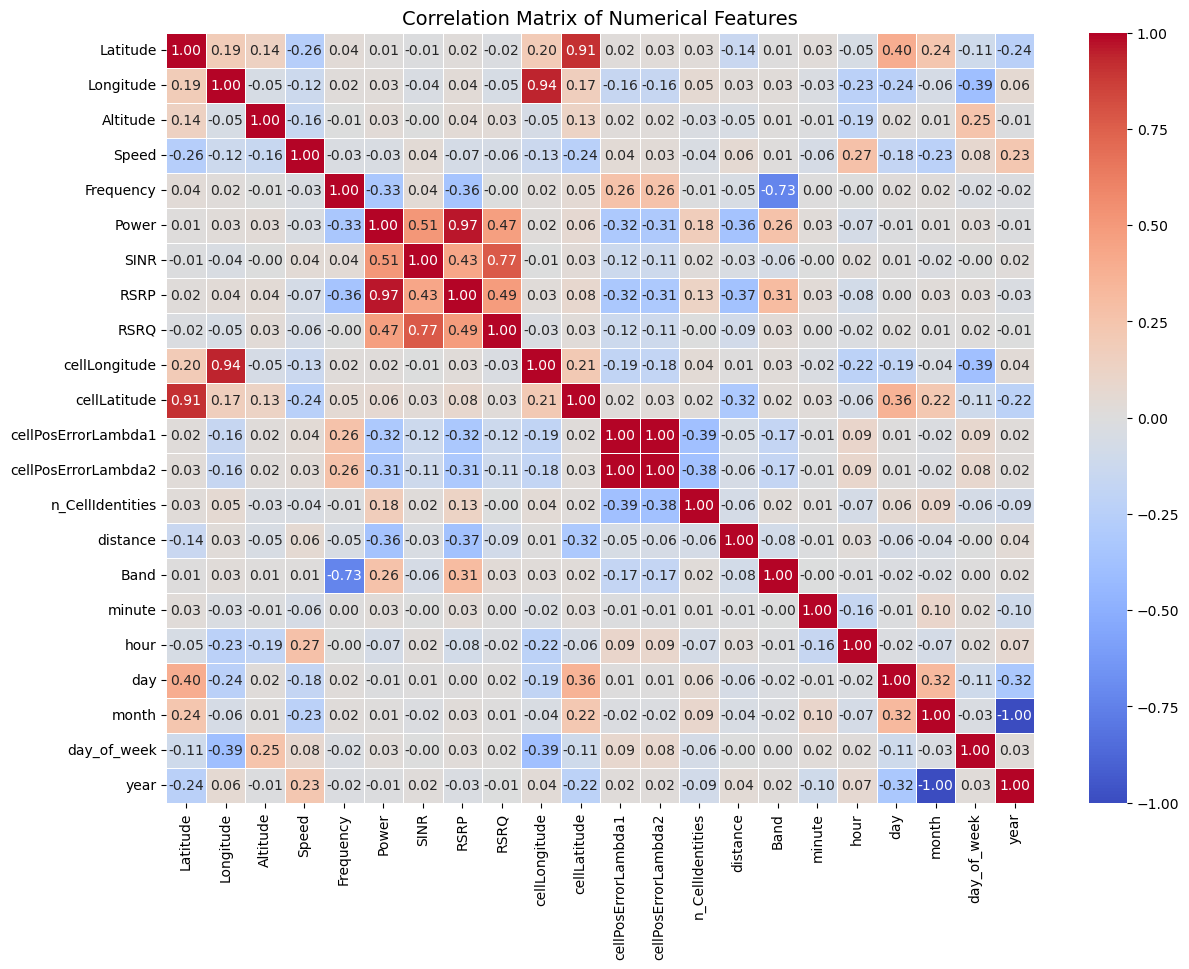

In [96]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_eda[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


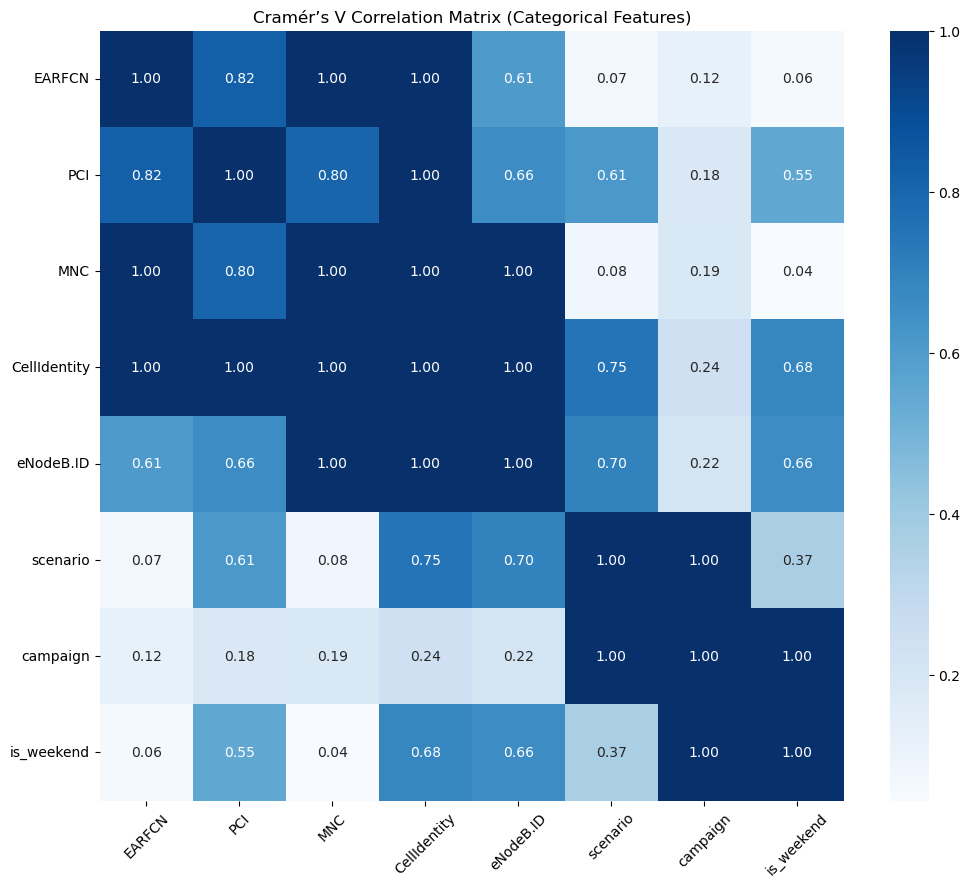

In [98]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Cramer's V Matrix for Categorical Features
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(df_eda[col1], df_eda[col2])
        else:
            cramers_results.loc[col1, col2] = 1.0  # perfect correlation with itself

# Convert to float for heatmap
cramers_results = cramers_results.astype(float)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cramers_results, annot=True, fmt=".2f", cmap="Blues")
plt.title("Cramér’s V Correlation Matrix (Categorical Features)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


<div style="text-align: justify;">In this work, Cramér’s V was used to assess the strength of the relationship between categorical variables. Cramér’s V is derived from the chi-square statistic, and this provides a normalized measure that ranges from 0 to 1 (perfect correlation) (Skotarczak et al., 2019). The figure above indicates the heatmap visualizes Cramér’s V values between pairs of categorical variables. Moreover, darker tones indicate stronger relationships, while lighter tones indicate weaker or negligible relationships. For example, the Cramér’s V value between the variables EARFCN and PCI is 0.82, indicating a strong relationship between them. In detail, it can be said that the same or similar physical cell identities (PCIs) are often repeated for a given frequency band (EARFCN).

</div>


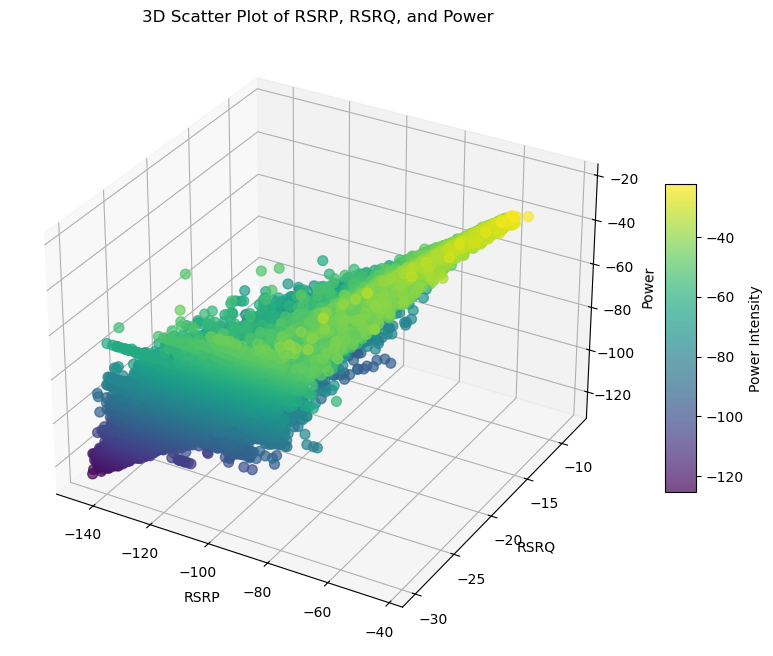

In [100]:
# Extracting individual features for plotting
x = df_eda['RSRP']  # Reference Signal Received Power
y = df_eda['RSRQ']  # Reference Signal Received Quality
z = df_eda['Power']  # Power measurement

# Creating a 3D figure to visualize the relationship between RSRP, RSRQ, and Power
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Defining a 3D axis for the plot

# Generating a 3D scatter plot with color intensity mapped to the 'Power' feature
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.7)

# Setting axis labels to specify the parameters being plotted
ax.set_xlabel('RSRP')  # X-axis represents received power strength
ax.set_ylabel('RSRQ')  # Y-axis represents received signal quality
ax.set_zlabel('Power')  # Z-axis represents power measurement
ax.set_title('3D Scatter Plot of RSRP, RSRQ, and Power')  # Title for clarity

# Adding a color bar to indicate intensity variations in the Power feature
cb = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=10)  # Adjust size and aspect ratio
cb.set_label('Power Intensity')  # Label describing the significance of colors

# Display the visualization
plt.show()

<div style="text-align: justify;">
A 3D graph of the RSRP, RSRQ and Power columns was plotted as seen in figure given above. Each data point is color-coded according to its power density, with yellow indicating higher power levels and purple indicating lower levels. In detail, a clear positive trend is observed between RSRP and Power. This indicates that stronger signal strength is associated with better signal reception. Moreover, RSRQ shows a consistent pattern, indicating that signal quality improves with increasing power. The density and alignment of the points emphasize the non-random structure. Furthermore, this supports the assumption of a significant correlation between these features. This visualization is particularly useful for identifying patterns in signal performance and can assist in feature selection for modelling or clustering tasks.
</div>

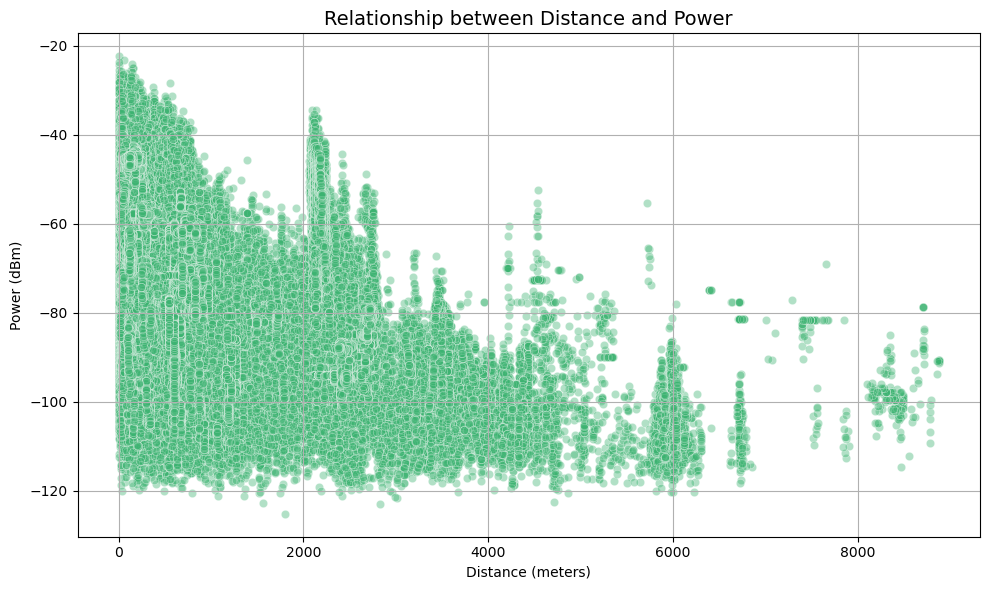

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x="distance", y="Power", alpha=0.4, color="mediumseagreen")

plt.title("Relationship between Distance and Power", fontsize=14)
plt.xlabel("Distance (meters)")
plt.ylabel("Power (dBm)")
plt.grid(True)
plt.tight_layout()
plt.show()


<div style="text-align: justify;">
The scatter plot in figure given above shows the inverse relationship between signal strength and distance. As the distance from the source increases, the received power decreases continuously, highlighting the signal attenuation in space. This negative correlation reflects the common wireless communication behaviour where greater distances result in higher path loss, which in turn reduces signal strength.
</div>

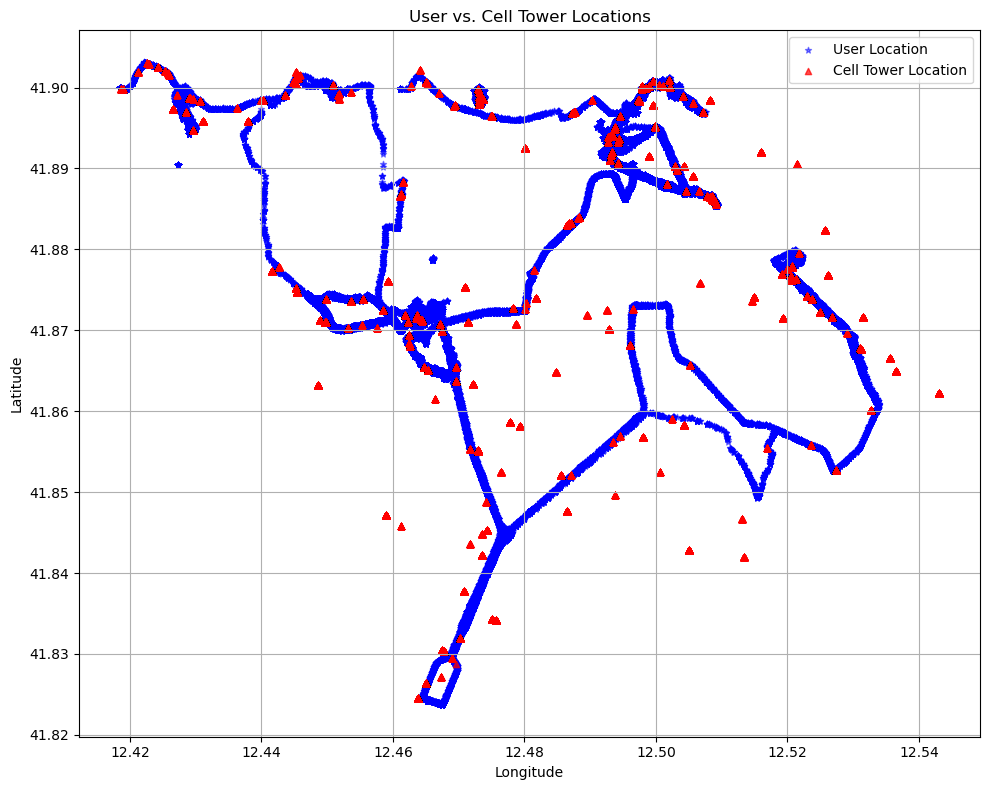

In [104]:
plt.figure(figsize=(10, 8))

# User locations (marked with a star '*')
plt.scatter(df_eda['Longitude'], df_eda['Latitude'], 
            s=20, c='blue', marker='*', label='User Location', alpha=0.5)

# Cell tower locations (marked with a triangle '^')
plt.scatter(df_eda['cellLongitude'], df_eda['cellLatitude'], 
            s=20, c='red', marker='^', label='Cell Tower Location', alpha=0.7)

# Axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Title for better readability
plt.title('User vs. Cell Tower Locations')

# Legend for clarity
plt.legend()

# Grid for better visualization
plt.grid(True)

# Adjust layout for optimal spacing
plt.tight_layout()

# Show the plot
plt.show()

<div style="text-align: justify;">
The correlation matrix revealed that there is a high correlation between Latitude, Longitude, cellLongitude and cellLatitude. The figure given above illustrates the locations of user locations and cell locations. This figure shows the location information as coordinates and reveals their locations.
</div>

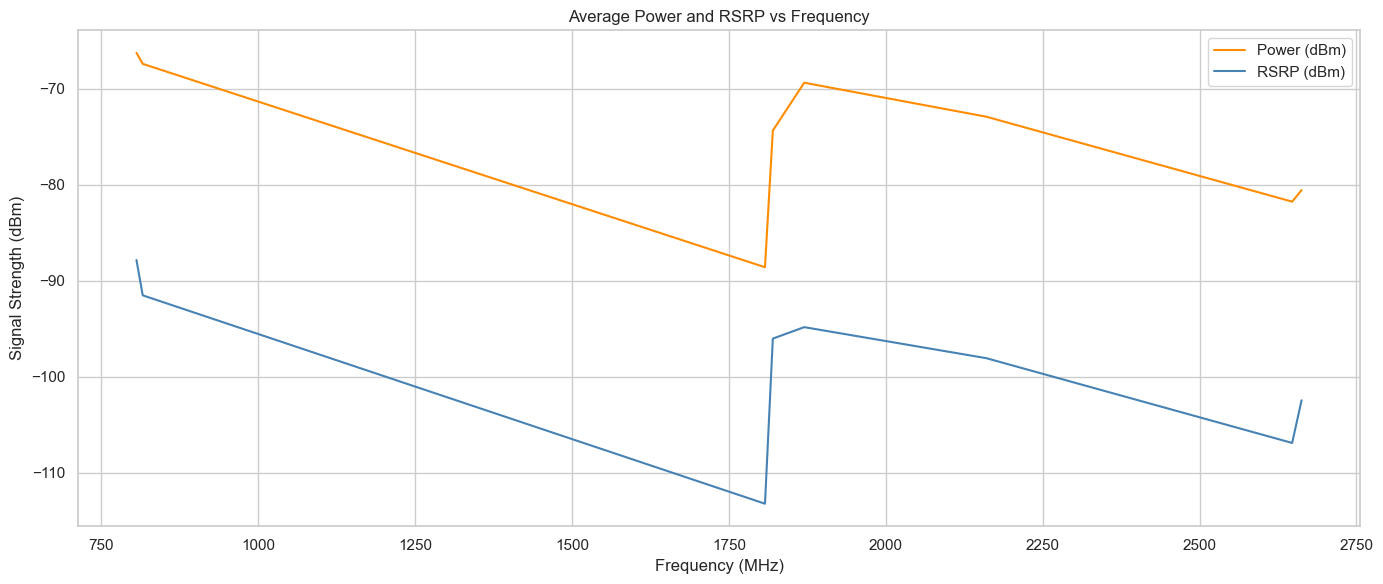

In [106]:
# Grouping data by frequency and calculating the mean of Power and RSRP
grouped = df_eda.groupby('Frequency')[['Power', 'RSRP']].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Plotting the line charts
plt.figure(figsize=(14, 6))

# Line chart for Power
sns.lineplot(data=grouped, x='Frequency', y='Power', label='Power (dBm)', color='darkorange')

# Line chart for RSRP
sns.lineplot(data=grouped, x='Frequency', y='RSRP', label='RSRP (dBm)', color='steelblue')

# Titles and labels
plt.title('Average Power and RSRP vs Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Signal Strength (dBm)')
plt.legend()
plt.tight_layout()
plt.show()


<div style="text-align: justify;">
The figure given above illustrates the relationship between average Power and RSRP across different frequency bands. As frequency increases, both Power and RSRP generally decrease. This indicates signal attenuation at higher frequencies. A sharp improvement is observed around 1800 MHz, likely due to optimized network configurations or favourable propagation characteristics within that band.
</div>

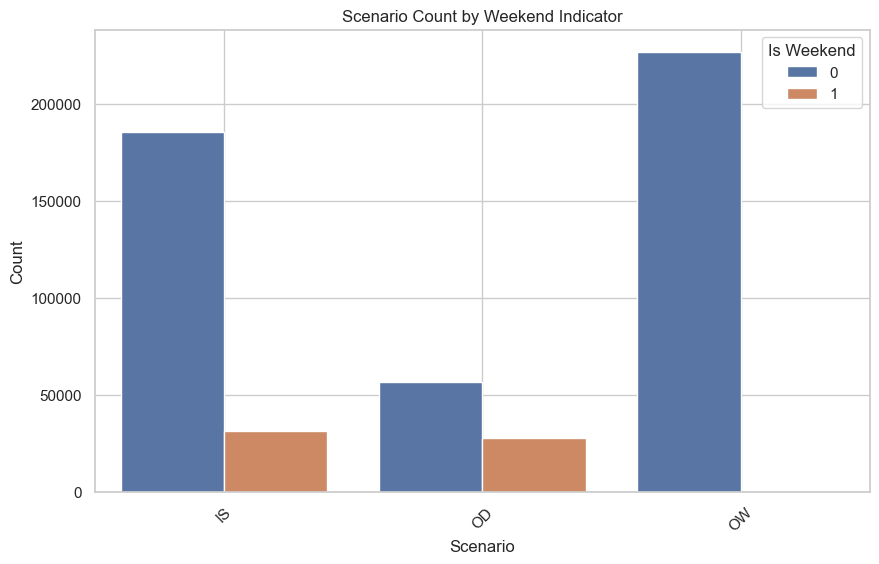

In [108]:
# Count plot to compare scenario distribution between weekdays and weekends
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='scenario', hue='is_weekend')
plt.title('Scenario Count by Weekend Indicator')
plt.xlabel('Scenario')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Weekend')
plt.grid(True)
plt.show()


<div style="text-align: justify;">
The chart illustrates scenario counts split by weekday and weekend. All scenarios IS, OD, and OW occur more frequently on weekdays. OW shows the highest weekday activity, while OD has the most balanced distribution. This suggests reduced network activity during weekends across all scenarios.
</div>

In [110]:
del df_eda # delete df_eda dataframe after Explanatory Data Analysis finished

<a id="4-clustering-analysis-task-2"></a> 
# 4. Clustering Analysis (Task 2)

<a id="41-k-means-clustering"></a> 
### 4.1. K-Means Clustering

In [113]:
df = df.sample(frac=0.05, random_state=42) # use 5% of data for only clustering

Considering the experimental setup, a random 5% portion of the dataset was taken only for clustering task in terms of time and processing power efficiency. 

#### K-Means with Using Encoded Catogorical Columns and Scaled Numerical Columns

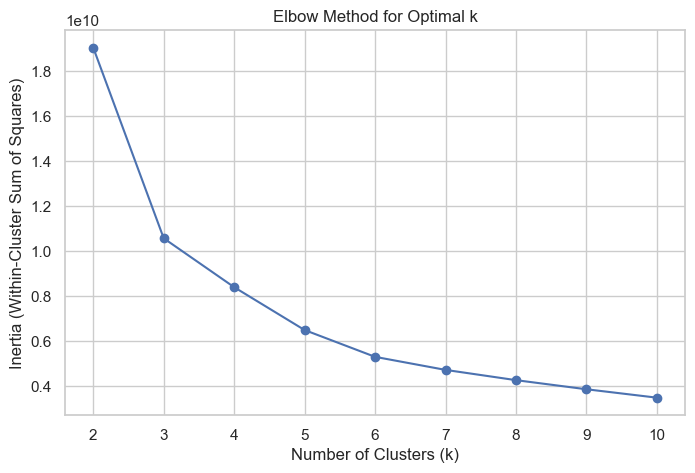

In [116]:
# --- Prepare Dataframe ---
X = df[numeric_cols + categorical_cols ]  # In this part both numerical and categorical columns used for clustering

# --- Elbow Method to find optimal k ---
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',   # KMeans++ initialization
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

<div style="text-align: justify;">
In this study, normalized numeric data was used together with categorical variables encoded in the first K means algorithm. However, since the structure of categorical variables does not fit k-means, a noticeable performance loss was noticed. As seen in above, the cluster numbers and silhouette scores of K-means performed with all different data are seen. For this reason, the study was performed only with numerical data.
</div>


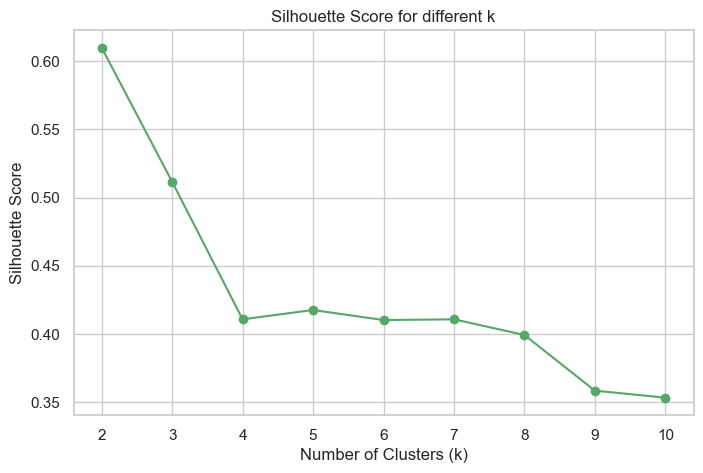

In [118]:
# --- Silhouette Scores for different k values ---
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.grid(True)
plt.show()


In [119]:
for k in K:
    print(f"Cluster Number: {k}, Silhouette Score: {silhouette_scores[k-2]:.2f}")

Cluster Number: 2, Silhouette Score: 0.61
Cluster Number: 3, Silhouette Score: 0.51
Cluster Number: 4, Silhouette Score: 0.41
Cluster Number: 5, Silhouette Score: 0.42
Cluster Number: 6, Silhouette Score: 0.41
Cluster Number: 7, Silhouette Score: 0.41
Cluster Number: 8, Silhouette Score: 0.40
Cluster Number: 9, Silhouette Score: 0.36
Cluster Number: 10, Silhouette Score: 0.35


#### K-Means with Using Scaled Numerical Columns 

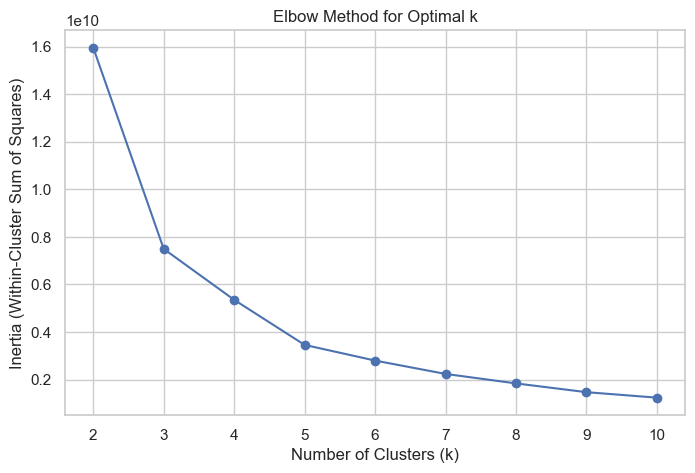

In [121]:
# --- Preprocessed DataFrame ---
X = df[numeric_cols]  # only numerical variables

# --- Elbow Method to find optimal k ---
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',   # KMeans++ initialization
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

<div style="text-align: justify;">Based on the elbow method illustrated in plot above, the optimal number of clusters appears to be 3. At this point, there is a significant reduction in the within-cluster sum of squares (inertia), and the rate of decrease slows down beyond this value. In addition, as Shi et al. (2021) pointed this inflection point indicates a balance between model complexity and performance. Therefore, selecting three clusters is likely to provide meaningful separation without overfitting the data.

</div>


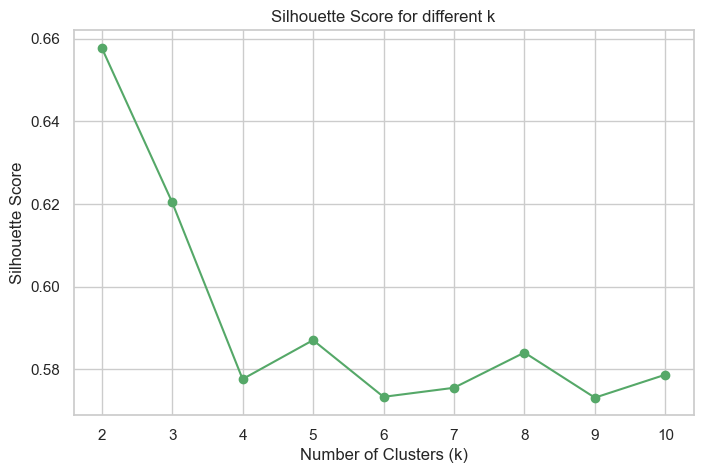

In [128]:
# --- Silhouette Scores for different k values ---
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.grid(True)
plt.show()


In [131]:
for k in K:
    print(f"Cluster Number: {k}, Silhouette Score: {silhouette_scores[k-2]:.2f}")

Cluster Number: 2, Silhouette Score: 0.66
Cluster Number: 3, Silhouette Score: 0.62
Cluster Number: 4, Silhouette Score: 0.58
Cluster Number: 5, Silhouette Score: 0.59
Cluster Number: 6, Silhouette Score: 0.57
Cluster Number: 7, Silhouette Score: 0.58
Cluster Number: 8, Silhouette Score: 0.58
Cluster Number: 9, Silhouette Score: 0.57
Cluster Number: 10, Silhouette Score: 0.58


In [132]:
# --- Fiting final KMeans model  ---
optimal_k =  3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X)

# Add cluster labels to a new column
X['kmeans_cluster'] = cluster_labels


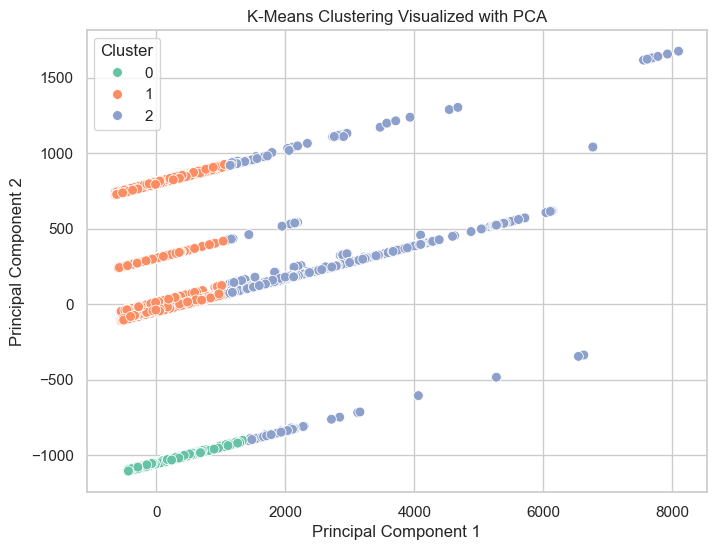

In [133]:
# --- PCA for visualization ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca["Cluster"] = cluster_labels

# --- Scatter plot with clusters ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=50)
plt.title("K-Means Clustering Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


<div style="text-align: justify;">
The figure given above visualizes clustering using PCA, where data points are projected onto two principal components. The three clusters (0, 1, and 2) show clear separation, indicating that the algorithm successfully identified distinct groups in the dataset with minimal overlap.
</div>


In [135]:
df['KMeans_Cluster'] = cluster_labels

In [136]:
df[numeric_cols + ["KMeans_Cluster"]].groupby('KMeans_Cluster').mean(numeric_only=True)

Latitude  Longitude   Altitude     Speed    Frequency  \
KMeans_Cluster                                                           
0               41.883420  12.486607  71.669401  5.123059   811.353012   
1               41.884211  12.485864  70.664597  4.640890  2197.041954   
2               41.877298  12.484683  65.488229  5.701742  1738.201682   

                    Power      SINR        RSRP       RSRQ  cellLongitude  \
KMeans_Cluster                                                              
0              -66.693135 -0.074406  -89.616002 -19.881291      12.487047   
1              -76.539603  1.105606 -100.592971 -20.212311      12.486083   
2              -89.018939 -0.237862 -113.266769 -21.578011      12.485781   

                cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  \
KMeans_Cluster                                                           
0                  41.883997             6.978375             6.717572   
1                  41.884663            14.948591            14.742572   
2                  41.867788            10.040455             9.685056   

                n_CellIdentities     distance       Band     minute  \
KMeans_Cluster                                                        
0                       7.958225   379.932160  20.000000  29.205938   
1                       7.613802   355.510260   3.993266  28.865647   
2                       7.413162  2942.785839   5.064325  28.875309   

                     hour        day     month  day_of_week         year  
KMeans_Cluster                                                            
0               12.641982  16.280338  7.824443     2.120145  2020.379596  
1               12.823304  16.747024  8.133437     2.033723  2020.351506  
2               13.251361  15.586838  8.021277     2.187036  2020.361702

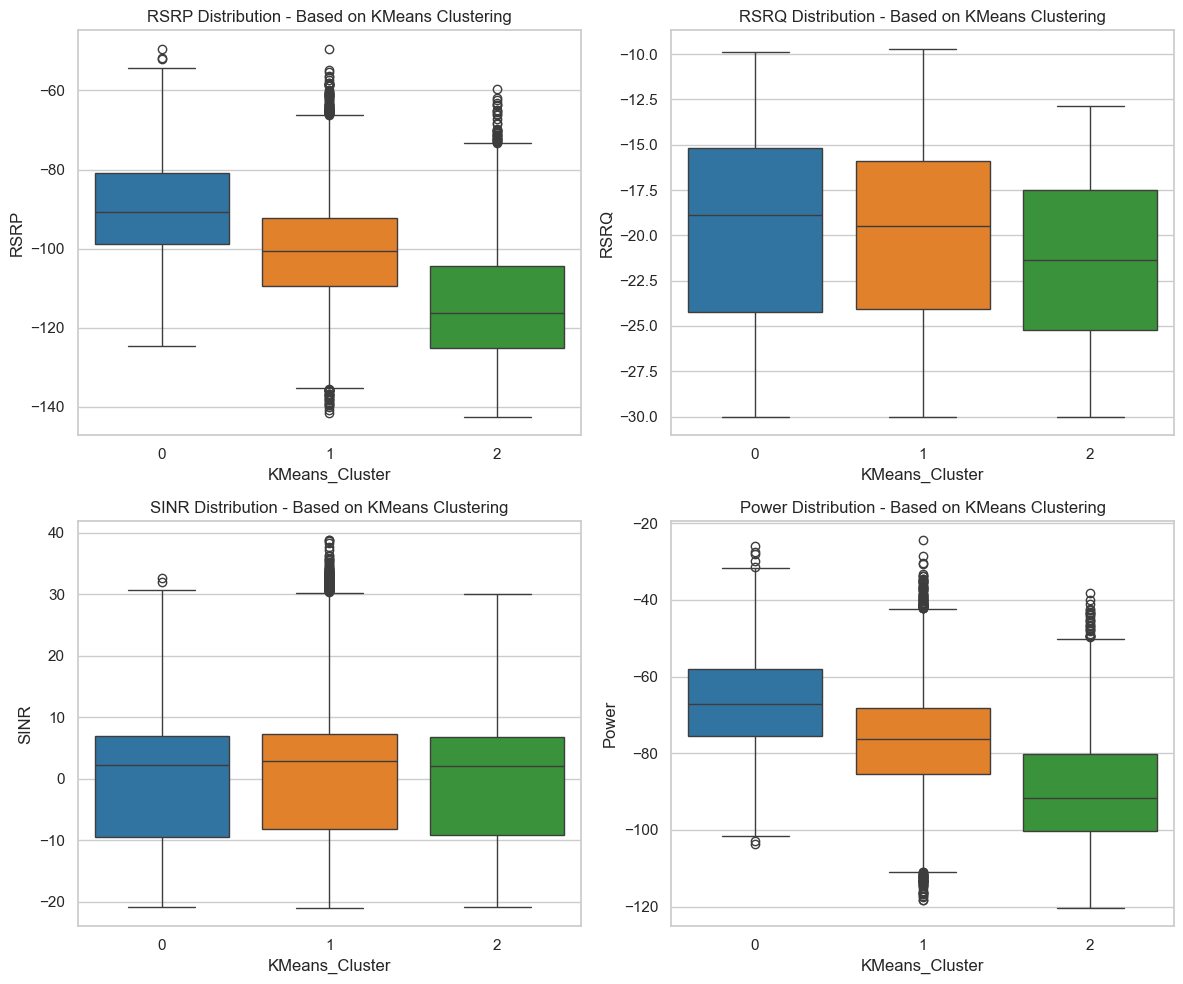

In [137]:
cluster_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create  2x2 grid

# List of signal metrics to visualize
metrics = ['RSRP', 'RSRQ', 'SINR', 'Power']

# Loop through each metric and plot on respective subplot
for ax, col in zip(axes.flat, metrics):  
    sns.boxplot(data=df, x='KMeans_Cluster', y=col, palette=cluster_colors, ax=ax)  # Apply custom colors
    ax.set_title(f"{col} Distribution - Based on KMeans Clustering")  # Set individual titles

plt.tight_layout()  # Adjust spacing for better visualization
plt.show()  # Display 

<div style="text-align: justify;">
The figure above shows the distribution of RSRP, RSRQ, SINR and Power across three clusters. Each subplot shows a clear variation in signal characteristics across clusters. It also highlights the effectiveness of the clustering approach in distinguishing patterns in the dataset. Cluster 2 consistently shows the poorest signal quality with the lowest median values for all four metrics, especially RSRP and Power, indicating poorer coverage. Besides, Cluster 0 appears to represent regions with better signal conditions reflected by higher median values. The clear separation in SINR and RSRQ values further supports the ability of the clustering model to segment data according to quality of service.
</div>


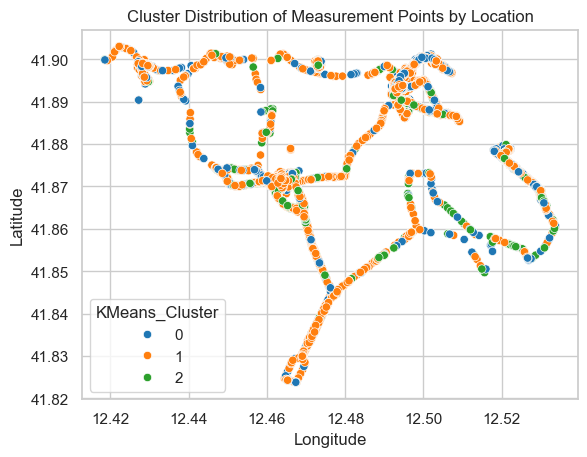

In [139]:
# Scatter plot of measurement points based on geographic location
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='KMeans_Cluster', palette='tab10')

plt.title("Cluster Distribution of Measurement Points by Location")  # Set plot title
plt.show()  # Display the plot

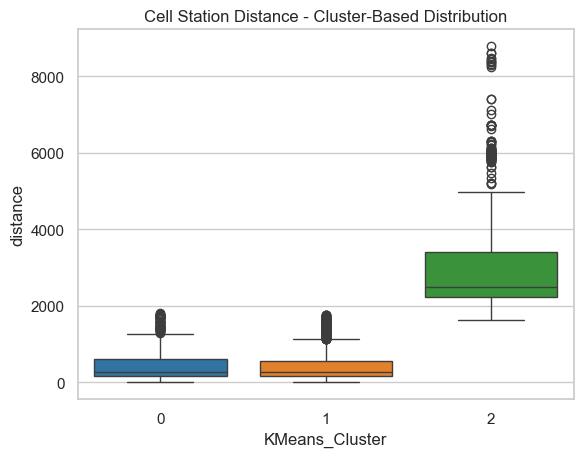

In [140]:
cluster_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Box plot showing base station distance distribution per cluster
sns.boxplot(data=df, x='KMeans_Cluster', y='distance', palette=cluster_colors)

plt.title("Cell Station Distance - Cluster-Based Distribution")  # Set plot title
plt.show()  # Display the plot

<div style="text-align: justify;">The plot above shows the distribution of cell location distances in the three clusters defined by K-Means clustering. Cluster 2 exhibits significantly higher distance values, including a wide range and a considerable number of outliers. It also shows that users in this cluster are generally farther from the cell location. In contrast, Clusters 0 and 1 have more compact distributions with lower median distances, indicating closer location to the cell station.

</div>


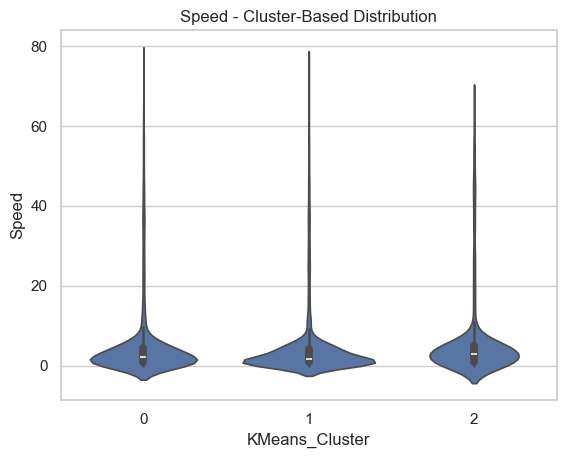

In [142]:
# Violin plot showing speed distribution across KMeans clusters
sns.violinplot(data=df, x='KMeans_Cluster', y='Speed')

plt.title("Speed - Cluster-Based Distribution")  # Set plot title
plt.show()  # Display the plot

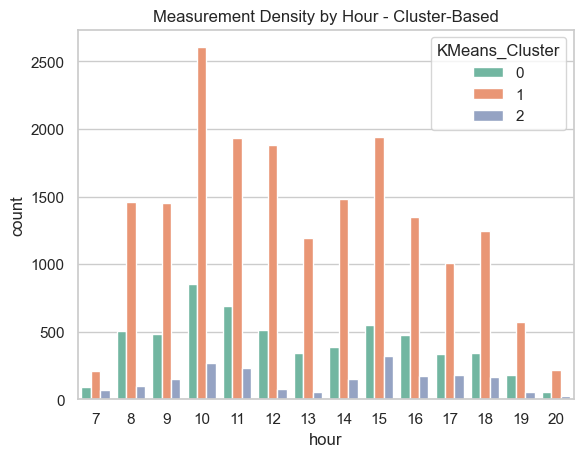

In [143]:
# Count plot showing measurement density by hour and clustered with KMeans
sns.countplot(data=df, x='hour', hue='KMeans_Cluster', palette='Set2')

plt.title("Measurement Density by Hour - Cluster-Based")  # Set plot title
plt.show()  # Display the plot

<a id="42-agglomerative-clustering"></a> 
### 4.2. Agglomerative Clustering

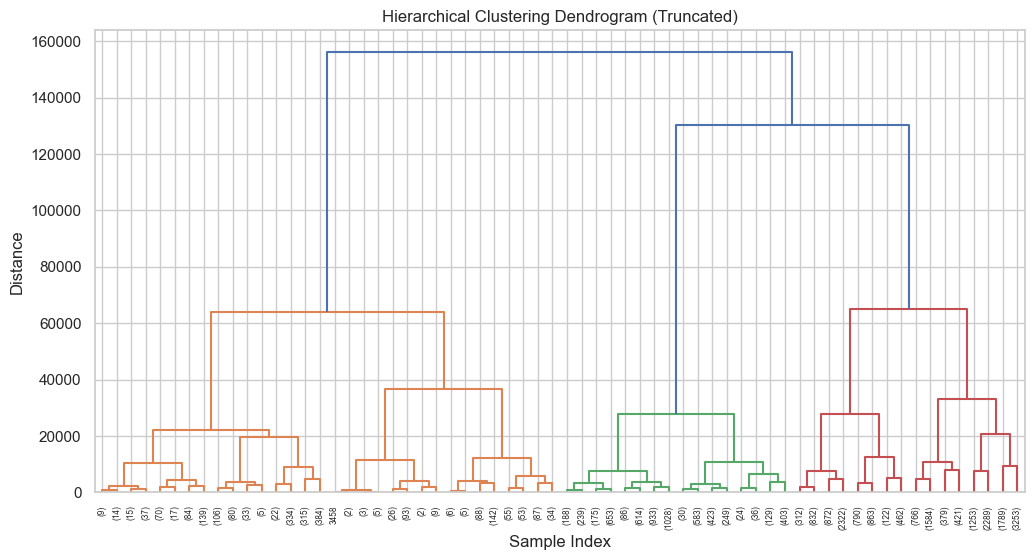

In [145]:
# --- Generate a Dendrogram using Ward linkage ---
linked = linkage(X, method='ward')  # Ward minimizes variance within clusters

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


<div style="text-align: justify;">The figure above illustrates the hierarchical clustering dendrogram. This plot visually represents the nested grouping of data points according to their pairwise distances. In the figure, vertical lines indicate the distance at which clusters merge, and longer vertical lines reflect greater dissimilarity. Observe the largest vertical distances that are not crossed by horizontal lines, and a natural division into three main clusters is determined, represented by distinct colours. This visual gap, also known as the “distance threshold,” supports the selection of the optimal number of clusters without requiring prior assumptions (Li et al., 2022). Therefore, the dendrogram plays an important role for defining the optimal number of clusters in agglomerative clustering. So, the optimal number of clusters was determined as three. On the other hand, this is justified by the clear separation observed at a high linkage distance, where the data split into three main branches before large vertical mergers occur. This significant jump in linkage distance indicates a natural cutoff point.

</div>


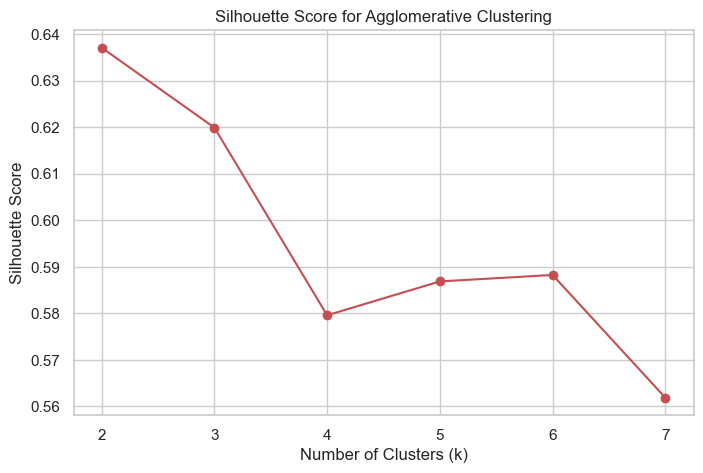

In [147]:
# --- Evaluate cluster quality using Silhouette Score ---
silhouette_scores = []
K = range(2, 8)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.grid(True)
plt.show()


In [148]:
# --- Fit Agglomerative Model with Optimal k ---
optimal_k = 3  # based on silhouette and dendrogram
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_model.fit_predict(X)

# Add cluster labels to DataFrame
df['Agglo_Cluster'] = agg_labels


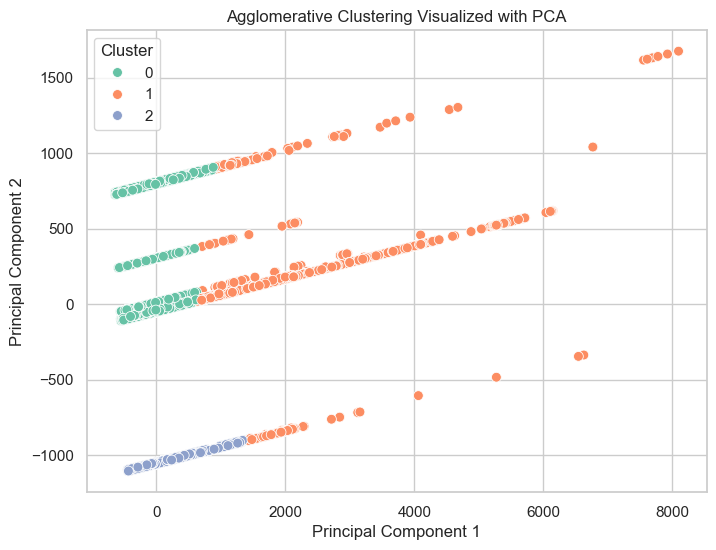

In [149]:
# --- PCA + Cluster Visualization ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_pca_agg = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df_pca_agg["Cluster"] = agg_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_agg, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=50)
plt.title("Agglomerative Clustering Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


<div style="text-align: justify;">
Figure given above visualizes clustering using PCA, where data points are projected onto two principal components. The three clusters (0, 1, and 2) show clear separation, indicating that the algorithm successfully identified distinct groups in the dataset with minimal overlap.
</div>


In [151]:
df[numeric_cols + ["Agglo_Cluster"]].groupby('Agglo_Cluster').mean(numeric_only=True)

Latitude  Longitude   Altitude     Speed    Frequency  \
Agglo_Cluster                                                           
0              41.884341  12.485904  70.847572  4.552269  2201.225561   
1              41.877022  12.484494  64.593596  6.296519  1755.761143   
2              41.883420  12.486607  71.669401  5.123059   811.353012   

                   Power      SINR        RSRP       RSRQ  cellLongitude  \
Agglo_Cluster                                                              
0             -76.306456  1.137122 -100.353045 -20.184416      12.486181   
1             -89.501985 -0.341501 -113.782659 -21.650026      12.485021   
2             -66.693135 -0.074406  -89.616002 -19.881291      12.487047   

               cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  \
Agglo_Cluster                                                           
0                 41.884865            14.860776            14.655381   
1                 41.868048            11.295161            10.951425   
2                 41.883997             6.978375             6.717572   

               n_CellIdentities     distance       Band     minute       hour  \
Agglo_Cluster                                                                   
0                      7.629636   341.193415   4.003550  28.909334  12.802119   
1                      7.308132  2769.141494   4.861978  28.522637  13.374066   
2                      7.958225   379.932160  20.000000  29.205938  12.641982   

                     day     month  day_of_week         year  
Agglo_Cluster                                                 
0              16.738107  8.142280     2.039161  2020.350702  
1              15.788132  7.962637     2.126154  2020.367033  
2              16.280338  7.824443     2.120145  2020.379596

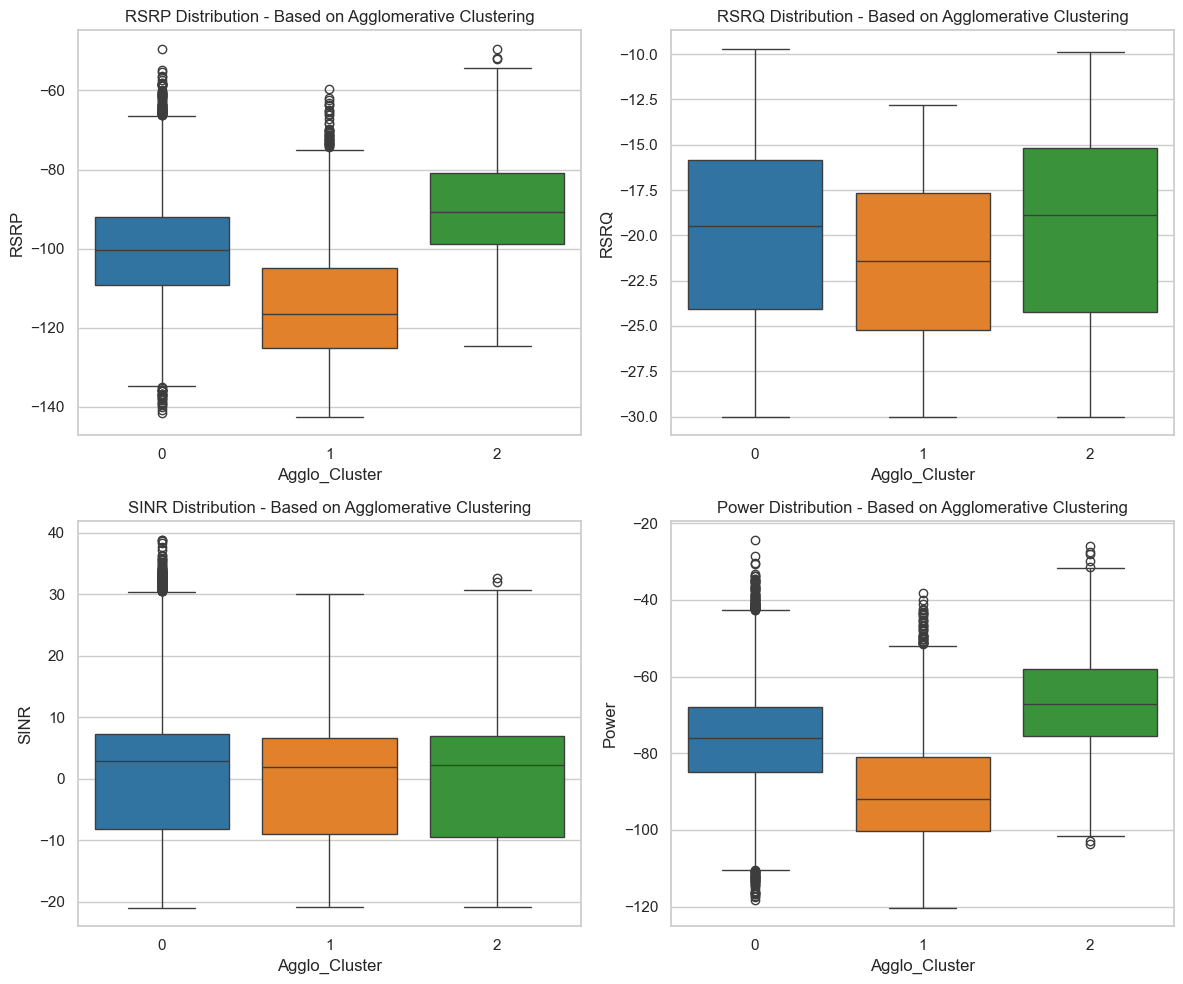

In [152]:
cluster_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid

# List of signal metrics to visualize
metrics = ['RSRP', 'RSRQ', 'SINR', 'Power']

# Loop through each metric and plot on respective subplot
for ax, col in zip(axes.flat, metrics):  
    sns.boxplot(data=df, x='Agglo_Cluster', y=col, palette=cluster_colors, ax=ax)  # Apply custom colors
    ax.set_title(f"{col} Distribution - Based on Agglomerative Clustering")  # Set individual titles

plt.tight_layout()  # Adjust spacing for better visualization
plt.show()  # Display the plots

<div style="text-align: justify;">Plots given above indicate the distribution of RSRP, RSRQ, SINR, and Power across three clusters derived from agglomerative clustering. Each subplot reveals distinct variations in signal characteristics among the clusters. Cluster 1 exhibits the weakest signal conditions, marked by the lowest median values in RSRP and Power. Moreover, Cluster 2 demonstrates stronger signal characteristics with higher median values. The separation in RSRQ and SINR across the clusters further confirms the clustering model’s capacity to differentiate data based on performance.

</div>


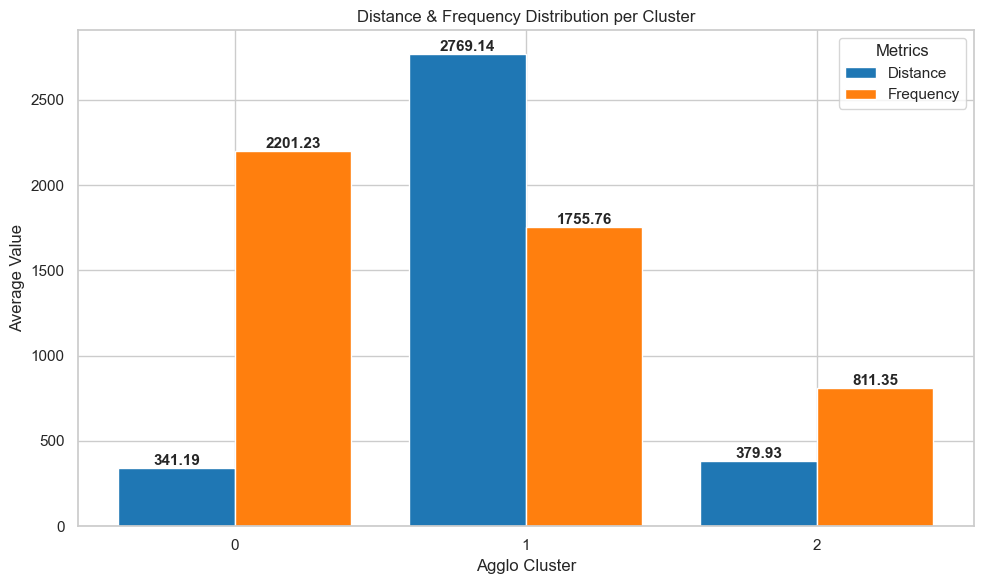

In [154]:
# Calculate mean values for Distance and Frequency per cluster
cluster_means = df.groupby("Agglo_Cluster")[["distance", "Frequency"]].mean().reset_index()

# Define custom color palette
cluster_colors = ["#1f77b4", "#ff7f0e"]  # Blue for Distance, Orange for Frequency

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set width for bars
bar_width = 0.4  
x = np.arange(len(cluster_means["Agglo_Cluster"]))  # X positions

# Plot Distance bars
ax.bar(x - bar_width/2, cluster_means["distance"], width=bar_width, label="Distance", color=cluster_colors[0])

# Plot Frequency bars
ax.bar(x + bar_width/2, cluster_means["Frequency"], width=bar_width, label="Frequency", color=cluster_colors[1])

# Add labels on top of bars
for i in range(len(cluster_means)):
    ax.text(x[i] - bar_width/2, cluster_means["distance"][i], f"{cluster_means['distance'][i]:.2f}", ha='center', va='bottom', fontsize=11, fontweight="bold")
    ax.text(x[i] + bar_width/2, cluster_means["Frequency"][i], f"{cluster_means['Frequency'][i]:.2f}", ha='center', va='bottom', fontsize=11, fontweight="bold")

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(cluster_means["Agglo_Cluster"])  # Cluster labels
ax.set_xlabel("Agglo Cluster")
ax.set_ylabel("Average Value")
ax.set_title("Distance & Frequency Distribution per Cluster")
ax.legend(title="Metrics")  # Add legend

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

<div style="text-align: justify;">
Plot given above illustrates the average values of Distance and Frequency in the three clusters. Cluster 1 stands out with the highest average distance (2769.14 meters), indicating that it represents data points located further away from the measurement source or cell towers. In contrast, Cluster 0 is characterized by the highest average frequency (2201.23 MHz) but the lowest distance (341.19 meters). Cluster 2 shows relatively balanced values with moderate averages in both metrics. These differences support the idea that clustering effectively captures the different spatial and spectral utilization patterns in the dataset.
</div>


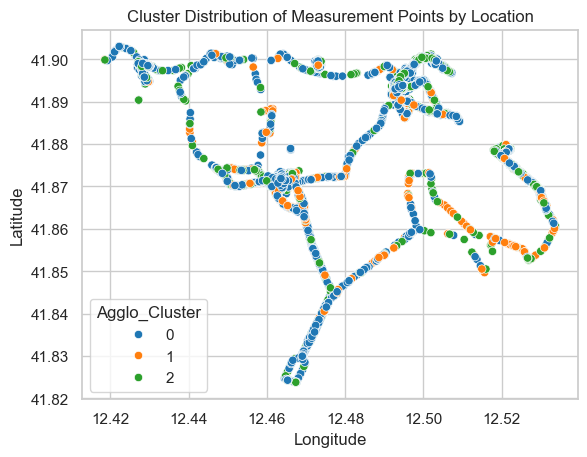

In [156]:
# Scatter plot of measurement points based on geographic location
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Agglo_Cluster', palette='tab10')

plt.title("Cluster Distribution of Measurement Points by Location")  # Set plot title
plt.show()  # Display the plot

<a id="43-clustering-comparison"></a> 
### 4.3 Clustering Models' Comparison

In [158]:
df[numeric_cols + ["Agglo_Cluster", "KMeans_Cluster"]].groupby(['Agglo_Cluster', 'KMeans_Cluster']).mean(numeric_only=True)

Latitude  Longitude   Altitude      Speed  \
Agglo_Cluster KMeans_Cluster                                               
0             1               41.884341  12.485904  70.847572   4.552269   
1             1               41.874821  12.482992  57.475276  11.028976   
              2               41.877298  12.484683  65.488229   5.701742   
2             0               41.883420  12.486607  71.669401   5.123059   

                                Frequency      Power      SINR        RSRP  \
Agglo_Cluster KMeans_Cluster                                                 
0             1               2201.225561 -76.306456  1.137122 -100.353045   
1             1               1895.476378 -93.345433 -1.166122 -117.887441   
              2               1738.201682 -89.018939 -0.237862 -113.266769   
2             0                811.353012 -66.693135 -0.074406  -89.616002   

                                   RSRQ  cellLongitude  cellLatitude  \
Agglo_Cluster KMeans_Cluster                                           
0             1              -20.184416      12.486181     41.884865   
1             1              -22.223031      12.478979     41.870120   
              2              -21.578011      12.485781     41.867788   
2             0              -19.881291      12.487047     41.883997   

                              cellPosErrorLambda1  cellPosErrorLambda2  \
Agglo_Cluster KMeans_Cluster                                             
0             1                         14.860776            14.655381   
1             1                         21.278473            21.027530   
              2                         10.040455             9.685056   
2             0                          6.978375             6.717572   

                              n_CellIdentities     distance       Band  \
Agglo_Cluster KMeans_Cluster                                             
0             1                       7.629636   341.193415   4.003550   
1             1                       6.472441  1387.506766   3.251969   
              2                       7.413162  2942.785839   5.064325   
2             0                       7.958225   379.932160  20.000000   

                                 minute       hour        day     month  \
Agglo_Cluster KMeans_Cluster                                              
0             1               28.909334  12.802119  16.738107  8.142280   
1             1               25.716535  14.350394  17.389764  7.496063   
              2               28.875309  13.251361  15.586838  8.021277   
2             0               29.205938  12.641982  16.280338  7.824443   

                              day_of_week         year  
Agglo_Cluster KMeans_Cluster                            
0             1                  2.039161  2020.350702  
1             1                  1.641732  2020.409449  
              2                  2.187036  2020.361702  
2             0                  2.120145  2020.379596

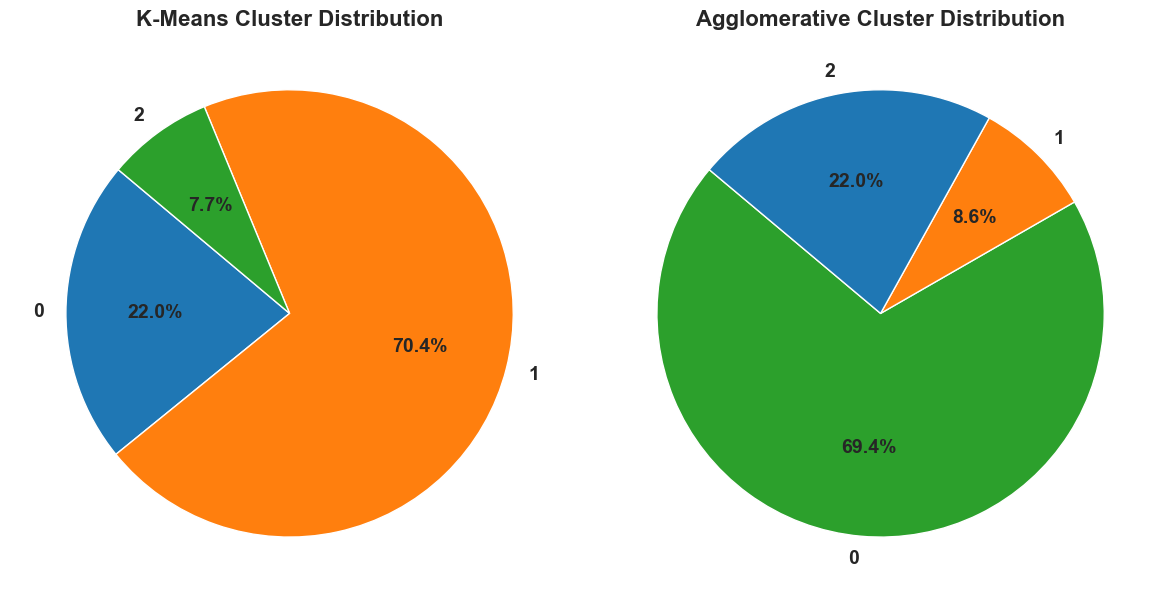

In [159]:
# Count the number of occurrences for each cluster in K-Means and Agglomerative clustering
kmeans_counts = pd.Series(cluster_labels).value_counts().sort_index()
agglo_counts = pd.Series(agg_labels).value_counts().sort_index()

# Define color palettes for clusters to ensure visual differentiation
kmeans_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, orange, and green for K-Means
agglo_colors = ["#2ca02c", "#ff7f0e", "#1f77b4"]  # Green, orange, and blue for Agglomerative

# Create a figure with two subplots to visually compare cluster distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Two plots in one row for easy side-by-side comparison

# Plot the pie chart for K-Means clustering distribution
axes[0].pie(kmeans_counts, labels=kmeans_counts.index, autopct=lambda p: f"{p:.1f}%", 
            colors=kmeans_colors, startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title("K-Means Cluster Distribution", fontsize=16, fontweight="bold")  # Set the title for better readability

# Plot the pie chart for Agglomerative clustering distribution
axes[1].pie(agglo_counts, labels=agglo_counts.index, autopct=lambda p: f"{p:.1f}%", 
            colors=agglo_colors, startangle=140, textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[1].set_title("Agglomerative Cluster Distribution", fontsize=16, fontweight="bold")  # Consistent title formatting

# Adjust layout to ensure plots don't overlap and have proper spacing
plt.tight_layout()

# Show the plots
plt.show()

<div style="text-align: justify;">
The pie charts given above illustrates a comparison of cluster sizes generated by the K-Means and Agglomerative algorithms. Although both methods include 3 clusters, the distribution of data points across clusters differs significantly. For instance, K-Means generated a dominant cluster at label 1, while Agglomerative clustering concentrated more points at label 0. Moreover, the Silhouette Scores for both clustering methods are 0.62. 
</div>


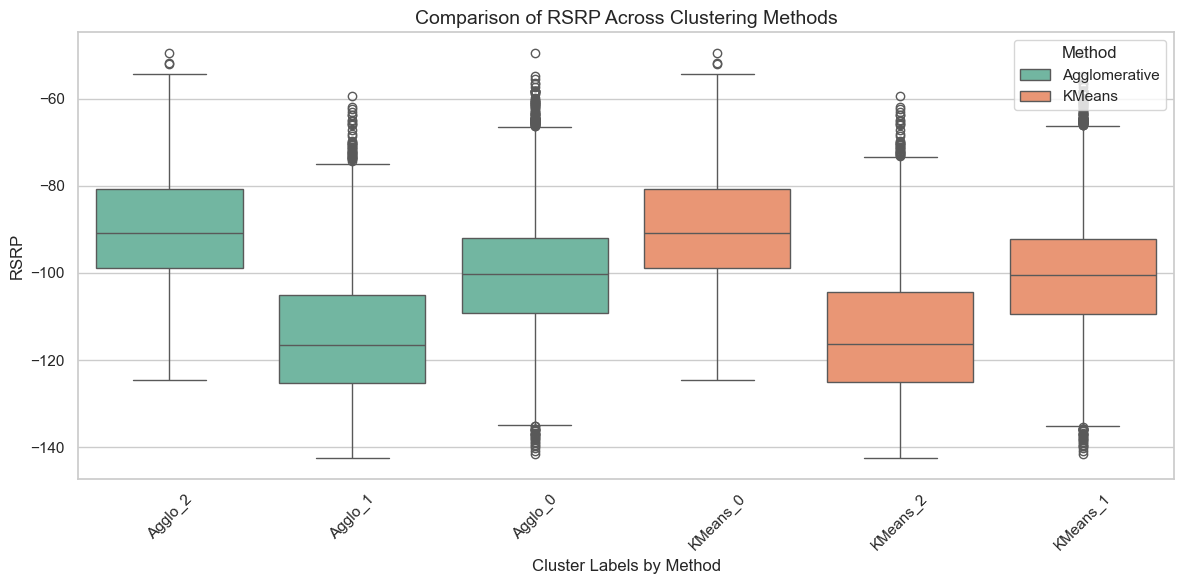

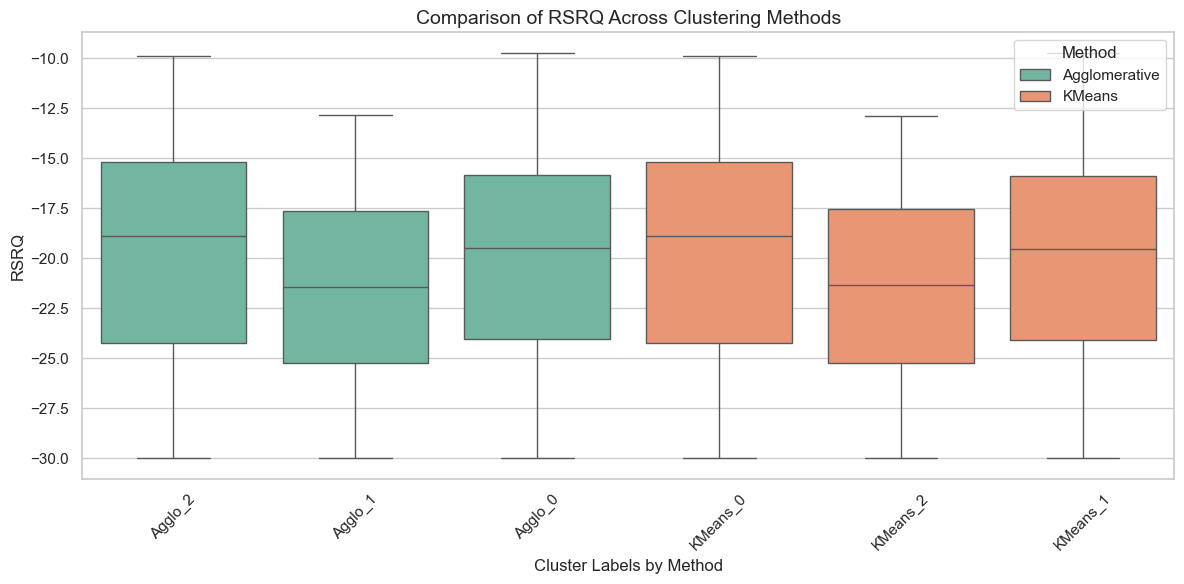

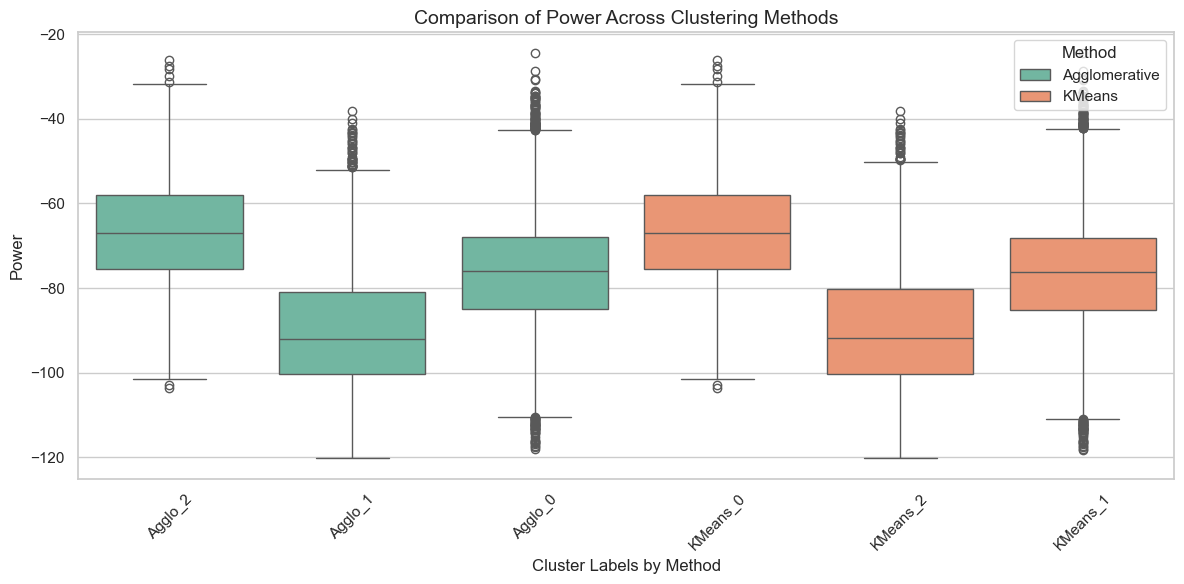

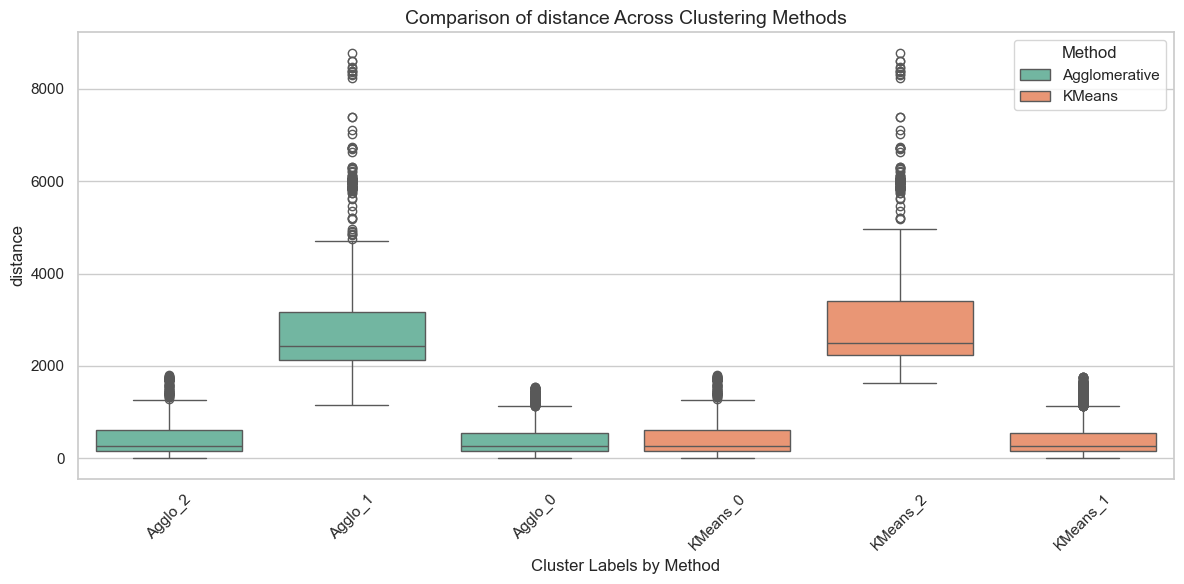

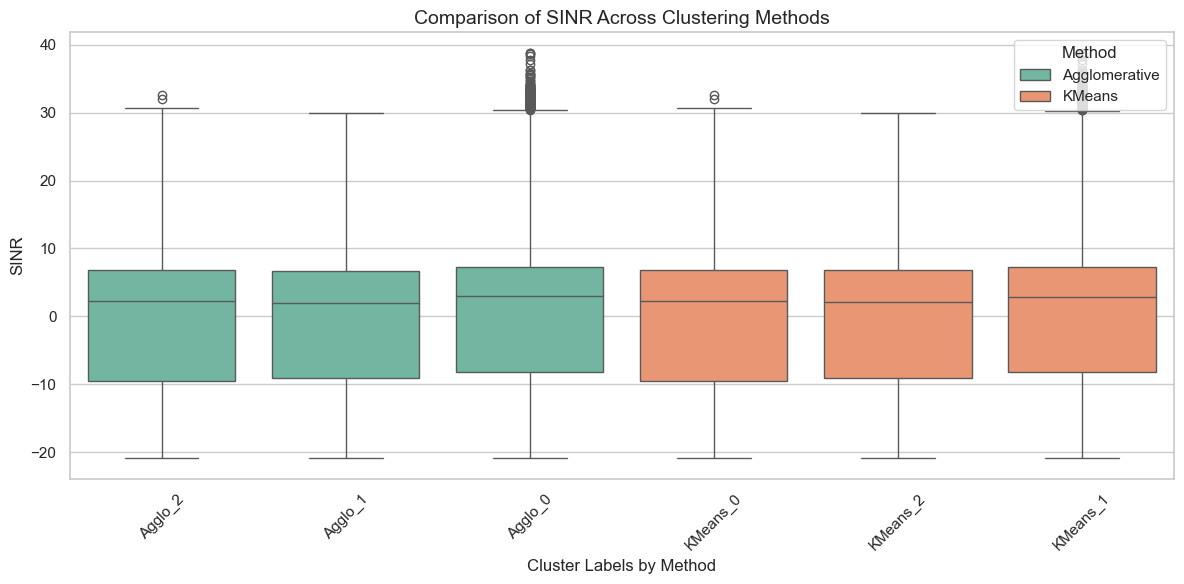

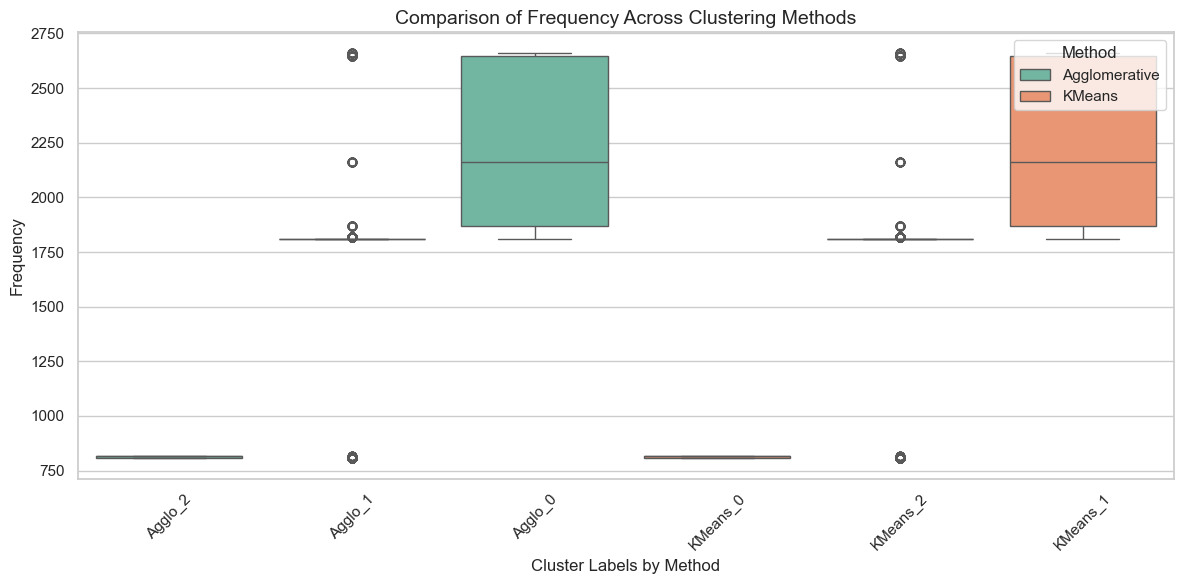

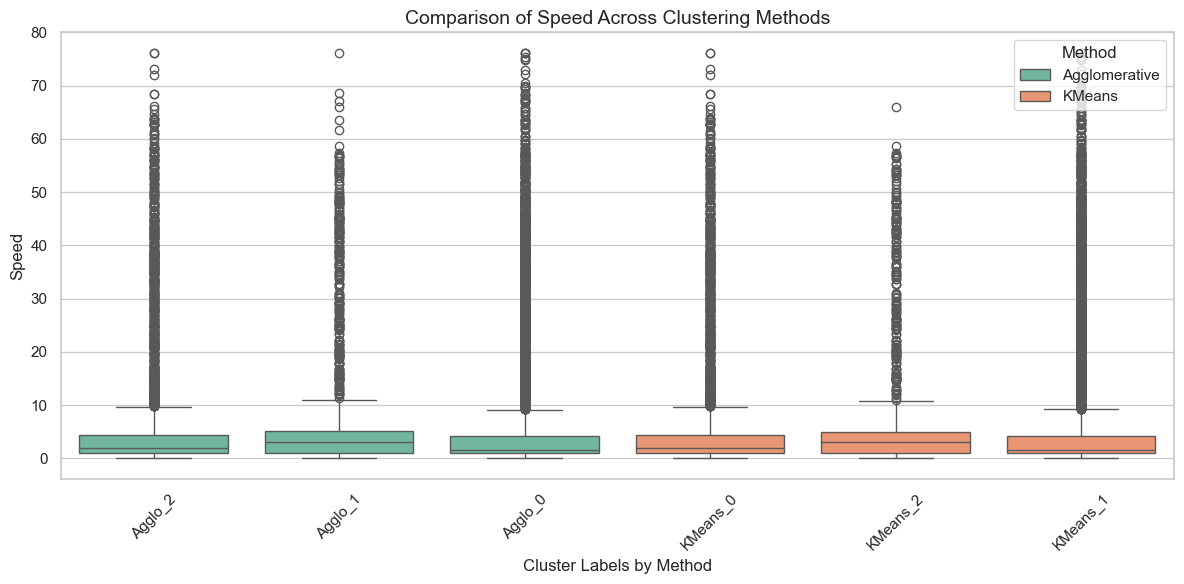

In [161]:
# Define the features to compare across clustering methods
features = ['RSRP', 'RSRQ', 'Power', 'distance', 'SINR', 'Frequency', 'Speed']

# Convert cluster labels to string type for plotting
df['Agglo_Cluster'] = df['Agglo_Cluster'].astype(str)
df['KMeans_Cluster'] = df['KMeans_Cluster'].astype(str)

# Loop through each feature for plotting
for feature in features:
    # Prepare Agglomerative clustering data
    df_agglo = df[[feature, 'Agglo_Cluster']].copy()
    df_agglo['Cluster_Label'] = 'Agglo_' + df_agglo['Agglo_Cluster']
    df_agglo['Method'] = 'Agglomerative'

    # Prepare KMeans clustering data
    df_kmeans = df[[feature, 'KMeans_Cluster']].copy()
    df_kmeans['Cluster_Label'] = 'KMeans_' + df_kmeans['KMeans_Cluster']
    df_kmeans['Method'] = 'KMeans'

    # Rename feature column to unify
    df_agglo.rename(columns={feature: 'Value'}, inplace=True)
    df_kmeans.rename(columns={feature: 'Value'}, inplace=True)

    # Combine both datasets
    combined_df = pd.concat([df_agglo, df_kmeans], axis=0)

    # Plot using seaborn boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_df, x='Cluster_Label', y='Value', hue='Method', palette='Set2')

    # Title and labels
    plt.title(f'Comparison of {feature} Across Clustering Methods', fontsize=14)
    plt.xlabel('Cluster Labels by Method')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title='Method', loc='upper right')
    plt.tight_layout()
    plt.show()


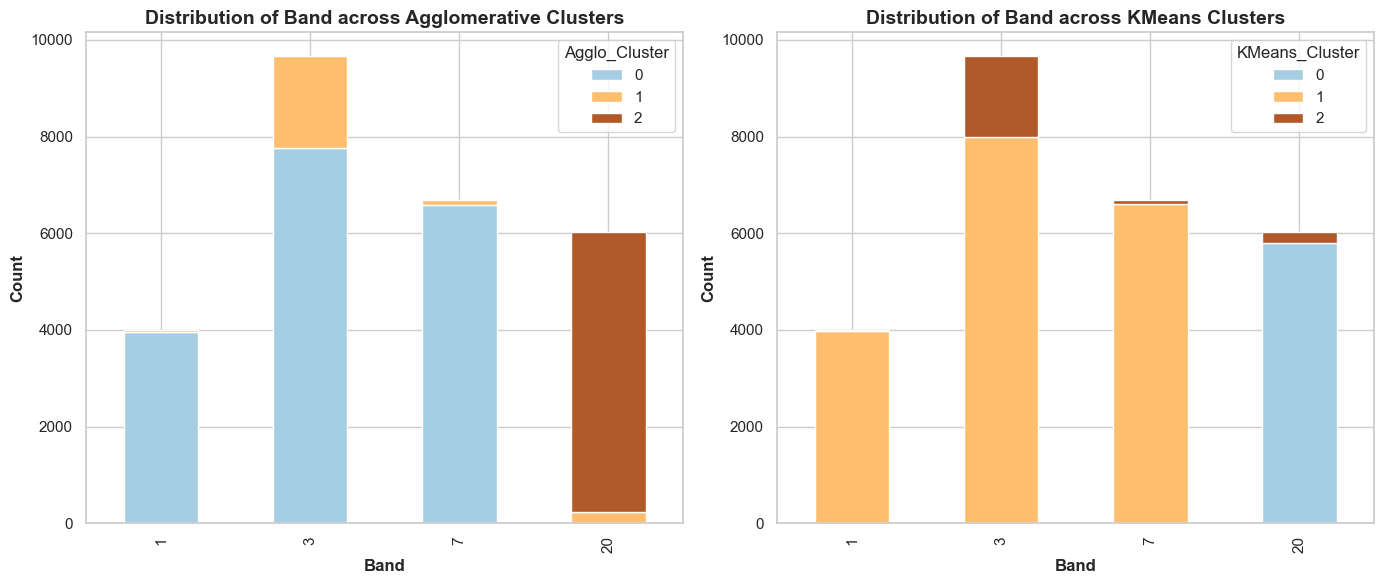

In [162]:
# Create cross-tab of Band frequency per cluster type
band_counts = pd.crosstab(df['Band'], df['Agglo_Cluster'])
band_counts_kmeans = pd.crosstab(df['Band'], df['KMeans_Cluster'])

# Create side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Agglomerative clustering
band_counts.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[0])
axes[0].set_title("Distribution of Band across Agglomerative Clusters", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Band", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Count", fontsize=12, fontweight="bold")
axes[0].legend(title="Agglo_Cluster")

# Plot KMeans clustering
band_counts_kmeans.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[1])
axes[1].set_title("Distribution of Band across KMeans Clusters", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Band", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Count", fontsize=12, fontweight="bold")
axes[1].legend(title="KMeans_Cluster")

plt.tight_layout()  # Optimize spacing
plt.show()  # Display plots

<div style="text-align: justify;">
The bar charts given above indicate how different frequency bands are distributed among the clusters identified by the Agglomerative and K-Means algorithms. The clustering distributions are different on a per-cluster basis. For example, Agglomerative clustering shows a stronger dominance of Band 20 in Cluster 2, while K-Means clustering assigns most of the Band 20 data to Cluster 0.
</div>


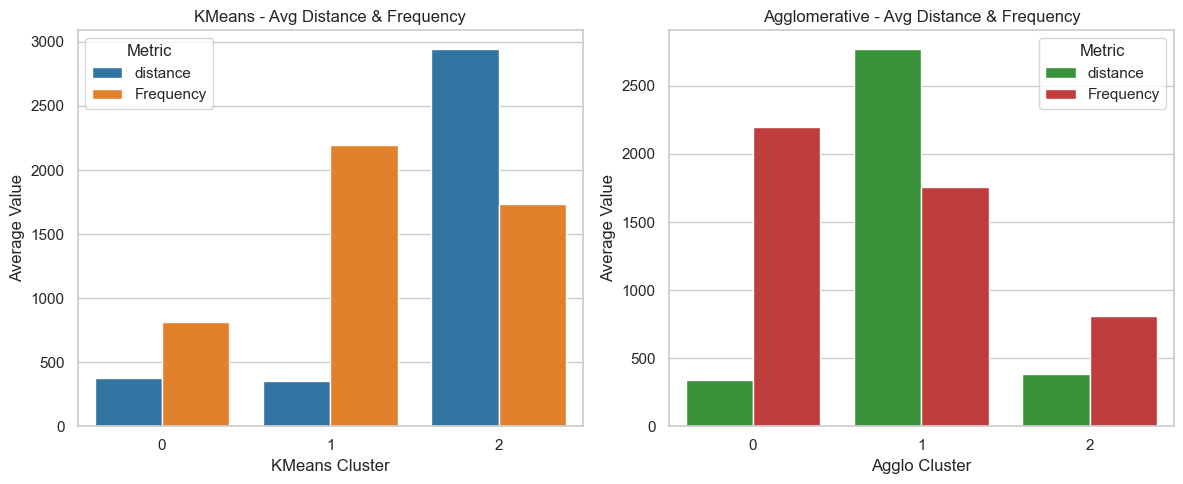

In [164]:
# Grouping data by KMeans clusters and calculating the mean of distance and frequency
kmeans_grouped = df.groupby('KMeans_Cluster')[['distance', 'Frequency']].mean().reset_index()

# Reshaping the data for better visualization (melting columns into a long-format structure)
kmeans_grouped = pd.melt(kmeans_grouped, id_vars='KMeans_Cluster', 
                         var_name='Metric', value_name='AvgValue')

# Similarly, grouping data by Agglomerative clusters and computing average distance and frequency
agglo_grouped = df.groupby('Agglo_Cluster')[['distance', 'Frequency']].mean().reset_index()

# Melting the dataframe to prepare it for visualization
agglo_grouped = pd.melt(agglo_grouped, id_vars='Agglo_Cluster', 
                        var_name='Metric', value_name='AvgValue')

# Define color palettes for visual differentiation
kmeans_palette = ["#1f77b4", "#ff7f0e"]  # Blue and orange for KMeans cluster metrics
agglo_palette = ["#2ca02c", "#d62728"]  # Green and red for Agglomerative cluster metrics

# Creating a figure with two subplots to compare clustering results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Arrange plots side by side

# Plot for KMeans clustering results
sns.barplot(ax=axes[0], data=kmeans_grouped, x='KMeans_Cluster', y='AvgValue', hue='Metric', palette=kmeans_palette)
axes[0].set_title('KMeans - Avg Distance & Frequency')  # Setting title for clarity
axes[0].set_xlabel('KMeans Cluster')  # Labeling the x-axis
axes[0].set_ylabel('Average Value')  # Labeling the y-axis

# Plot for Agglomerative clustering results
sns.barplot(ax=axes[1], data=agglo_grouped, x='Agglo_Cluster', y='AvgValue', hue='Metric', palette=agglo_palette)
axes[1].set_title('Agglomerative - Avg Distance & Frequency')  # Providing an informative title
axes[1].set_xlabel('Agglo Cluster')  # Labeling the x-axis
axes[1].set_ylabel('Average Value')  # Consistent labeling with the KMeans plot

# Adjust layout for better spacing and readability
plt.tight_layout()

# Display the plots
plt.show()

<div style="text-align: justify;">
The figure above illustrates differences in average distance and frequency for each cluster generated by K-Means and Agglomerative clustering. For example, Cluster 2 exhibits the highest average distance about 3000 meter in the K-Means model. This occurs in Cluster 1 of the Agglomerative model. These patterns highlight how each algorithm partitions the data differently in terms of distribution and density. 
</div>


<a id="5-classification-task-3"></a> 
# 5. Classification (Task 3)


<div style="text-align: justify;">For the binary classification task, the feature MNC (Mobile Network Code) was selected as the target variable. This variable includes the network operator identifier and is quite suitable for binary classification due to its two distinct categories. Moreover, the class distribution is relatively balanced. “Op2" accounts for about 53.9% of the samples, while “Op1" represents 46.0%, which helps overcome the class imbalance issues during training. For the multi-class classification task, the scenario variable was selected as the target. This feature divides the measurement context into three categories: Outdoor Walking (OW), Indoor Stationary (IS), and Outdoor Driving (OD). These are important for modelling the changes in network performance in different real-world mobility scenarios. Moreover, the distribution of this variable is sufficiently diverse; OW is 43%, IS is 41% and OD is 16%, which makes it suitable for robust multi-class classification.

</div>


<a id="51-binary-classification"></a> 
### 5.1. Binary Classification

#### RandomForest Classifier

In [170]:
df=df_cla.copy()  # using 100% of the dataset
del df_cla

In [171]:
X = df[numeric_cols + categorical_cols].drop(columns=['MNC','CellIdentity','eNodeB.ID','EARFCN']) # dropping target columns and the columns which showed high correlation with target column
y = df["MNC"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # train and test data split

In [173]:
#  Train the model
rf_model = RandomForestClassifier(
    max_depth=2,             
    random_state=42,
    n_jobs=-1                 
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=42)

In [174]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [175]:
# Accuracy and F1 score
acc = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='binary')  
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8904
F1 Score: 0.9016


<div style="text-align: justify;">In this step the max_depth parameter was limited to reduce overfitting risk and the remaining hyperparameters were kept at default values. This approach provided a balance between model complexity and generalizability. After training the model, the results were visualized.
As shown i nfigurebelow1, the confusion matrix highlights the strong performance of the model with 0.89 accuracy and 0.90 F1 score. These metrics indicate that the model is well balanced not only in accuracy metric but also in terms of precision and recall. The relatively low number of false positives and false negatives further supports its reliability in correctly classifying both classe


</div>


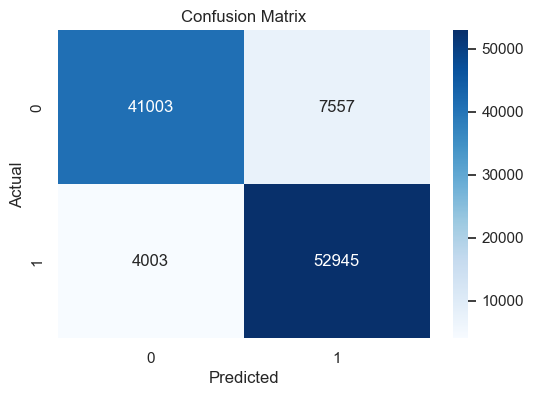

In [177]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [178]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.84      0.88     48560
           1       0.88      0.93      0.90     56948

    accuracy                           0.89    105508
   macro avg       0.89      0.89      0.89    105508
weighted avg       0.89      0.89      0.89    105508



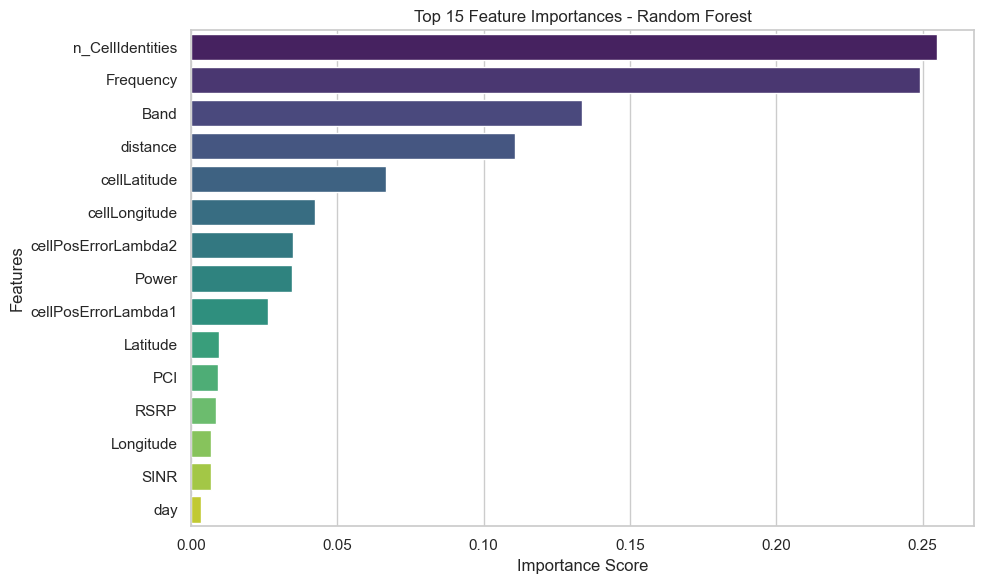

In [179]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


<div style="text-align: justify;">Figure given above illustrates the top 15 feature importances derived from the Random Forest classification model used in the binary classification task. The most significant feature is n_CellIdentities, followed closely by Frequency and Band. This indicates their critical role in model decision-making. Features such as distance, cellLatitude, and cellLongitude also contribute significantly to the classification outcome. In contrast, variables like day, SINR, and Longitude appear to have minimal impact. These ranking highlights which input variables are most informative for model.

</div>


<div style="text-align: justify;">
In this study, SHAP (SHapley Additive exPlanations) analysis was employed as an additional method for interpreting the Random Forest binary classification model. SHAP assigns each feature an importance value for a particular prediction, offering both global and local interpretability. By quantifying the contribution of each feature to the model's output, SHAP provides a nuanced understanding of feature impacts beyond traditional importance metrics (Lundberg and Lee, 2017). 
</div>


SHAP Values Shape: (105508, 26, 2)
Corrected SHAP Shape: (105508, 26)


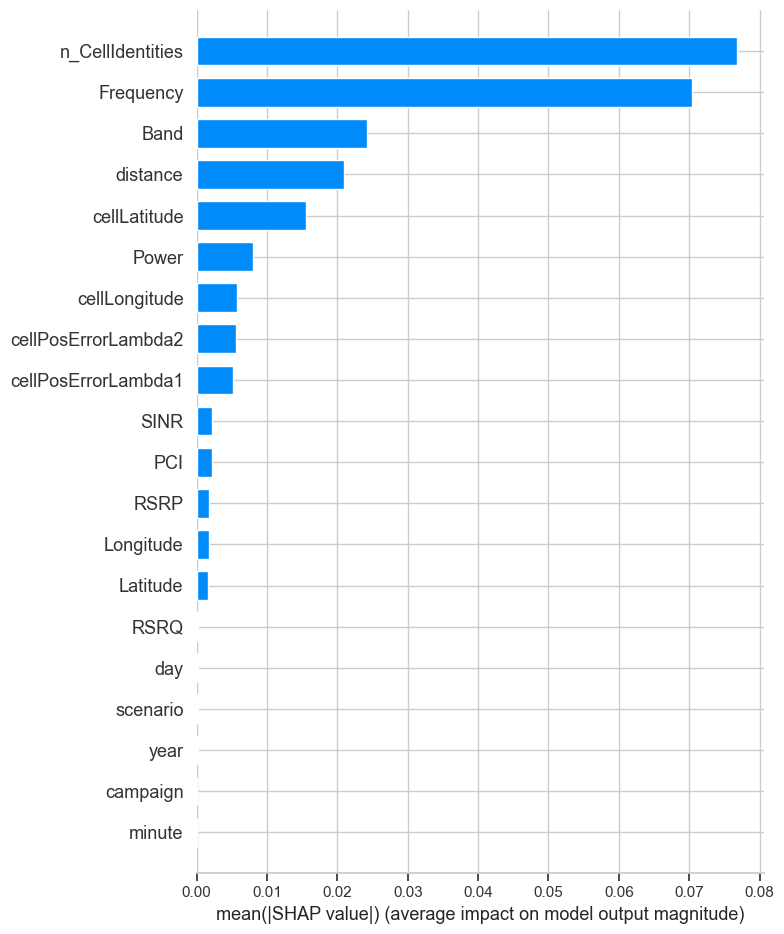

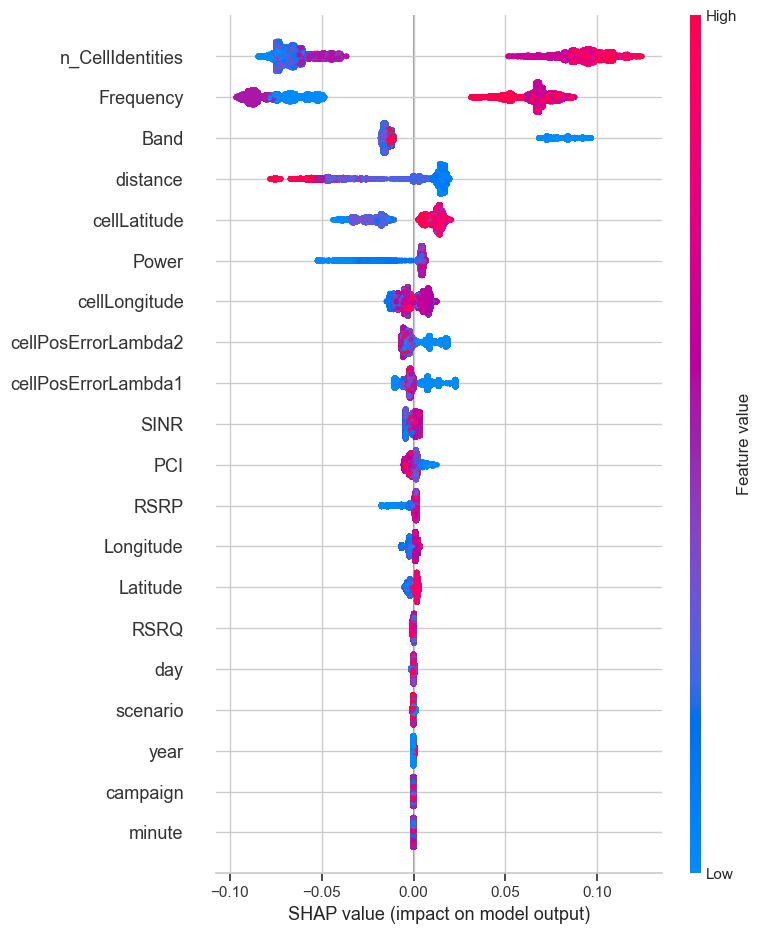

In [182]:
# SHAP Analysis - Explain model predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Check the shape of SHAP values
print("SHAP Values Shape:", np.array(shap_values).shape)

if isinstance(shap_values, list):  # If SHAP values are returned as a list
    shap_values_selected = shap_values[1]  # Take SHAP values for class "1"
else:  
    shap_values_selected = shap_values[:, :, 1]  # Extract SHAP values for class 1 from a multi-dimensional array

# Verify the corrected shape
print("Corrected SHAP Shape:", shap_values_selected.shape)

# If the shape does not match the expected format, reshape the values
if shap_values_selected.shape[1] != X_test.shape[1]:  
    shap_values_selected = shap_values_selected.reshape(X_test.shape)

# Generate summary plot (Bar format) - Shows feature importance
shap.summary_plot(shap_values_selected, X_test, plot_type="bar")

# Generate full summary plot - Shows feature impact on predictions
shap.summary_plot(shap_values_selected, X_test)

<div style="text-align: justify;">
The figure given above presents the SHAP value summary plot for the Random Forest binary classification model, providing insight into each feature's impact on model predictions. The plot highlights that n_CellIdentities, Frequency, and Band are the most influential features, with higher SHAP values indicating a stronger effect on the prediction output. The colour gradient represents the feature value, where red denotes high values and blue denotes low values. Notably, high values of Frequency tend to push the prediction towards one class, while low values of distance and cellLatitude are associated with a shift toward the other class.
</div>


### Logistic Regression Classfication

In [185]:
# Initialize and train the Logistic Regression model
# - Set random_state for reproducibility
# - Increase max_iter to ensure convergence
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [186]:
# Make predictions on the test set
y_pred_lr = log_model.predict(X_test)

In [187]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_lr))  # Prints overall accuracy
print("Classification Report:\n", classification_report(y_test, y_pred_lr))  # Precision, recall, F1-score per class

Accuracy: 0.8465613981878152
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     48560
           1       0.86      0.85      0.86     56948

    accuracy                           0.85    105508
   macro avg       0.85      0.85      0.85    105508
weighted avg       0.85      0.85      0.85    105508



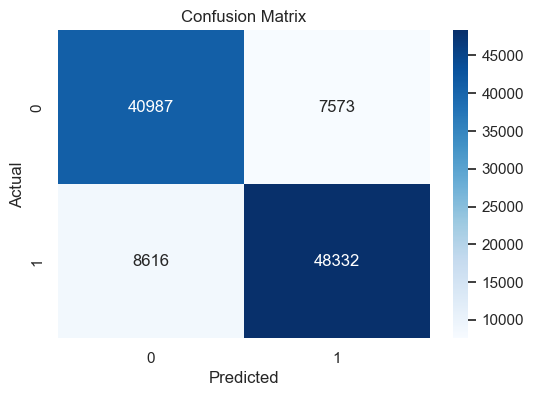

In [188]:
# Confusion Matrix visualization to analyze misclassifications
cm = confusion_matrix(y_test, y_pred_lr)  # Generate confusion matrix
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create heatmap 
plt.xlabel("Predicted")  # Label x-axis
plt.ylabel("Actual")  # Label y-axis
plt.title("Confusion Matrix")  # Set plot title
plt.show()

<div style="text-align: justify;">
The confusion matrix shows that the model correctly predicted 40,987 class 0 instances and 48,332 class 1 instances. Meanwhile, 7,573 false positives and 8,616 false negatives were recorded. These results indicate a well-performing classifier with a good balance between precision and recall. Moreover, Logistic Regression was a successful model with an accuracy result of 0.85.
</div>


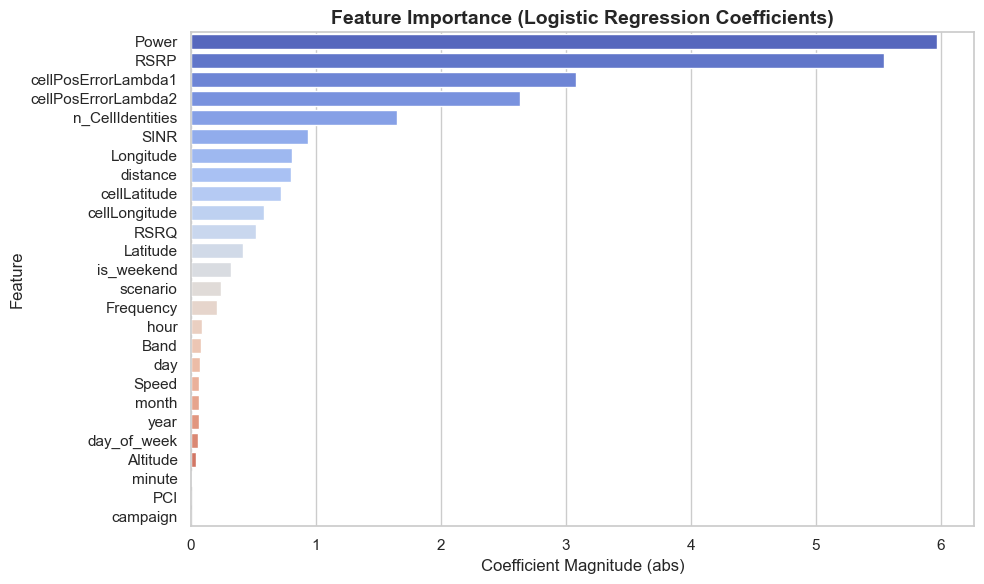

In [190]:
# Feature Importance (Coefficient-Based)
# - Logistic Regression coefficients represent the importance of features
# - Higher absolute values indicate stronger influence on predictions
coefficients = log_model.coef_[0]  # Extract coefficients (for binary classification)
feature_names = X_train.columns  # Get feature names

# Create a DataFrame to store feature importance
coef_df = pd.DataFrame({
    'Feature': feature_names,  # Feature names
    'Coefficient': coefficients,  # Raw coefficients
    'Importance': np.abs(coefficients)  # Absolute magnitude for importance ranking
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# Visualizing feature importance using a bar plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x='Importance', y='Feature', data=coef_df, palette='coolwarm')  
plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize=14, fontweight='bold') 
plt.xlabel("Coefficient Magnitude (abs)", fontsize=12)  
plt.ylabel("Feature", fontsize=12)  
plt.tight_layout()  
plt.show()

<div style="text-align: justify;">
The plot given above presents the feature importance values based on the absolute magnitude of the coefficients obtained from the Logistic Regression model applied to the binary classification task. Among all the features, Power and RSRP showed the highest importance. This indicated that signal strength features are the main determinants in the classification decision process. They are followed by cellPosErrorLambda1, cellPosErrorLambda2 and n_CellIdentities, which show the cell identity and error amounts, which are clearly effective factors in predicting the target class. Moderately important features include SINR, Longitude and Distance. This showed that signal quality and location information are still important for algorithm.

</div>


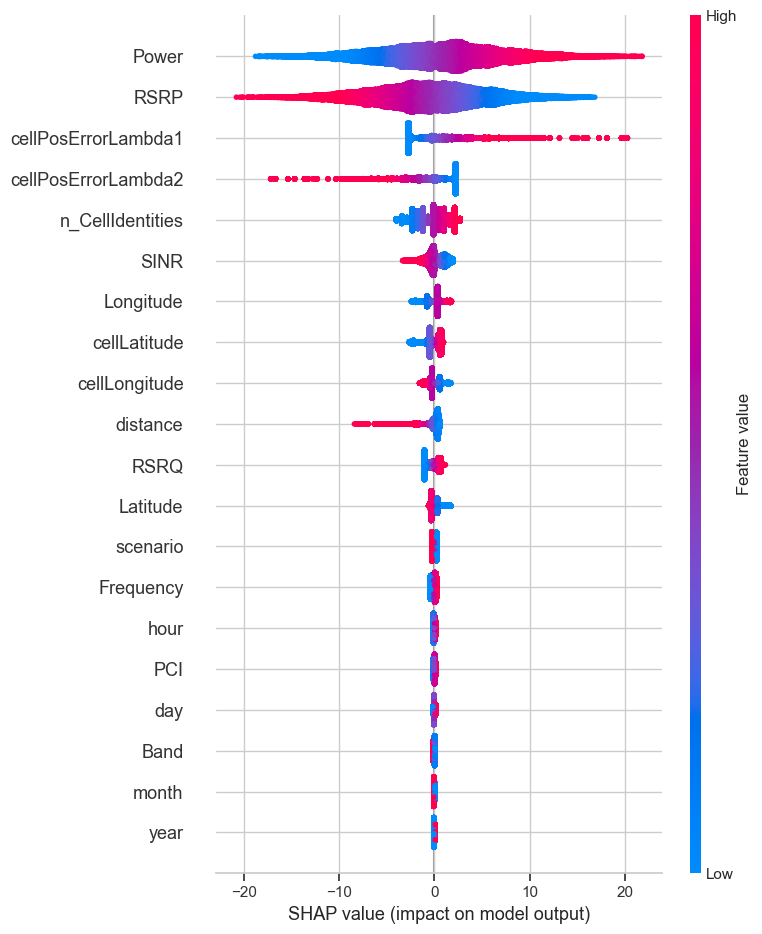

In [192]:
# SHAP explainer
explainer = shap.LinearExplainer(log_model, X_train, feature_perturbation="interventional")

# calculate SHAP values 
shap_values = explainer.shap_values(X_test)

# summary plot: effect of the features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


<div style="text-align: justify;">
The plot given above indicates the SHAP value summary plot for the Logistic Regression model used in the binary classification task. This visualization provides both the magnitude and direction of the contribution of each feature to the model's predictions. To begin with, Power and RSRP are the most influential features and consistently affect the model output positively or negatively depending on their values. For instance, high Power values generally lead to a positive SHAP value indicating an increased probability of a particular class, while low values contribute negatively. Similarly, cellPosErrorLambda1, cellPosErrorLambda2, and n_CellIdentities also show a significant effect. This suggests that cell location error margins are important variables.

</div>


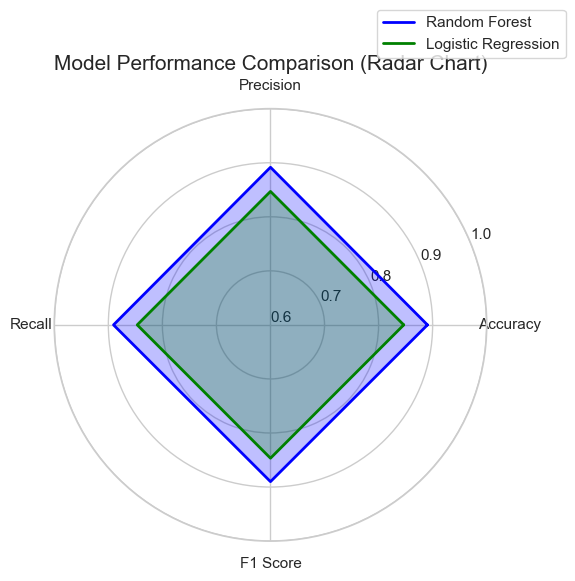

In [194]:
# Evaluate metrics
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted')
]

lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr, average='weighted'),
    recall_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, y_pred_lr, average='weighted')
]

# Labels and angles
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_vars = len(labels)

# Close the plot by repeating the first value
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the radar chart

rf_scores += [rf_scores[0]]
lr_scores += [lr_scores[0]]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plot each model
ax.plot(angles, rf_scores, color='blue', linewidth=2, label='Random Forest')
ax.fill(angles, rf_scores, color='blue', alpha=0.25)

ax.plot(angles, lr_scores, color='green', linewidth=2, label='Logistic Regression')
ax.fill(angles, lr_scores, color='green', alpha=0.25)

# Formatting
ax.set_title("Model Performance Comparison (Radar Chart)", fontsize=15)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_ylim(0.6, 1.0)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


<div style="text-align: justify;">
The radar chart presents a comparative visual of the models applied for binary classification. In the binary classification task, both Random Forest and Logistic Regression models showed strong performance, albeit with different strengths. Random Forest model achieved an accuracy of 0.89. In contrast, Logistic Regression achieved an accuracy of 0.85, offering better interpretability thanks to the coefficient-based feature importance. Feature analysis revealed that signal-related variables such as RSRP and Power were consistently significant in both models. However, Random Forest made more use of categorical features such as n_CellIdentities and Band. Overall, Random Forest was more accurate. Also, Logistic Regression provided clearer insights into feature effects.

</div>


<a id="52-multi-class-classification"></a> 
### 5.2. Multi-Class Classification

In [197]:
X = df[categorical_cols + numeric_cols].drop(columns=["scenario","campaign"]) # dropping target columns and the columns which showed high correlation with target column
y = df[categorical_cols + numeric_cols]["scenario"]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y,  shuffle=True) # train and test data splitting


In [199]:
#  Train the model
rf_model = RandomForestClassifier(
    max_depth=5,             
    random_state=42,
    n_jobs=-1                 #
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [200]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [201]:
# Accuracy and F1 score
acc = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='macro')  # Using 'macro'  for multi-class
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9067
F1 Score: 0.9109


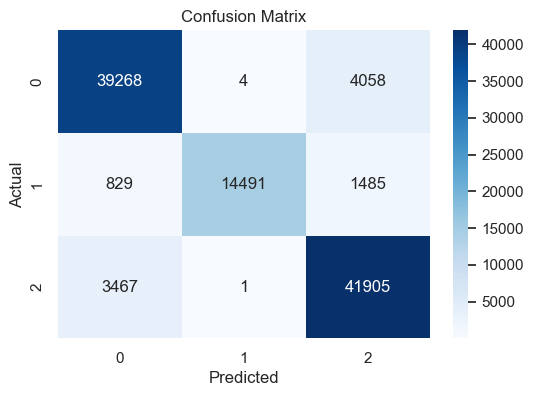

In [202]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<div style="text-align: justify;">
The confusion matrix reveals that the model correctly predicted 39,268 class 0 instances, 14,491 class 1 instances, and 41,905 class 2 instances. However, the model misclassified 4,058 class 0 instances, 1,485 class 1 instances, and 3,467 class 2 instances. Besides, 829 class 1 instances were incorrectly classified as class 0, while 4 class 0 and 1 class 2 instance were predicted as class 1. These results show that the Random Forest model exhibits a strong ability to generalize across multiple classes with minimal misclassification. The classifier achieved an overall F1 Score of 0.91, further validating its robustness and reliability for multi-class prediction tasks.
</div>


In [204]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     43330
           1       1.00      0.86      0.93     16805
           2       0.88      0.92      0.90     45373

    accuracy                           0.91    105508
   macro avg       0.93      0.90      0.91    105508
weighted avg       0.91      0.91      0.91    105508



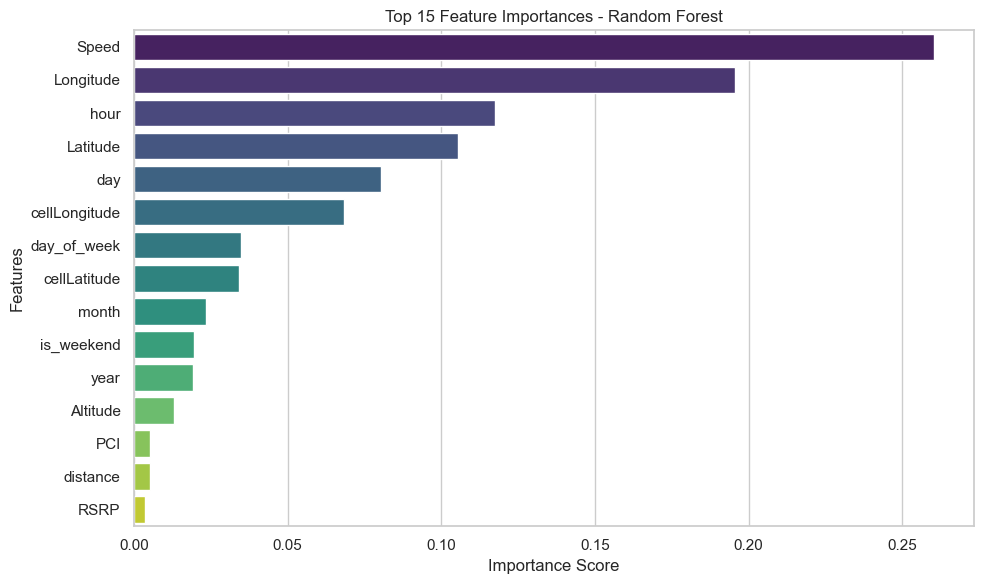

In [205]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


<div style="text-align: justify;">
The figure given above indicates the top 15 features used by the Random Forest model. Accordingly, it shows that Speed is the most effective factor in predicting the scenario variable, followed by Longitude, Time and Latitude. These top features indicate that user movement patterns and location play a significant role in determining whether a scenario is classified as indoor, outdoor or other types. Temporal features such as day and time, together with contextual indicators such as cellLongitude and is_weekend, contribute significantly to the model's decision-making process. This insight highlights how both mobility and spatiotemporal factors are strongly related to the network usage context. It also highlights how the classifier effectively distinguishes between different user environments.
</div>


SHAP Values Shape: (105508, 28, 3)
Corrected SHAP Shape: (105508, 28)


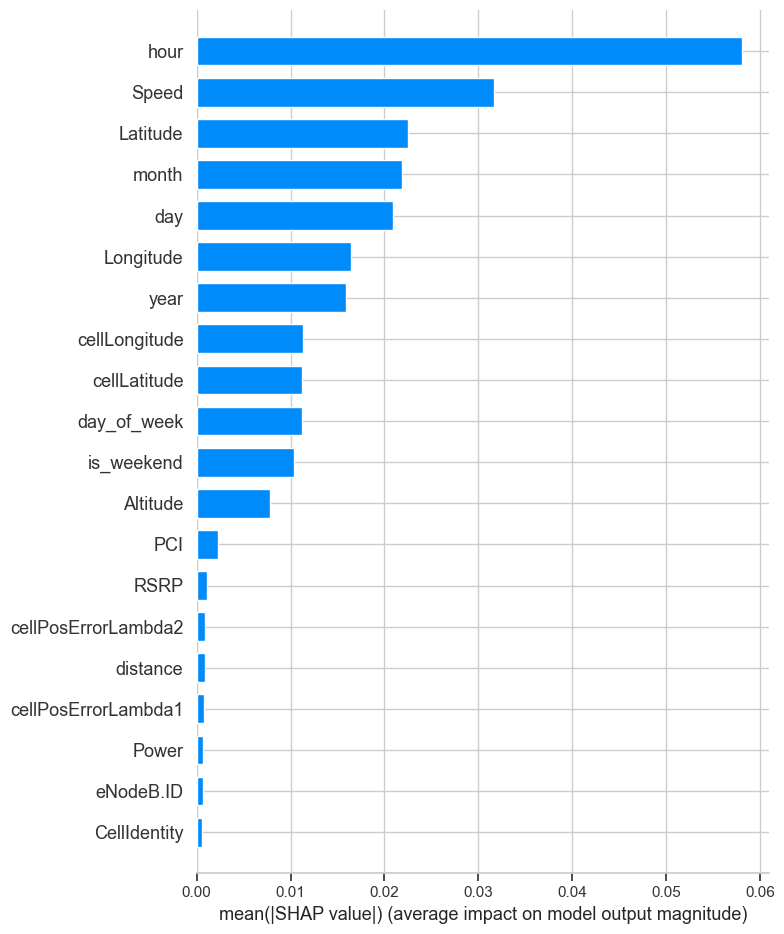

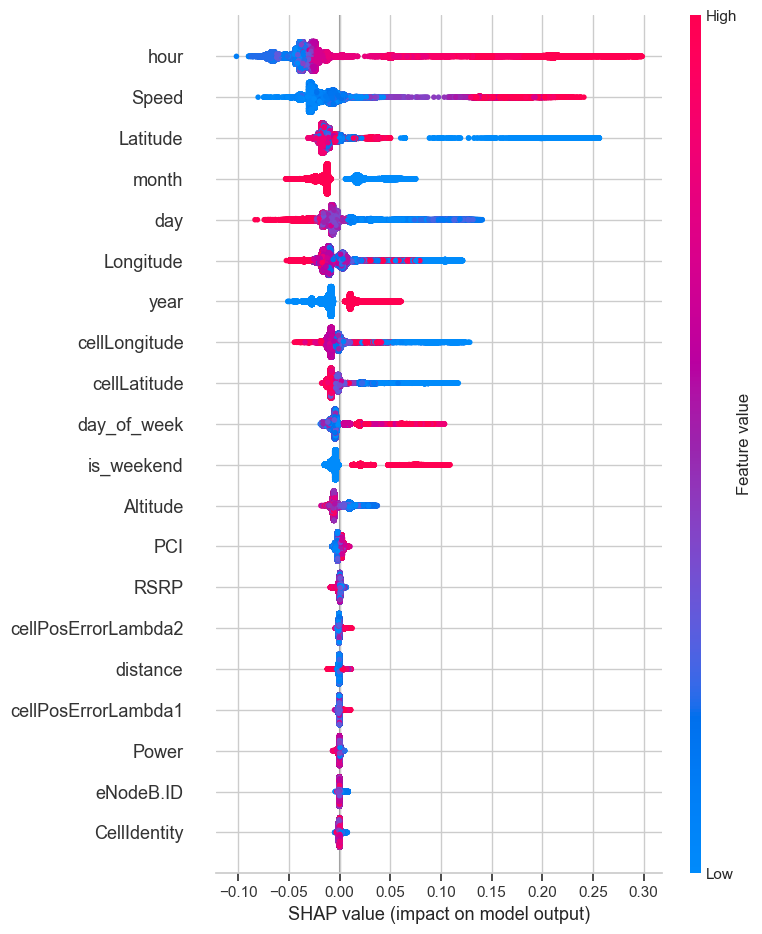

In [207]:
# SHAP Analysis - Explain model predictions using SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Check the shape of SHAP values
print("SHAP Values Shape:", np.array(shap_values).shape)

if isinstance(shap_values, list):  # If SHAP values are returned as a list
    shap_values_selected = shap_values[1]  # Take SHAP values for class "1"
else:  
    shap_values_selected = shap_values[:, :, 1]  # Extract SHAP values for class 1 from a multi-dimensional array

# Verify the corrected shape
print("Corrected SHAP Shape:", shap_values_selected.shape)

# If the shape does not match the expected format, reshape the values
if shap_values_selected.shape[1] != X_test.shape[1]:  
    shap_values_selected = shap_values_selected.reshape(X_test.shape)

# Generate summary plot (Bar format) - Shows feature importance
shap.summary_plot(shap_values_selected, X_test, plot_type="bar")

# Generate full summary plot - Shows feature impact on predictions
shap.summary_plot(shap_values_selected, X_test)

<div style="text-align: justify;">
The SHAP value plot provides a comprehensive interpretation of how individual features contribute to the classification of the Scenario variable. Features such as hour, speed, and latitude exhibit the highest SHAP values, indicating that they have a strong influence on the model's output. Higher speed values are associated with increased probability of outdoor scenarios, while lower values correspond to more static environments such as indoor scenario. Similarly, hour and day reflect the temporal dynamics that affect scenario classification, with certain time intervals showing distinct patterns of behaviour.

</div>


#### Logistic Regression Classification (Multinomial)

In [210]:
# Initialize and train the Logistic Regression model
# Set random_state for reproducibility
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [211]:
# Make predictions on the test set
y_pred_lr = log_model.predict(X_test)

In [212]:
# Accuracy and F1 score
acc = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr, average='macro')  # Using 'macro' for multi-class
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_lr))  # Precision, recall, F1-score per class

Accuracy: 0.8315
F1 Score: 0.8432
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82     43330
           1       0.90      0.88      0.89     16805
           2       0.85      0.80      0.82     45373

    accuracy                           0.83    105508
   macro avg       0.85      0.84      0.84    105508
weighted avg       0.83      0.83      0.83    105508



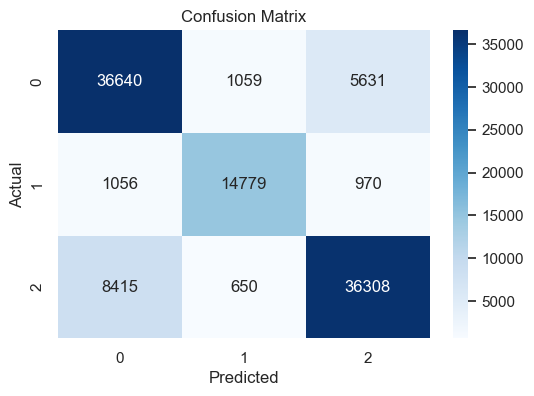

In [213]:
# Confusion Matrix visualization to analyze misclassifications
cm = confusion_matrix(y_test, y_pred_lr)  # Generate confusion matrix
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create heatmap
plt.xlabel("Predicted")  # Label x-axis
plt.ylabel("Actual")  # Label y-axis
plt.title("Confusion Matrix")  # Set plot title
plt.show()

<div style="text-align: justify;">
The confusion matrix presents the performance of the Logistic Regression model in a multi-class classification setting. The diagonal values (36,640 for class 0, 14,779 for class 1 and 36,308 for class 2) show the correctly classified examples for each class. Misclassifications can be seen in the off-diagonal cells with class 2 showing the highest confusion with class 0 (8,415 cases). As a result, the model shows successful performance with an F1 score of 0.84.
</div>


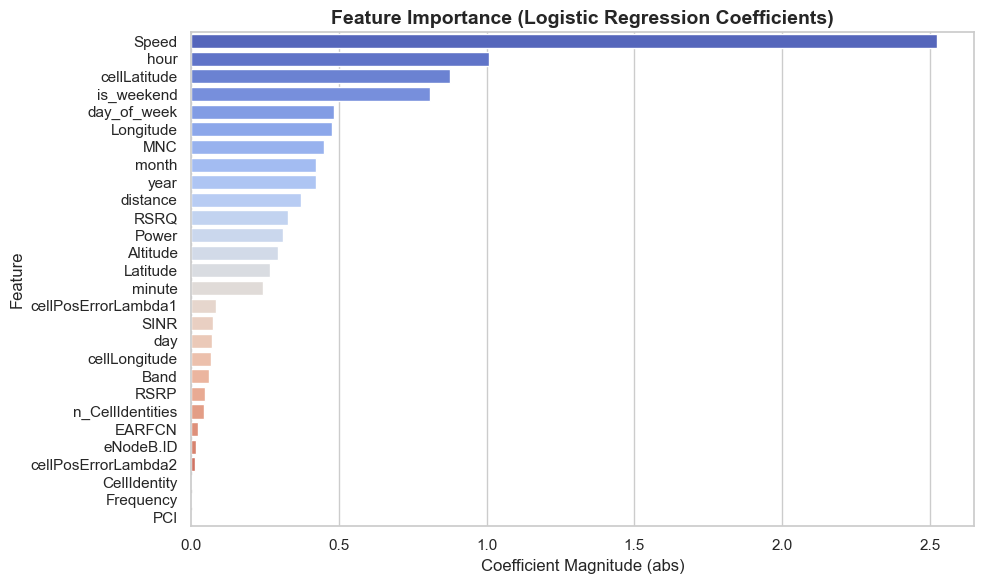

In [215]:
# Feature Importance (Coefficient-Based)
# - Logistic Regression coefficients represent the importance of features
# - Higher absolute values indicate stronger influence on predictions
coefficients = log_model.coef_[0]  # Extract coefficients (for binary classification)
feature_names = X_train.columns  # Get feature names

# Create a DataFrame to store feature importance
coef_df = pd.DataFrame({
    'Feature': feature_names,  # Feature names
    'Coefficient': coefficients,  # Raw coefficients
    'Importance': np.abs(coefficients)  # Absolute magnitude for importance ranking
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# Visualizing feature importance using a bar plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x='Importance', y='Feature', data=coef_df, palette='coolwarm') 
plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize=14, fontweight='bold')
plt.xlabel("Coefficient Magnitude (abs)", fontsize=12) 
plt.ylabel("Feature", fontsize=12)  
plt.tight_layout() 
plt.show()

<div style="text-align: justify;">
The figure given above shows the feature importance derived from the absolute magnitude of the coefficients in the Logistic Regression model used for multi-class classification. In scenario classification, the feature that the model finds most influential is Speed, followed by hour and cellLatitude, indicating that temporal and mobility related features play an important role in classification decisions. Features like PCI, Frequency and cellIdentity contribute to model minimally.

</div>


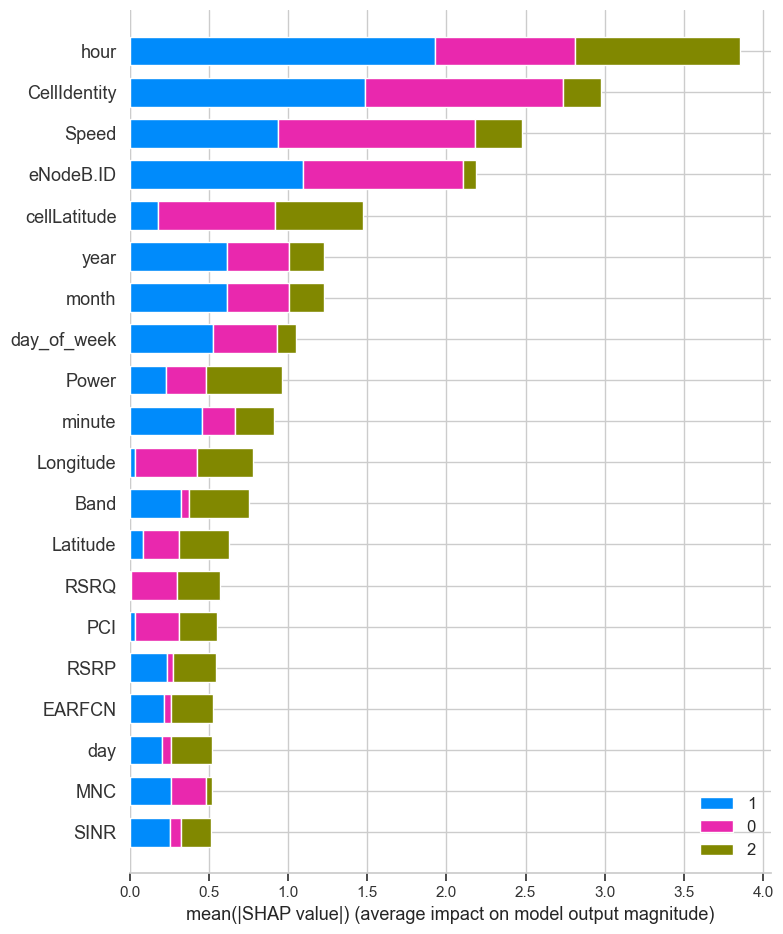

In [217]:
# KernelExplainer 
explainer = shap.Explainer(log_model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)

# SHAP Summary Plot 
shap.summary_plot(shap_values, X_test, class_names=log_model.classes_)


<div style="text-align: justify;">
Figure given above presents the SHAP value plot for the Logistic Regression model applied in the multi-class classification task. This visualization reveals the average impact of each feature on the model’s output, distinguishing their importance across all three classes. Notably, hour, CellIdentity, and Speed stand out as the most impactful variables, with distinct contributions for each class label (0, 1, and 2). The color-coded bars indicate how these features influence predictions differently depending on the target class, offering a deeper interpretability compared to standard coefficient-based feature importance.
</div>


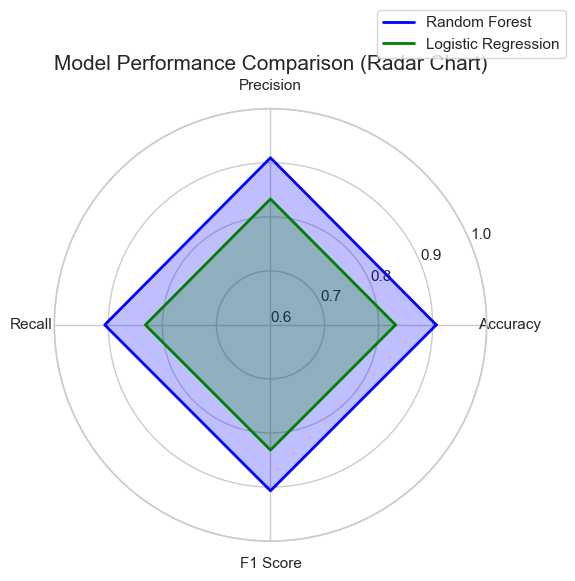

In [219]:
# Evaluate metrics
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted')
]

lr_scores = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr, average='weighted'),
    recall_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, y_pred_lr, average='weighted')
]

# Labels and angles
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_vars = len(labels)

# Close the plot by repeating the first value
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the radar chart

rf_scores += [rf_scores[0]]
lr_scores += [lr_scores[0]]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plot each model
ax.plot(angles, rf_scores, color='blue', linewidth=2, label='Random Forest')
ax.fill(angles, rf_scores, color='blue', alpha=0.25)

ax.plot(angles, lr_scores, color='green', linewidth=2, label='Logistic Regression')
ax.fill(angles, lr_scores, color='green', alpha=0.25)

# Formatting
ax.set_title("Model Performance Comparison (Radar Chart)", fontsize=15)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_ylim(0.6, 1.0)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


<div style="text-align: justify;">
Radar chart given above illustrates the performances of the models applied for multi classification as a radar chart. In this part, both Random Forest and Logistic Regression models showed strong performance. Random Forest model achieved 0.91 F1 score. In contrast, Logistic Regression achieved 0.84 F1 score. Random Forest achieved higher interpretability in terms of nonlinear relationships and feature interactions and effectively utilized mobility-related variables such as Speed, Longitude, and Time. Furthermore, SHAP analysis confirmed these insights by highlighting how dynamic features such as Time and Speed affected predictions across different scenario classes. Additionally, the Logistic Regression model provided clearer coefficient-based interpretability, although the F1 score was slightly lower. It also reaffirmed the importance of user movement and temporal behaviour by highlighting similar underlying variables such as Speed and Time. Overall, Random Forest provided better F1 score and enhanced decision logic.
</div>


<a id="6-optimization-using-genetic-algorithms-task-4"></a> 
# 6. Optimization using Genetic Algorithms (Task 4)

<div style="text-align: justify;">
In this section, a Genetic Algorithm (GA) was implemented to optimize the hyperparameters of the Random Forest classifier used in the multi-class classification task. The main objective of using GA was to enhance the model’s predictive performance by exploring a broader combination of hyperparameters and selecting the most effective configuration through evolutionary principles (Elyan and Gaber, 2017).
    </div>
    


<div style="text-align: justify;">
Genetic Algorithm was applied to optimize four basic hyperparameters of Random Forest classifier. These parameters are n_estimators, max_depth, min_samples_split and max_features. These parameters were chosen due to their known impact on the complexity, variance and performance of ensemble-based models.
First, a population of ten individuals was created. Each individual represents a unique combination of hyperparameter values randomly sampled from predefined intervals. Furthermore, the fitness of each individual was evaluated using the weighted F1 score obtained through 3-fold cross-validation on the training set. This ensured that the optimization considered imbalances between classes and avoided overfitting to a particular fold (Wardhani et al., 2019). GA used tournament selection, where pairs of individuals were randomly sampled and the one with higher fitness was selected as the parent. A single-point crossover mechanism was then used to randomly inherit parameter values from both parents to produce offspring. To preserve diversity and avoid local optima, a mutation operation was applied with a fixed probability (20%) and one or more hyperparameters were modified by resampling from their ranges. Besides, elitism was implemented by directly moving the top two individuals with the highest fitness scores in each generation to the next generation. This step ensured that high-performing solutions were not lost (Tani et al., 2021).

</div>


In [224]:
# F1-score scorer for evaluation
f1_scorer = make_scorer(f1_score, average='weighted')

# STEP 1: Simplified parameter ranges
param_ranges = {
    'n_estimators': (50, 250),
    'max_depth': (3, 6),
    'min_samples_split': (2, 10),
    'max_features': ['sqrt', 0.5]
}

# STEP 2: Fitness function
def evaluate_f1(params, X, y):
    model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        max_features=params.get('max_features', 'sqrt'),
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(model, X, y, cv=3, scoring=f1_scorer)
    return np.mean(scores)

# STEP 3: Initialize population
def create_individual():
    return {
        'n_estimators': random.randint(*param_ranges['n_estimators']),
        'max_depth': random.randint(*param_ranges['max_depth']),
        'min_samples_split': random.randint(*param_ranges['min_samples_split']),
        'max_features': random.choice(param_ranges['max_features'])
    }

population_size = 10
population = [create_individual() for _ in range(population_size)]

# STEP 4: Evaluate population
def evaluate_population(pop, X, y):
    return [evaluate_f1(ind, X, y) for ind in pop]

# STEP 5: Genetic operators
def select_parents(pop, scores, num_parents=3):
    selected = []
    for _ in range(num_parents):
        candidates = random.sample(list(zip(pop, scores)), 2)
        winner = max(candidates, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

def crossover(parent1, parent2):
    child = {}
    for param in param_ranges:
        child[param] = random.choice([parent1[param], parent2[param]])
    return child

def mutate(individual, mutation_rate=0.2):
    mutated = individual.copy()
    for param in param_ranges:
        if random.random() < mutation_rate:
            if param == 'max_features':
                mutated[param] = random.choice(param_ranges[param])
            else:
                mutated[param] = random.randint(*param_ranges[param])
    return mutated

# STEP 6: Evolution function 
def evolve(pop, scores, mutation_rate=0.2):
    new_pop = []
    elite_indices = np.argsort(scores)[-2:]
    new_pop.extend([pop[i] for i in elite_indices])
    
    while len(new_pop) < len(pop):
        parents = select_parents(pop, scores, 2)
        child = crossover(parents[0], parents[1])
        child = mutate(child, mutation_rate)
        new_pop.append(child)
    
    return new_pop

In [225]:
# STEP 7: Run evolution
print("=== Initial Population ===")
fitness_scores = evaluate_population(population, X_train, y_train)
for i, (ind, score) in enumerate(zip(population, fitness_scores)):
    print(f"Ind {i+1}: {ind} -> F1: {score:.4f}")

generations = 5
best_scores = []

for gen in range(1, generations+1):
    population = evolve(population, fitness_scores)
    fitness_scores = evaluate_population(population, X_train, y_train)
    
    best_idx = np.argmax(fitness_scores)
    best_scores.append(fitness_scores[best_idx])
    
    print(f"\n=== Generation {gen} ===")
    print(f"Best F1: {fitness_scores[best_idx]:.4f}")
    print(f"Params: {population[best_idx]}")

=== Initial Population ===
Ind 1: {'n_estimators': 93, 'max_depth': 4, 'min_samples_split': 9, 'max_features': 'sqrt'} -> F1: 0.8854
Ind 2: {'n_estimators': 155, 'max_depth': 3, 'min_samples_split': 5, 'max_features': 'sqrt'} -> F1: 0.8369
Ind 3: {'n_estimators': 83, 'max_depth': 3, 'min_samples_split': 3, 'max_features': 0.5} -> F1: 0.8397
Ind 4: {'n_estimators': 145, 'max_depth': 4, 'min_samples_split': 4, 'max_features': 'sqrt'} -> F1: 0.8756
Ind 5: {'n_estimators': 54, 'max_depth': 4, 'min_samples_split': 3, 'max_features': 'sqrt'} -> F1: 0.8965
Ind 6: {'n_estimators': 87, 'max_depth': 3, 'min_samples_split': 2, 'max_features': 0.5} -> F1: 0.8387
Ind 7: {'n_estimators': 176, 'max_depth': 4, 'min_samples_split': 9, 'max_features': 'sqrt'} -> F1: 0.8769
Ind 8: {'n_estimators': 103, 'max_depth': 4, 'min_samples_split': 7, 'max_features': 'sqrt'} -> F1: 0.8799
Ind 9: {'n_estimators': 117, 'max_depth': 4, 'min_samples_split': 8, 'max_features': 0.5} -> F1: 0.8823
Ind 10: {'n_estimators'

KeyboardInterrupt: 

In [ ]:
# STEP 8: Final model
plt.figure(figsize=(8, 4))
plt.plot(range(1, generations+1), best_scores, 'o-')
plt.title('GA Optimization Progress (F1-score)')
plt.xlabel('Generation')
plt.ylabel('Best F1-score')
plt.grid(True)
plt.show()

best_individual = population[np.argmax(fitness_scores)]
final_model = RandomForestClassifier(**best_individual, random_state=42)
final_model.fit(X_train, y_train)

print("\n=== Final Model ===")
print(f"Training F1: {f1_score(y_train, final_model.predict(X_train), average='weighted'):.4f}")
if 'X_test' in locals():
    print(f"Test F1: {f1_score(y_test, final_model.predict(X_test), average='weighted'):.4f}")

<div style="text-align: justify;">Over 5 generations, the population evolved towards higher fitness. The best F1 score increased from 0.946 in the first generation to 0.949 in the last generation. This demonstrated the effectiveness of GA in improving the parameter configuration of the model. Finally, the progression of the best scores over generations was visualized using a line graph to show convergence. Figure above illustrates the GA parameter optimization process.

</div>


In [ ]:
# Evaluate metrics
rf_scores = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='weighted'),
    recall_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted')
]

rf_ga_scores = [
    accuracy_score(y_test, final_model.predict(X_test)),
    precision_score(y_test, final_model.predict(X_test), average='weighted'),
    recall_score(y_test, final_model.predict(X_test), average='weighted'),
    f1_score(y_test, final_model.predict(X_test), average='weighted')
]

# Labels and angles
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_vars = len(labels)

# Close the plot by repeating the first value
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the radar chart

rf_scores += [rf_scores[0]]
rf_ga_scores += [rf_ga_scores[0]]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plot each model
ax.plot(angles, rf_scores, color='blue', linewidth=2, label='Random Forest')
ax.fill(angles, rf_scores, color='blue', alpha=0.25)

ax.plot(angles, rf_ga_scores, color='green', linewidth=2, label='Random Forest (Optimized with GA)')
ax.fill(angles, rf_ga_scores, color='green', alpha=0.25)

# Formatting
ax.set_title("Model Performance Comparison (Radar Chart)", fontsize=15)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_ylim(0.6, 1.0)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


<div style="text-align: justify;">
The final optimized hyperparameters n_estimator 64, max_depth 6, min_samples_split 5 and max_features 0.5 were used to retrain a final Random Forest classifier on the training set. The optimized model achieved a test F1 score of 0.949, demonstrating strong generalization. It also outperformed the unoptimized model by improving its F1 score by around 0.04, compared to 0.91. The entire GA process emphasized interpretability and reproducibility while providing performance gains at relatively low computational cost. Furthermore, the figure above shows the multi classification performance of the optimized and unoptimized Random Forest models in the radar chart. To sum up, application of GA  for hyperparameter tuning in this study significantly improved the performance of the multi-class classification model. The results underscore the utility of evolutionary optimization techniques in finding optimal solutions in complex machine learning tasks.
</div>


<a id="7-references"></a> 
# 7. References

- Hossain, T. and Inoue, S. (2019) 'A comparative study on missing data handling using machine learning for human activity recognition', 2019 Joint 8th International Conference on Informatics, Electronics & Vision (ICIEV) and 2019 3rd International Conference on Imaging, Vision & Pattern Recognition (icIVPR), Spokane, WA, USA, pp. 124-129. doi: 10.1109/ICIEV.2019.8858520.
- Ayilara, O.F., Zhang, L., Sajobi, T.T., Sawatzky, R., Bohm, E., and Lix, L.M. (2019) 'Impact of missing data on bias and precision when estimating change in patient-reported outcomes from a clinical registry', Health Quality of Life Outcomes, 17(1), p.106. doi:  10.1186/s12955-019-1181-2.
- Kousias, K., Rajiullah, M., Caso, G., Ali, U., Alay, Ö., Brunstrom, A., De Nardis, L., Neri, M. and Di Benedetto, M.-G. (2024) 'A large-scale dataset of 4G, NB-IoT, and 5G non-standalone network measurements', IEEE Communications Magazine, 62(5), pp. 44–49. doi: 10.1109/MCOM.011.2200707.
- Forke, C. M. and Tropmann-Frick, M. (2021) ‘Feature engineering techniques and spatio-temporal data processing’, Datenbank Spektrum, 21, pp. 237–244. doi: 10.1007/s13222-021-00391-x.
- Gil, P., Martins, H. and Januário, F. (2019) ‘Outliers detection methods in wireless sensor networks’, Artificial Intelligence Review, 52, pp. 2411–2436. doi: 10.1007/s10462-018-9618-2.
- Rousseeuw, P. and Hubert, M. (2018) ‘Anomaly detection by robust statistics’, Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 8. doi: 10.1002/widm.1236.
- Hubert, M. and Van der Veeken, S. (2008) ‘Outlier detection for skewed data’, Journal of Chemometrics, 22, pp. 235–246. doi: 10.1002/cem.1123. 
- CableFree (2025) ‘RSRP & RSRQ measurement in LTE’, CableFree, Available at: https://www.cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte (Accessed: 01 April 2025).- 
- Topographic Map (2025) ‘Rome Topographic Map’, Topographic Map, Available at: https://en-gb.topographic-map.com/map-vbkn51/Rome/ (Accessed: 01 April 2025
- Alshammari, A. (2024) ‘Implementation of feature selection using correlation matrix in Python’, International Journal of Computer Applications, 186, pp. 29–34. doi: 10.5120/ijca2024924341.
- Skotarczak, E., Dobek, A. and Moliński, K. (2019) ‘Comparison of some correlation measures for continuous and categorical data’, Biometrical Letters, 56, pp. 253–261. doi: 10.2478/bile-2019-0015
- Shi, C., Wei, B., Wang, W., Liu, H. and Liu, J. (2021) ‘A quantitative discriminant method of elbow point for the optimal number of clusters in clustering algorithm’, Journal of Wireless Communications and Networking, 2021(31). doi:10.1186/s13638-021-01910-w.-
- Li, C., Günther, M., Dhamija, A.R., Cruz, S., Jafarzadeh, M., Ahmad, T. and Boult, T.E. (2022) ‘Agglomerative clustering with threshold optimization via extreme value theory’, Algorithms, 15(5), p. 170. doi:10.3390/a15050170.-
- Lundberg, S.M. and Lee, S.-I. (2017) ‘A unified approach to interpreting model predictions’, Proceedings of the 31st International Conference on Neural Information Processing Systems, pp. 4768–4777. doi:10.5555/3295222.3295230.-
- Elyan, E. and Gaber, M.M. (2017) ‘A genetic algorithm approach to optimising random forests applied to class engineered data’, Information Sciences, 384, pp. 220–234. doi:10.1016/j.ins.2016.08.007.
- Wardhani, N., Rochayani, M., Iriany, A., Sulistyono, A. and Lestantyo, P. (2019) ‘Cross-validation metrics for evaluating classification performance on imbalanced data’, 2019 International Conference on Computer, Control, Informatics and its Applications (IC3INA), pp. 14–18. doi:10.1109/IC3INA48034.2019.8949568.- 
- Tani, L., Rand, D., Veelken, C. and Kadastik, M.  (2021) ‘Evolutionary algorithms for hyperparameter optimization in machine learning for application in high energy physics’, European Physical Journal C, 81(170). doi:10.1140/epjc/s10052-021-08950-